## References

In [1]:
# https://radimrehurek.com/gensim/tut2.html#Gensim    
# https://markroxor.github.io/gensim/static/notebooks/lda_training_tips.html
# https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
# https://pypi.org/project/pyLDAvis/1.0.0/
# https://gist.github.com/tokestermw/3588e6fbbb2f03f89798
# https://stackoverflow.com/questions/11162402/lda-topic-modeling-training-and-testing
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

## Prepare Notebook

In [2]:
# import packages
import os.path
from gensim import corpora, models
import logging
import pickle
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim
import pyLDAvis
from wordcloud import WordCloud

C:\Users\Sebastian Birk\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# display plots within notebook
%matplotlib inline

In [4]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Vectorized Corpora and Dictionaries

In [5]:
# load no pooling corpus
if (os.path.exists("tourism_no_pooling.dict")):
   dictionary_no_pooling = corpora.Dictionary.load('tourism_no_pooling.dict')
   corpus_no_pooling = corpora.MmCorpus('tourism_no_pooling.mm')
   print("Vectorized no pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load user pooling corpus
if (os.path.exists("tourism_user_pooling.dict")):
   dictionary_user_pooling = corpora.Dictionary.load('tourism_user_pooling.dict')
   corpus_user_pooling = corpora.MmCorpus('tourism_user_pooling.mm')
   print("Vectorized user pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load hashtag pooling corpus
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary_hashtag_pooling = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   corpus_hashtag_pooling = corpora.MmCorpus('tourism_hashtag_pooling.mm')
   print("Vectorized hashtag pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

2018-10-02 05:31:57,022 : INFO : loading Dictionary object from tourism_no_pooling.dict
2018-10-02 05:31:57,030 : INFO : loaded tourism_no_pooling.dict
2018-10-02 05:31:57,035 : INFO : loaded corpus index from tourism_no_pooling.mm.index
2018-10-02 05:31:57,037 : INFO : initializing cython corpus reader from tourism_no_pooling.mm
2018-10-02 05:31:57,040 : INFO : accepted corpus with 7633 documents, 4790 features, 37016 non-zero entries
2018-10-02 05:31:57,043 : INFO : loading Dictionary object from tourism_user_pooling.dict
2018-10-02 05:31:57,048 : INFO : loaded tourism_user_pooling.dict
2018-10-02 05:31:57,052 : INFO : loaded corpus index from tourism_user_pooling.mm.index
2018-10-02 05:31:57,054 : INFO : initializing cython corpus reader from tourism_user_pooling.mm
2018-10-02 05:31:57,057 : INFO : accepted corpus with 4424 documents, 3990 features, 30119 non-zero entries
2018-10-02 05:31:57,060 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-10-02 05:31:57

Vectorized no pooling corpus loaded!
Vectorized user pooling corpus loaded!
Vectorized hashtag pooling corpus loaded!


## Load Tokenized Documents

In [6]:
with open ('tokenized_documents_no_pooling.p', 'rb') as fp:
    tokenized_documents_no_pooling = pickle.load(fp)
with open ('tokenized_documents_user_pooling.p', 'rb') as fp:
    tokenized_documents_user_pooling = pickle.load(fp)
with open ('tokenized_documents_hashtag_pooling.p', 'rb') as fp:
    tokenized_documents_hashtag_pooling = pickle.load(fp)

## Implement LDA Models with Different Pooling Methods

#### Two evaluation metrics for topic models come to mind: coherence values and perplexity. Coherence values will be used to evaluate different LDA models (varying the number of topics) as this metric tends to favor better human interpretable topics (which is the objective of this research). The number of topics will be limited to 8 to avoid too much granularity. However, sometimes the highest coherence values do not give the most human interpretable topics. Visualization of the topic models can additionally help to understand and interprete the topics.

In [7]:
# Define function to train various LDA models with different number of topics
# and evaluate their coherence values (choose the number of topics with the highest coherence value)
def compute_coherence_values(dictionary, corpus, texts, limit=9, start=4, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model= models.LdaModel(corpus=corpus, id2word=dictionary, alpha='auto', eta='auto',
                       eval_every=1, iterations=400, passes=20, num_topics=num_topics)
        model_list.append(model)
    
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return (model_list, coherence_values)

### No Pooling

In [8]:
# train and evaluate different no pooling models by running the function
no_pooling_models = compute_coherence_values(dictionary=dictionary_no_pooling,
                         corpus=corpus_no_pooling, texts=tokenized_documents_no_pooling)

2018-10-02 05:32:03,024 : INFO : using autotuned alpha, starting with [0.25, 0.25, 0.25, 0.25]
2018-10-02 05:32:03,029 : INFO : using serial LDA version on this node
2018-10-02 05:32:03,035 : INFO : running online (multi-pass) LDA training, 4 topics, 20 passes over the supplied corpus of 7633 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 05:32:04,200 : INFO : -9.625 per-word bound, 789.6 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:32:04,201 : INFO : PROGRESS: pass 0, at document #2000/7633
2018-10-02 05:32:05,163 : INFO : optimized alpha [0.19090995, 0.18980676, 0.21402851, 0.19395822]
2018-10-02 05:32:05,165 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:32:05,171 : INFO : topic #0 (0.191): 0.014*"sagrada" + 0.011*"gothic" + 0.010*"quarter" + 0.009*"familia" + 0.008*"night" +

2018-10-02 05:32:10,958 : INFO : topic #2 (0.215): 0.049*"sagrada" + 0.030*"basílica" + 0.026*"#sagradafamilia" + 0.024*"família" + 0.017*"familia" + 0.012*"#gaudi" + 0.010*"beautiful" + 0.010*"time" + 0.007*"#travel" + 0.006*"amazing"
2018-10-02 05:32:10,961 : INFO : topic #3 (0.182): 0.035*"gothic" + 0.031*"quarter" + 0.010*"milà" + 0.010*"#streetart" + 0.010*"pedreracasa" + 0.009*"#graffiti" + 0.008*"parc" + 0.007*"#love" + 0.006*"#travel" + 0.006*"#summer"
2018-10-02 05:32:10,963 : INFO : topic diff=0.369152, rho=0.414638
2018-10-02 05:32:11,560 : INFO : -8.064 per-word bound, 267.6 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:32:11,562 : INFO : PROGRESS: pass 1, at document #6000/7633
2018-10-02 05:32:12,020 : INFO : optimized alpha [0.17619501, 0.18576263, 0.2169335, 0.18171147]
2018-10-02 05:32:12,021 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:32:12,026 : INFO : topic #0 (0.176): 0.0

2018-10-02 05:32:16,760 : INFO : topic #2 (0.220): 0.050*"sagrada" + 0.030*"basílica" + 0.026*"#sagradafamilia" + 0.024*"família" + 0.019*"familia" + 0.013*"#gaudi" + 0.013*"barceloneta" + 0.010*"time" + 0.009*"beautiful" + 0.007*"#travel"
2018-10-02 05:32:16,762 : INFO : topic #3 (0.186): 0.043*"gothic" + 0.038*"quarter" + 0.012*"milà" + 0.011*"pedreracasa" + 0.010*"playa" + 0.010*"#streetart" + 0.009*"parc" + 0.009*"#summer" + 0.007*"bcnfashion" + 0.007*"#love"
2018-10-02 05:32:16,764 : INFO : topic diff=0.261075, rho=0.383018
2018-10-02 05:32:17,297 : INFO : -8.053 per-word bound, 265.6 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:32:17,298 : INFO : PROGRESS: pass 3, at document #2000/7633
2018-10-02 05:32:17,747 : INFO : optimized alpha [0.16365996, 0.17235664, 0.21532279, 0.17940941]
2018-10-02 05:32:17,749 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:32:17,756 : INFO : topic #0 (0.164)

2018-10-02 05:32:22,604 : INFO : topic #2 (0.214): 0.055*"sagrada" + 0.031*"basílica" + 0.029*"#sagradafamilia" + 0.025*"família" + 0.021*"familia" + 0.013*"#gaudi" + 0.009*"time" + 0.009*"beautiful" + 0.007*"#travel" + 0.006*"amazing"
2018-10-02 05:32:22,606 : INFO : topic #3 (0.174): 0.037*"gothic" + 0.033*"quarter" + 0.012*"milà" + 0.011*"pedreracasa" + 0.010*"#streetart" + 0.009*"#graffiti" + 0.008*"parc" + 0.007*"#love" + 0.007*"#summer" + 0.006*"#travel"
2018-10-02 05:32:22,609 : INFO : topic diff=0.196789, rho=0.336784
2018-10-02 05:32:23,150 : INFO : -7.939 per-word bound, 245.3 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:32:23,152 : INFO : PROGRESS: pass 4, at document #6000/7633
2018-10-02 05:32:23,550 : INFO : optimized alpha [0.15942386, 0.17201611, 0.21397634, 0.17322226]
2018-10-02 05:32:23,552 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:32:23,557 : INFO : topic #0 (0.159): 0.

2018-10-02 05:32:27,908 : INFO : topic #2 (0.213): 0.056*"sagrada" + 0.031*"basílica" + 0.028*"#sagradafamilia" + 0.024*"família" + 0.024*"familia" + 0.014*"#gaudi" + 0.011*"barceloneta" + 0.010*"time" + 0.008*"beautiful" + 0.007*"#travel"
2018-10-02 05:32:27,911 : INFO : topic #3 (0.177): 0.042*"gothic" + 0.038*"quarter" + 0.013*"milà" + 0.011*"pedreracasa" + 0.010*"#streetart" + 0.010*"playa" + 0.009*"#summer" + 0.009*"parc" + 0.007*"#love" + 0.007*"#beach"
2018-10-02 05:32:27,913 : INFO : topic diff=0.180449, rho=0.319170
2018-10-02 05:32:28,490 : INFO : -7.991 per-word bound, 254.4 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:32:28,492 : INFO : PROGRESS: pass 6, at document #2000/7633
2018-10-02 05:32:28,877 : INFO : optimized alpha [0.15273443, 0.16389097, 0.20925196, 0.17138711]
2018-10-02 05:32:28,879 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:32:28,884 : INFO : topic #0 (0.153): 0.

2018-10-02 05:32:33,219 : INFO : topic #2 (0.208): 0.058*"sagrada" + 0.031*"basílica" + 0.030*"#sagradafamilia" + 0.025*"família" + 0.025*"familia" + 0.013*"#gaudi" + 0.009*"time" + 0.009*"beautiful" + 0.007*"#travel" + 0.006*"amazing"
2018-10-02 05:32:33,221 : INFO : topic #3 (0.167): 0.037*"gothic" + 0.033*"quarter" + 0.012*"milà" + 0.011*"pedreracasa" + 0.010*"#streetart" + 0.009*"#graffiti" + 0.008*"parc" + 0.008*"#summer" + 0.008*"#love" + 0.006*"#travel"
2018-10-02 05:32:33,223 : INFO : topic diff=0.152939, rho=0.290908
2018-10-02 05:32:33,801 : INFO : -7.898 per-word bound, 238.4 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:32:33,803 : INFO : PROGRESS: pass 7, at document #6000/7633
2018-10-02 05:32:34,276 : INFO : optimized alpha [0.15104935, 0.16425915, 0.20826566, 0.16675064]
2018-10-02 05:32:34,278 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:32:34,284 : INFO : topic #0 (0.151): 0.

2018-10-02 05:32:39,008 : INFO : topic #2 (0.208): 0.058*"sagrada" + 0.030*"basílica" + 0.029*"#sagradafamilia" + 0.026*"familia" + 0.024*"família" + 0.014*"#gaudi" + 0.010*"barceloneta" + 0.010*"time" + 0.008*"beautiful" + 0.007*"#travel"
2018-10-02 05:32:39,011 : INFO : topic #3 (0.170): 0.042*"gothic" + 0.038*"quarter" + 0.013*"milà" + 0.011*"pedreracasa" + 0.010*"#streetart" + 0.009*"#summer" + 0.009*"parc" + 0.007*"#love" + 0.007*"#graffiti" + 0.007*"#beach"
2018-10-02 05:32:39,013 : INFO : topic diff=0.144097, rho=0.279329
2018-10-02 05:32:39,594 : INFO : -7.957 per-word bound, 248.6 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:32:39,596 : INFO : PROGRESS: pass 9, at document #2000/7633
2018-10-02 05:32:39,935 : INFO : optimized alpha [0.146705, 0.15818971, 0.20462087, 0.16579808]
2018-10-02 05:32:39,937 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:32:39,942 : INFO : topic #0 (0.147): 

2018-10-02 05:32:44,769 : INFO : topic #2 (0.204): 0.061*"sagrada" + 0.031*"basílica" + 0.029*"#sagradafamilia" + 0.028*"familia" + 0.025*"família" + 0.013*"#gaudi" + 0.009*"time" + 0.009*"beautiful" + 0.007*"#travel" + 0.006*"amazing"
2018-10-02 05:32:44,777 : INFO : topic #3 (0.163): 0.038*"gothic" + 0.034*"quarter" + 0.012*"milà" + 0.011*"pedreracasa" + 0.011*"#streetart" + 0.009*"#graffiti" + 0.008*"parc" + 0.008*"#love" + 0.008*"#summer" + 0.006*"#friends"
2018-10-02 05:32:44,782 : INFO : topic diff=0.127778, rho=0.259793
2018-10-02 05:32:45,470 : INFO : -7.875 per-word bound, 234.7 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:32:45,472 : INFO : PROGRESS: pass 10, at document #6000/7633
2018-10-02 05:32:45,902 : INFO : optimized alpha [0.1461681, 0.15865965, 0.20535988, 0.16258955]
2018-10-02 05:32:45,904 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:32:45,911 : INFO : topic #0 (0.146): 0

2018-10-02 05:33:01,460 : INFO : topic #2 (0.209): 0.070*"sagrada" + 0.038*"familia" + 0.030*"basílica" + 0.028*"#sagradafamilia" + 0.024*"família" + 0.013*"#gaudi" + 0.009*"time" + 0.009*"barceloneta" + 0.008*"beautiful" + 0.007*"#travel"
2018-10-02 05:33:01,463 : INFO : topic #3 (0.165): 0.042*"gothic" + 0.038*"quarter" + 0.013*"milà" + 0.011*"pedreracasa" + 0.010*"#streetart" + 0.009*"#summer" + 0.009*"parc" + 0.008*"#love" + 0.007*"#graffiti" + 0.007*"#friends"
2018-10-02 05:33:01,466 : INFO : topic diff=0.122168, rho=0.251446
2018-10-02 05:33:03,894 : INFO : -7.934 per-word bound, 244.6 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:33:03,896 : INFO : PROGRESS: pass 12, at document #2000/7633
2018-10-02 05:33:05,302 : INFO : optimized alpha [0.14359498, 0.15115784, 0.20662424, 0.16202281]
2018-10-02 05:33:05,306 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:33:05,315 : INFO : topic #0 (0.1

2018-10-02 05:33:12,957 : INFO : topic #2 (0.212): 0.078*"sagrada" + 0.046*"familia" + 0.030*"basílica" + 0.028*"#sagradafamilia" + 0.024*"família" + 0.012*"#gaudi" + 0.009*"time" + 0.009*"beautiful" + 0.007*"#travel" + 0.006*"amazing"
2018-10-02 05:33:12,960 : INFO : topic #3 (0.160): 0.038*"gothic" + 0.034*"quarter" + 0.013*"milà" + 0.011*"pedreracasa" + 0.011*"#streetart" + 0.009*"#graffiti" + 0.008*"parc" + 0.008*"#summer" + 0.008*"#love" + 0.006*"#friends"
2018-10-02 05:33:12,963 : INFO : topic diff=0.110715, rho=0.236913
2018-10-02 05:33:13,759 : INFO : -7.847 per-word bound, 230.3 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:33:13,761 : INFO : PROGRESS: pass 13, at document #6000/7633
2018-10-02 05:33:14,488 : INFO : optimized alpha [0.14436115, 0.14907037, 0.21428807, 0.16016792]
2018-10-02 05:33:14,493 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:33:14,503 : INFO : topic #0 (0.144): 

2018-10-02 05:33:19,721 : INFO : topic #2 (0.218): 0.082*"sagrada" + 0.050*"familia" + 0.029*"basílica" + 0.027*"#sagradafamilia" + 0.023*"família" + 0.013*"#gaudi" + 0.009*"time" + 0.008*"beautiful" + 0.007*"barceloneta" + 0.007*"amazing"
2018-10-02 05:33:19,723 : INFO : topic #3 (0.163): 0.042*"gothic" + 0.038*"quarter" + 0.013*"milà" + 0.011*"pedreracasa" + 0.010*"#streetart" + 0.009*"#summer" + 0.009*"parc" + 0.008*"#love" + 0.007*"#graffiti" + 0.007*"#friends"
2018-10-02 05:33:19,726 : INFO : topic diff=0.108823, rho=0.230532
2018-10-02 05:33:20,215 : INFO : -7.917 per-word bound, 241.6 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:33:20,217 : INFO : PROGRESS: pass 15, at document #2000/7633
2018-10-02 05:33:20,655 : INFO : optimized alpha [0.14307885, 0.14522423, 0.21565801, 0.1604697]
2018-10-02 05:33:20,657 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:33:20,662 : INFO : topic #0 (0.14

2018-10-02 05:33:24,881 : INFO : topic #2 (0.220): 0.085*"sagrada" + 0.053*"familia" + 0.029*"basílica" + 0.027*"#sagradafamilia" + 0.023*"família" + 0.012*"#gaudi" + 0.009*"time" + 0.008*"beautiful" + 0.007*"#travel" + 0.007*"amazing"
2018-10-02 05:33:24,884 : INFO : topic #3 (0.160): 0.038*"gothic" + 0.034*"quarter" + 0.013*"milà" + 0.011*"pedreracasa" + 0.011*"#streetart" + 0.009*"#graffiti" + 0.008*"#summer" + 0.008*"parc" + 0.008*"#love" + 0.006*"#friends"
2018-10-02 05:33:24,887 : INFO : topic diff=0.099381, rho=0.219178
2018-10-02 05:33:25,534 : INFO : -7.830 per-word bound, 227.5 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:33:25,536 : INFO : PROGRESS: pass 16, at document #6000/7633
2018-10-02 05:33:25,847 : INFO : optimized alpha [0.14427675, 0.1453447, 0.2217394, 0.15974893]
2018-10-02 05:33:25,848 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:33:25,853 : INFO : topic #0 (0.144): 0.

2018-10-02 05:33:29,930 : INFO : topic #2 (0.221): 0.085*"sagrada" + 0.054*"familia" + 0.029*"basílica" + 0.027*"#sagradafamilia" + 0.023*"família" + 0.013*"#gaudi" + 0.009*"time" + 0.008*"beautiful" + 0.007*"amazing" + 0.006*"#travel"
2018-10-02 05:33:29,933 : INFO : topic #3 (0.162): 0.042*"gothic" + 0.037*"quarter" + 0.013*"milà" + 0.011*"pedreracasa" + 0.010*"#streetart" + 0.009*"#summer" + 0.009*"parc" + 0.008*"#love" + 0.007*"#graffiti" + 0.007*"#friends"
2018-10-02 05:33:29,936 : INFO : topic diff=0.100391, rho=0.214095
2018-10-02 05:33:30,445 : INFO : -7.904 per-word bound, 239.5 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:33:30,446 : INFO : PROGRESS: pass 18, at document #2000/7633
2018-10-02 05:33:30,770 : INFO : optimized alpha [0.14320453, 0.14334755, 0.21892689, 0.16005199]
2018-10-02 05:33:30,772 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:33:30,776 : INFO : topic #0 (0.143):

2018-10-02 05:33:35,227 : INFO : topic #2 (0.221): 0.087*"sagrada" + 0.055*"familia" + 0.029*"basílica" + 0.027*"#sagradafamilia" + 0.023*"família" + 0.012*"#gaudi" + 0.009*"time" + 0.008*"beautiful" + 0.007*"amazing" + 0.007*"#travel"
2018-10-02 05:33:35,230 : INFO : topic #3 (0.159): 0.039*"gothic" + 0.034*"quarter" + 0.013*"milà" + 0.011*"pedreracasa" + 0.011*"#streetart" + 0.009*"#graffiti" + 0.008*"#summer" + 0.008*"parc" + 0.008*"#love" + 0.006*"#friends"
2018-10-02 05:33:35,233 : INFO : topic diff=0.090868, rho=0.204909
2018-10-02 05:33:35,809 : INFO : -7.818 per-word bound, 225.7 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:33:35,810 : INFO : PROGRESS: pass 19, at document #6000/7633
2018-10-02 05:33:36,133 : INFO : optimized alpha [0.14433312, 0.14425041, 0.22260466, 0.1594094]
2018-10-02 05:33:36,135 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:33:36,140 : INFO : topic #0 (0.144): 0

2018-10-02 05:33:48,269 : INFO : topic #2 (0.159): 0.015*"amazing" + 0.012*"drinking" + 0.012*"ramblas" + 0.012*"sagrada" + 0.009*"time" + 0.007*"good" + 0.007*"happy" + 0.007*"great" + 0.007*"today" + 0.007*"friend"
2018-10-02 05:33:48,272 : INFO : topic #3 (0.146): 0.016*"sagrada" + 0.011*"#travel" + 0.008*"familia" + 0.008*"basílica" + 0.007*"#friends" + 0.006*"família" + 0.006*"experience" + 0.006*"summer" + 0.006*"#love" + 0.006*"#bbf"
2018-10-02 05:33:48,275 : INFO : topic #4 (0.144): 0.014*"sagrada" + 0.014*"#streetart" + 0.014*"#sagradafamilia" + 0.012*"gothic" + 0.011*"basílica" + 0.010*"milà" + 0.010*"quarter" + 0.009*"pedreracasa" + 0.008*"#gaudi" + 0.008*"#graffiti"
2018-10-02 05:33:48,278 : INFO : topic diff=1.230831, rho=0.577350
2018-10-02 05:33:48,835 : INFO : -9.368 per-word bound, 660.9 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:33:48,837 : INFO : PROGRESS: pass 0, at document #7633/7633
2018-10-02 05:33:49,288 : INF

2018-10-02 05:33:53,331 : INFO : topic #3 (0.139): 0.012*"platja" + 0.011*"#travel" + 0.008*"bar" + 0.008*"summer" + 0.007*"#friends" + 0.007*"#love" + 0.006*"best" + 0.006*"ticket" + 0.006*"beach" + 0.006*"food"
2018-10-02 05:33:53,334 : INFO : topic #4 (0.135): 0.018*"milà" + 0.016*"pedreracasa" + 0.015*"#streetart" + 0.009*"#arteurbano" + 0.009*"#graffiti" + 0.009*"#art" + 0.009*"#sagradafamilia" + 0.008*"gothic" + 0.008*"sant" + 0.008*"#gaudi"
2018-10-02 05:33:53,336 : INFO : topic diff=0.324076, rho=0.414638
2018-10-02 05:33:54,020 : INFO : -8.100 per-word bound, 274.4 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:33:54,022 : INFO : PROGRESS: pass 2, at document #2000/7633
2018-10-02 05:33:54,656 : INFO : optimized alpha [0.18648924, 0.1504617, 0.15786597, 0.13619925, 0.131861]
2018-10-02 05:33:54,659 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:33:54,667 : INFO : topic #0 (0.186): 0.102

2018-10-02 05:33:58,222 : INFO : topic #4 (0.128): 0.017*"milà" + 0.014*"pedreracasa" + 0.014*"#streetart" + 0.012*"#catalonia" + 0.010*"#graffiti" + 0.010*"#catalunya" + 0.009*"#art" + 0.008*"casa" + 0.007*"#architecture" + 0.007*"#gaudi"
2018-10-02 05:33:58,224 : INFO : topic diff=0.260994, rho=0.357679
2018-10-02 05:33:58,692 : INFO : -7.903 per-word bound, 239.3 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:33:58,693 : INFO : PROGRESS: pass 3, at document #4000/7633
2018-10-02 05:33:59,015 : INFO : optimized alpha [0.19807868, 0.1497069, 0.15955046, 0.13248885, 0.12749141]
2018-10-02 05:33:59,017 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:33:59,023 : INFO : topic #0 (0.198): 0.109*"sagrada" + 0.070*"familia" + 0.036*"basílica" + 0.029*"família" + 0.027*"#sagradafamilia" + 0.010*"drinking" + 0.008*"beautiful" + 0.008*"#gaudi" + 0.006*"hotel" + 0.005*"gaudi"
2018-10-02 05:33:59,025 : INFO 

2018-10-02 05:34:03,085 : INFO : topic diff=0.191478, rho=0.336784
2018-10-02 05:34:04,129 : INFO : -7.938 per-word bound, 245.3 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:34:04,131 : INFO : PROGRESS: pass 4, at document #6000/7633
2018-10-02 05:34:04,671 : INFO : optimized alpha [0.20652911, 0.15053783, 0.16355871, 0.13094167, 0.12478375]
2018-10-02 05:34:04,674 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:34:04,680 : INFO : topic #0 (0.207): 0.108*"sagrada" + 0.071*"familia" + 0.035*"basílica" + 0.030*"#sagradafamilia" + 0.027*"família" + 0.010*"festival" + 0.009*"drinking" + 0.009*"#gaudi" + 0.008*"beautiful" + 0.006*"hotel"
2018-10-02 05:34:04,683 : INFO : topic #1 (0.151): 0.047*"gothic" + 0.041*"quarter" + 0.014*"beach" + 0.011*"city" + 0.010*"night" + 0.007*"finished" + 0.007*"see" + 0.006*"marbella" + 0.006*"#endomondo" + 0.006*"barceloneta"
2018-10-02 05:34:04,686 : INFO : topic #2

2018-10-02 05:34:10,877 : INFO : -7.980 per-word bound, 252.4 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:34:10,879 : INFO : PROGRESS: pass 5, at document #7633/7633
2018-10-02 05:34:11,518 : INFO : optimized alpha [0.2064997, 0.1564768, 0.16731256, 0.13185114, 0.12500115]
2018-10-02 05:34:11,520 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:34:11,529 : INFO : topic #0 (0.206): 0.105*"sagrada" + 0.068*"familia" + 0.035*"basílica" + 0.029*"#sagradafamilia" + 0.028*"família" + 0.010*"drinking" + 0.009*"#gaudi" + 0.008*"beautiful" + 0.008*"festival" + 0.006*"hotel"
2018-10-02 05:34:11,532 : INFO : topic #1 (0.156): 0.053*"gothic" + 0.047*"quarter" + 0.017*"barceloneta" + 0.015*"beach" + 0.014*"playa" + 0.011*"city" + 0.009*"night" + 0.007*"#endomondo" + 0.007*"km" + 0.007*"see"
2018-10-02 05:34:11,535 : INFO : topic #2 (0.167): 0.013*"drinking" + 0.012*"amazing" + 0.012*"ramblas" + 0.011*"parc" 

2018-10-02 05:34:16,622 : INFO : PROGRESS: pass 7, at document #2000/7633
2018-10-02 05:34:16,992 : INFO : optimized alpha [0.20259772, 0.15095371, 0.16625692, 0.13033938, 0.12317416]
2018-10-02 05:34:16,994 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:34:17,000 : INFO : topic #0 (0.203): 0.105*"sagrada" + 0.064*"familia" + 0.039*"basílica" + 0.031*"família" + 0.029*"#sagradafamilia" + 0.009*"drinking" + 0.009*"#gaudi" + 0.009*"beautiful" + 0.006*"hotel" + 0.006*"gaudi"
2018-10-02 05:34:17,002 : INFO : topic #1 (0.151): 0.051*"gothic" + 0.045*"quarter" + 0.012*"barceloneta" + 0.012*"beach" + 0.010*"city" + 0.010*"playa" + 0.010*"night" + 0.007*"finished" + 0.007*"see" + 0.007*"#endomondo"
2018-10-02 05:34:17,004 : INFO : topic #2 (0.166): 0.013*"drinking" + 0.012*"amazing" + 0.011*"time" + 0.009*"great" + 0.009*"parc" + 0.008*"ramblas" + 0.008*"good" + 0.007*"love" + 0.007*"happy" + 0.007*"friend"
2018-10-02 05:34:17,007 : INFO : topic #3 (0

2018-10-02 05:34:20,957 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:34:20,963 : INFO : topic #0 (0.209): 0.109*"sagrada" + 0.069*"familia" + 0.036*"basílica" + 0.032*"#sagradafamilia" + 0.029*"família" + 0.010*"#gaudi" + 0.010*"drinking" + 0.009*"beautiful" + 0.006*"gaudi" + 0.005*"hotel"
2018-10-02 05:34:20,964 : INFO : topic #1 (0.150): 0.050*"gothic" + 0.044*"quarter" + 0.013*"beach" + 0.013*"city" + 0.010*"night" + 0.009*"barceloneta" + 0.007*"playa" + 0.007*"finished" + 0.006*"see" + 0.006*"#endomondo"
2018-10-02 05:34:20,967 : INFO : topic #2 (0.167): 0.014*"drinking" + 0.011*"amazing" + 0.010*"time" + 0.010*"great" + 0.009*"parc" + 0.008*"happy" + 0.008*"good" + 0.007*"love" + 0.007*"today" + 0.007*"week"
2018-10-02 05:34:20,970 : INFO : topic #3 (0.131): 0.013*"#travel" + 0.011*"bar" + 0.008*"#summer" + 0.008*"#friends" + 0.007*"food" + 0.007*"platja" + 0.007*"#love" + 0.007*"summer" + 0.006*"#beach" + 0.006*"new"
2018-10-02 05:34:2

2018-10-02 05:34:24,874 : INFO : topic #1 (0.151): 0.049*"gothic" + 0.044*"quarter" + 0.016*"beach" + 0.013*"city" + 0.010*"night" + 0.007*"finished" + 0.007*"barceloneta" + 0.006*"marbella" + 0.006*"#endomondo" + 0.006*"see"
2018-10-02 05:34:24,876 : INFO : topic #2 (0.170): 0.015*"drinking" + 0.013*"ramblas" + 0.012*"amazing" + 0.011*"time" + 0.010*"great" + 0.008*"parc" + 0.008*"good" + 0.008*"happy" + 0.007*"love" + 0.007*"week"
2018-10-02 05:34:24,878 : INFO : topic #3 (0.132): 0.014*"#travel" + 0.010*"bar" + 0.010*"#friends" + 0.009*"#summer" + 0.009*"#love" + 0.008*"#beach" + 0.007*"food" + 0.007*"platja" + 0.007*"experience" + 0.007*"summer"
2018-10-02 05:34:24,881 : INFO : topic #4 (0.121): 0.020*"milà" + 0.017*"pedreracasa" + 0.017*"#streetart" + 0.012*"#graffiti" + 0.011*"#art" + 0.009*"#catalonia" + 0.009*"casa" + 0.008*"#arteurbano" + 0.008*"#gaudi" + 0.008*"#digerible"
2018-10-02 05:34:24,883 : INFO : topic diff=0.120505, rho=0.269030
2018-10-02 05:34:25,263 : INFO : -7.9

2018-10-02 05:34:28,811 : INFO : topic #2 (0.173): 0.014*"drinking" + 0.012*"amazing" + 0.011*"ramblas" + 0.011*"time" + 0.011*"parc" + 0.010*"great" + 0.008*"week" + 0.007*"bcnfashion" + 0.007*"good" + 0.007*"love"
2018-10-02 05:34:28,813 : INFO : topic #3 (0.134): 0.013*"#travel" + 0.011*"#summer" + 0.011*"platja" + 0.010*"bar" + 0.009*"#friends" + 0.009*"#beach" + 0.008*"#love" + 0.008*"summer" + 0.007*"food" + 0.006*"ticket"
2018-10-02 05:34:28,815 : INFO : topic #4 (0.122): 0.020*"milà" + 0.018*"pedreracasa" + 0.017*"#streetart" + 0.012*"fashion" + 0.011*"#graffiti" + 0.011*"#art" + 0.009*"#arteurbano" + 0.009*"casa" + 0.008*"#catalonia" + 0.008*"sant"
2018-10-02 05:34:28,818 : INFO : topic diff=0.122853, rho=0.259793
2018-10-02 05:34:29,279 : INFO : -7.921 per-word bound, 242.4 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:34:29,280 : INFO : PROGRESS: pass 11, at document #2000/7633
2018-10-02 05:34:29,598 : INFO : optimized alpha

2018-10-02 05:34:32,671 : INFO : topic #3 (0.133): 0.013*"#travel" + 0.012*"bar" + 0.009*"#summer" + 0.009*"platja" + 0.008*"#friends" + 0.007*"#love" + 0.007*"#beach" + 0.007*"food" + 0.006*"ticket" + 0.006*"experience"
2018-10-02 05:34:32,673 : INFO : topic #4 (0.122): 0.019*"milà" + 0.016*"pedreracasa" + 0.015*"#streetart" + 0.012*"#catalonia" + 0.011*"#graffiti" + 0.010*"#art" + 0.009*"#catalunya" + 0.009*"casa" + 0.008*"fashion" + 0.007*"#arteurbano"
2018-10-02 05:34:32,675 : INFO : topic diff=0.125712, rho=0.243855
2018-10-02 05:34:33,137 : INFO : -7.795 per-word bound, 222.1 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:34:33,138 : INFO : PROGRESS: pass 12, at document #4000/7633
2018-10-02 05:34:33,450 : INFO : optimized alpha [0.21213613, 0.15141372, 0.17219891, 0.1326981, 0.12140776]
2018-10-02 05:34:33,451 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:34:33,458 : INFO : topic #0 (0.2

2018-10-02 05:34:36,705 : INFO : topic #4 (0.121): 0.019*"milà" + 0.017*"pedreracasa" + 0.016*"#streetart" + 0.014*"#graffiti" + 0.012*"#art" + 0.011*"#catalonia" + 0.008*"#catalunya" + 0.008*"casa" + 0.007*"#gaudi" + 0.007*"#arteurbano"
2018-10-02 05:34:36,708 : INFO : topic diff=0.099461, rho=0.236913
2018-10-02 05:34:37,179 : INFO : -7.849 per-word bound, 230.6 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:34:37,180 : INFO : PROGRESS: pass 13, at document #6000/7633
2018-10-02 05:34:37,492 : INFO : optimized alpha [0.21605949, 0.15211929, 0.17465848, 0.13335349, 0.12092353]
2018-10-02 05:34:37,493 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:34:37,500 : INFO : topic #0 (0.216): 0.109*"sagrada" + 0.071*"familia" + 0.036*"basílica" + 0.035*"#sagradafamilia" + 0.028*"família" + 0.011*"#gaudi" + 0.009*"festival" + 0.009*"drinking" + 0.009*"beautiful" + 0.006*"gaudi"
2018-10-02 05:34:37,502 : IN

2018-10-02 05:34:40,646 : INFO : topic diff=0.091728, rho=0.230532
2018-10-02 05:34:41,017 : INFO : -7.906 per-word bound, 239.8 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:34:41,019 : INFO : PROGRESS: pass 14, at document #7633/7633
2018-10-02 05:34:41,265 : INFO : optimized alpha [0.21475394, 0.15677372, 0.17698626, 0.13487671, 0.1221041]
2018-10-02 05:34:41,267 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:34:41,273 : INFO : topic #0 (0.215): 0.107*"sagrada" + 0.069*"familia" + 0.036*"basílica" + 0.034*"#sagradafamilia" + 0.029*"família" + 0.011*"#gaudi" + 0.009*"drinking" + 0.009*"beautiful" + 0.008*"festival" + 0.007*"gaudi"
2018-10-02 05:34:41,275 : INFO : topic #1 (0.157): 0.054*"gothic" + 0.048*"quarter" + 0.017*"beach" + 0.016*"barceloneta" + 0.014*"city" + 0.013*"playa" + 0.009*"night" + 0.007*"#endomondo" + 0.007*"km" + 0.007*"finished"
2018-10-02 05:34:41,278 : INFO : topic #2 (0.

2018-10-02 05:34:44,988 : INFO : -7.895 per-word bound, 238.0 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:34:44,990 : INFO : PROGRESS: pass 16, at document #2000/7633
2018-10-02 05:34:45,312 : INFO : optimized alpha [0.21098134, 0.1531806, 0.1759458, 0.13403864, 0.12190228]
2018-10-02 05:34:45,315 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:34:45,323 : INFO : topic #0 (0.211): 0.107*"sagrada" + 0.066*"familia" + 0.039*"basílica" + 0.033*"#sagradafamilia" + 0.031*"família" + 0.011*"#gaudi" + 0.009*"beautiful" + 0.009*"drinking" + 0.007*"gaudi" + 0.006*"festival"
2018-10-02 05:34:45,325 : INFO : topic #1 (0.153): 0.052*"gothic" + 0.047*"quarter" + 0.015*"beach" + 0.013*"city" + 0.012*"barceloneta" + 0.010*"night" + 0.010*"playa" + 0.007*"finished" + 0.007*"#endomondo" + 0.007*"see"
2018-10-02 05:34:45,327 : INFO : topic #2 (0.176): 0.014*"drinking" + 0.011*"time" + 0.011*"amazing" + 0.010*"g

2018-10-02 05:34:48,864 : INFO : PROGRESS: pass 17, at document #4000/7633
2018-10-02 05:34:49,181 : INFO : optimized alpha [0.21456534, 0.15265763, 0.17659467, 0.13422264, 0.12173225]
2018-10-02 05:34:49,183 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:34:49,189 : INFO : topic #0 (0.215): 0.110*"sagrada" + 0.070*"familia" + 0.037*"basílica" + 0.035*"#sagradafamilia" + 0.029*"família" + 0.011*"#gaudi" + 0.010*"drinking" + 0.009*"beautiful" + 0.007*"gaudi" + 0.006*"#lasagradafamilia"
2018-10-02 05:34:49,191 : INFO : topic #1 (0.153): 0.051*"gothic" + 0.046*"quarter" + 0.015*"beach" + 0.015*"city" + 0.010*"barceloneta" + 0.010*"night" + 0.008*"playa" + 0.007*"finished" + 0.007*"#endomondo" + 0.007*"see"
2018-10-02 05:34:49,194 : INFO : topic #2 (0.177): 0.014*"drinking" + 0.011*"time" + 0.011*"amazing" + 0.010*"great" + 0.009*"parc" + 0.008*"good" + 0.008*"happy" + 0.007*"love" + 0.007*"ramblas" + 0.007*"week"
2018-10-02 05:34:49,196 : INFO : 

2018-10-02 05:34:52,955 : INFO : optimized alpha [0.21772751, 0.15336303, 0.17849129, 0.13485382, 0.12145133]
2018-10-02 05:34:52,957 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:34:52,962 : INFO : topic #0 (0.218): 0.109*"sagrada" + 0.071*"familia" + 0.036*"basílica" + 0.035*"#sagradafamilia" + 0.028*"família" + 0.011*"#gaudi" + 0.009*"drinking" + 0.009*"festival" + 0.009*"beautiful" + 0.006*"gaudi"
2018-10-02 05:34:52,964 : INFO : topic #1 (0.153): 0.051*"gothic" + 0.045*"quarter" + 0.017*"beach" + 0.015*"city" + 0.010*"night" + 0.008*"barceloneta" + 0.008*"finished" + 0.007*"playa" + 0.007*"#endomondo" + 0.007*"marbella"
2018-10-02 05:34:52,967 : INFO : topic #2 (0.178): 0.015*"drinking" + 0.012*"ramblas" + 0.011*"amazing" + 0.011*"time" + 0.010*"great" + 0.008*"good" + 0.008*"parc" + 0.008*"happy" + 0.007*"week" + 0.007*"love"
2018-10-02 05:34:52,970 : INFO : topic #3 (0.135): 0.016*"#travel" + 0.011*"#summer" + 0.011*"bar" + 0.010*"#fri

2018-10-02 05:34:56,671 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:34:56,677 : INFO : topic #0 (0.216): 0.108*"sagrada" + 0.069*"familia" + 0.036*"basílica" + 0.034*"#sagradafamilia" + 0.029*"família" + 0.012*"#gaudi" + 0.009*"drinking" + 0.009*"beautiful" + 0.008*"festival" + 0.007*"gaudi"
2018-10-02 05:34:56,678 : INFO : topic #1 (0.158): 0.054*"gothic" + 0.048*"quarter" + 0.017*"beach" + 0.015*"barceloneta" + 0.015*"city" + 0.012*"playa" + 0.009*"night" + 0.007*"#endomondo" + 0.007*"km" + 0.007*"finished"
2018-10-02 05:34:56,680 : INFO : topic #2 (0.180): 0.014*"drinking" + 0.011*"amazing" + 0.011*"time" + 0.011*"ramblas" + 0.010*"parc" + 0.010*"great" + 0.008*"good" + 0.007*"week" + 0.007*"love" + 0.007*"friend"
2018-10-02 05:34:56,683 : INFO : topic #3 (0.136): 0.015*"#travel" + 0.013*"#summer" + 0.010*"bar" + 0.010*"platja" + 0.009*"#friends" + 0.009*"#beach" + 0.008*"#love" + 0.007*"summer" + 0.007*"food" + 0.006*"#sun"
2018-10-02 0

2018-10-02 05:35:06,956 : INFO : topic #5 (0.154): 0.052*"sagrada" + 0.047*"gothic" + 0.043*"quarter" + 0.033*"basílica" + 0.025*"#sagradafamilia" + 0.025*"família" + 0.020*"familia" + 0.012*"#gaudi" + 0.011*"parc" + 0.008*"#summer"
2018-10-02 05:35:06,958 : INFO : topic diff=0.850023, rho=0.500000
2018-10-02 05:35:07,539 : INFO : -8.299 per-word bound, 315.1 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:35:07,540 : INFO : PROGRESS: pass 1, at document #2000/7633
2018-10-02 05:35:07,969 : INFO : optimized alpha [0.13211545, 0.11792336, 0.12925878, 0.12069833, 0.14676511, 0.15228993]
2018-10-02 05:35:07,970 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:35:07,977 : INFO : topic #1 (0.118): 0.015*"milà" + 0.014*"pedreracasa" + 0.011*"playa" + 0.009*"night" + 0.008*"art" + 0.008*"bcnfashion" + 0.006*"summer" + 0.006*"fashion" + 0.006*"time" + 0.005*"great"
2018-10-02 05:35:07,980 : INFO : topic #3

2018-10-02 05:35:11,686 : INFO : topic diff=0.310588, rho=0.383018
2018-10-02 05:35:12,182 : INFO : -7.999 per-word bound, 255.8 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:35:12,184 : INFO : PROGRESS: pass 2, at document #4000/7633
2018-10-02 05:35:12,555 : INFO : optimized alpha [0.13171962, 0.11276103, 0.12503095, 0.11856636, 0.15198296, 0.16602828]
2018-10-02 05:35:12,557 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:35:12,563 : INFO : topic #1 (0.113): 0.019*"pedreracasa" + 0.019*"milà" + 0.009*"summer" + 0.008*"night" + 0.008*"art" + 0.007*"playa" + 0.006*"great" + 0.006*"time" + 0.005*"love" + 0.005*"bcnfashion"
2018-10-02 05:35:12,566 : INFO : topic #3 (0.119): 0.011*"drinking" + 0.009*"amazing" + 0.007*"#summer" + 0.007*"#love" + 0.007*"gaudi" + 0.007*"casa" + 0.007*"architecture" + 0.007*"house" + 0.006*"sant" + 0.006*"cervecita"
2018-10-02 05:35:12,568 : INFO : topic #0 (0.132): 0.

2018-10-02 05:35:16,717 : INFO : PROGRESS: pass 3, at document #6000/7633
2018-10-02 05:35:17,058 : INFO : optimized alpha [0.13397384, 0.11104761, 0.12489531, 0.11905536, 0.1552254, 0.18116626]
2018-10-02 05:35:17,059 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:35:17,065 : INFO : topic #1 (0.111): 0.020*"pedreracasa" + 0.020*"milà" + 0.009*"summer" + 0.008*"#beach" + 0.008*"night" + 0.007*"art" + 0.006*"great" + 0.006*"playa" + 0.005*"love" + 0.005*"time"
2018-10-02 05:35:17,068 : INFO : topic #3 (0.119): 0.012*"drinking" + 0.010*"#summer" + 0.009*"#love" + 0.009*"casa" + 0.008*"amazing" + 0.008*"architecture" + 0.008*"cervecita" + 0.007*"gaudi" + 0.007*"made" + 0.006*"#friends"
2018-10-02 05:35:17,070 : INFO : topic #0 (0.134): 0.024*"beach" + 0.017*"festival" + 0.014*"drinking" + 0.011*"city" + 0.010*"best" + 0.009*"bar" + 0.009*"marbella" + 0.008*"love" + 0.007*"cruïlla" + 0.007*"night"
2018-10-02 05:35:17,073 : INFO : topic #4 (0.155):

2018-10-02 05:35:20,895 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:35:20,902 : INFO : topic #1 (0.114): 0.020*"pedreracasa" + 0.020*"playa" + 0.020*"milà" + 0.013*"bcnfashion" + 0.010*"#beach" + 0.010*"summer" + 0.008*"fashion" + 0.007*"art" + 0.007*"night" + 0.007*"great"
2018-10-02 05:35:20,903 : INFO : topic #3 (0.122): 0.014*"#summer" + 0.012*"drinking" + 0.009*"casa" + 0.009*"sant" + 0.008*"cervecita" + 0.008*"#love" + 0.008*"architecture" + 0.007*"fashion" + 0.006*"gaudi" + 0.006*"amazing"
2018-10-02 05:35:20,905 : INFO : topic #0 (0.136): 0.026*"beach" + 0.015*"drinking" + 0.013*"festival" + 0.011*"city" + 0.010*"best" + 0.009*"bar" + 0.008*"night" + 0.008*"marbella" + 0.007*"ticket" + 0.007*"joan"
2018-10-02 05:35:20,908 : INFO : topic #4 (0.157): 0.020*"barceloneta" + 0.018*"familia" + 0.017*"sagrada" + 0.011*"see" + 0.010*"time" + 0.009*"week" + 0.008*"can't" + 0.008*"good" + 0.008*"hotel" + 0.007*"drinking"
2018-10-02 05:35:20,9

2018-10-02 05:35:24,830 : INFO : topic #1 (0.112): 0.019*"milà" + 0.019*"pedreracasa" + 0.015*"playa" + 0.009*"bcnfashion" + 0.008*"art" + 0.008*"#beach" + 0.008*"night" + 0.007*"summer" + 0.006*"love" + 0.006*"great"
2018-10-02 05:35:24,832 : INFO : topic #3 (0.120): 0.010*"drinking" + 0.010*"#summer" + 0.010*"casa" + 0.008*"#love" + 0.008*"architecture" + 0.008*"sant" + 0.006*"house" + 0.006*"cervecita" + 0.006*"amazing" + 0.006*"#photooftheday"
2018-10-02 05:35:24,834 : INFO : topic #0 (0.135): 0.019*"beach" + 0.014*"drinking" + 0.010*"bar" + 0.009*"best" + 0.009*"festival" + 0.009*"city" + 0.008*"ticket" + 0.007*"night" + 0.007*"love" + 0.007*"#graffiti"
2018-10-02 05:35:24,836 : INFO : topic #4 (0.154): 0.014*"barceloneta" + 0.010*"time" + 0.010*"see" + 0.009*"hotel" + 0.009*"week" + 0.008*"good" + 0.008*"drinking" + 0.008*"can't" + 0.007*"say" + 0.007*"familia"
2018-10-02 05:35:24,839 : INFO : topic #5 (0.209): 0.102*"sagrada" + 0.060*"familia" + 0.039*"basílica" + 0.038*"gothic"

2018-10-02 05:35:28,765 : INFO : topic #3 (0.122): 0.012*"drinking" + 0.010*"#summer" + 0.009*"#love" + 0.008*"casa" + 0.007*"architecture" + 0.007*"house" + 0.007*"#photooftheday" + 0.007*"gaudi" + 0.007*"cervecita" + 0.006*"sant"
2018-10-02 05:35:28,767 : INFO : topic #0 (0.137): 0.021*"beach" + 0.015*"drinking" + 0.011*"city" + 0.009*"best" + 0.009*"#graffiti" + 0.008*"marbella" + 0.008*"bar" + 0.008*"#streetart" + 0.007*"night" + 0.007*"festival"
2018-10-02 05:35:28,770 : INFO : topic #4 (0.155): 0.010*"barceloneta" + 0.010*"see" + 0.009*"time" + 0.009*"week" + 0.009*"can't" + 0.009*"good" + 0.008*"hotel" + 0.008*"drinking" + 0.007*"say" + 0.006*"really"
2018-10-02 05:35:28,773 : INFO : topic #5 (0.220): 0.111*"sagrada" + 0.070*"familia" + 0.037*"basílica" + 0.035*"#sagradafamilia" + 0.035*"gothic" + 0.031*"quarter" + 0.030*"família" + 0.014*"#gaudi" + 0.009*"beautiful" + 0.008*"#travel"
2018-10-02 05:35:28,775 : INFO : topic diff=0.145377, rho=0.290908
2018-10-02 05:35:29,237 : IN

2018-10-02 05:35:32,874 : INFO : topic #0 (0.139): 0.024*"beach" + 0.016*"festival" + 0.015*"drinking" + 0.011*"city" + 0.010*"best" + 0.009*"marbella" + 0.008*"bar" + 0.007*"night" + 0.007*"#graffiti" + 0.007*"love"
2018-10-02 05:35:32,877 : INFO : topic #4 (0.157): 0.010*"time" + 0.010*"see" + 0.009*"week" + 0.009*"good" + 0.009*"hotel" + 0.008*"can't" + 0.008*"drinking" + 0.008*"barceloneta" + 0.007*"say" + 0.006*"next"
2018-10-02 05:35:32,878 : INFO : topic #5 (0.228): 0.113*"sagrada" + 0.074*"familia" + 0.037*"basílica" + 0.037*"#sagradafamilia" + 0.035*"gothic" + 0.030*"quarter" + 0.029*"família" + 0.016*"#gaudi" + 0.009*"beautiful" + 0.008*"#travel"
2018-10-02 05:35:32,881 : INFO : topic diff=0.126719, rho=0.279329
2018-10-02 05:35:33,251 : INFO : -8.012 per-word bound, 258.1 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:35:33,252 : INFO : PROGRESS: pass 8, at document #7633/7633
2018-10-02 05:35:33,505 : INFO : optimized alpha [0

2018-10-02 05:35:36,607 : INFO : topic #4 (0.160): 0.019*"barceloneta" + 0.010*"time" + 0.010*"see" + 0.010*"week" + 0.009*"can't" + 0.009*"good" + 0.008*"hotel" + 0.007*"drinking" + 0.007*"new" + 0.007*"next"
2018-10-02 05:35:36,609 : INFO : topic #5 (0.235): 0.107*"sagrada" + 0.069*"familia" + 0.041*"gothic" + 0.036*"quarter" + 0.036*"basílica" + 0.034*"#sagradafamilia" + 0.029*"família" + 0.015*"#gaudi" + 0.009*"parc" + 0.009*"beautiful"
2018-10-02 05:35:36,611 : INFO : topic diff=0.123525, rho=0.269030
2018-10-02 05:35:37,080 : INFO : -7.954 per-word bound, 248.0 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:35:37,081 : INFO : PROGRESS: pass 10, at document #2000/7633
2018-10-02 05:35:37,403 : INFO : optimized alpha [0.14005984, 0.11453896, 0.12604642, 0.1235574, 0.15819919, 0.2309204]
2018-10-02 05:35:37,404 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:35:37,410 : INFO : topic #1 (0.115)

2018-10-02 05:35:40,448 : INFO : topic #5 (0.234): 0.106*"sagrada" + 0.065*"familia" + 0.039*"basílica" + 0.038*"gothic" + 0.034*"quarter" + 0.033*"#sagradafamilia" + 0.031*"família" + 0.014*"#gaudi" + 0.009*"beautiful" + 0.008*"#architecture"
2018-10-02 05:35:40,450 : INFO : topic diff=0.126915, rho=0.251446
2018-10-02 05:35:40,916 : INFO : -7.841 per-word bound, 229.3 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:35:40,918 : INFO : PROGRESS: pass 11, at document #4000/7633
2018-10-02 05:35:41,225 : INFO : optimized alpha [0.14089742, 0.11433313, 0.1266408, 0.12440741, 0.15933028, 0.23626824]
2018-10-02 05:35:41,226 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:35:41,232 : INFO : topic #1 (0.114): 0.021*"milà" + 0.021*"pedreracasa" + 0.012*"playa" + 0.009*"summer" + 0.009*"art" + 0.008*"night" + 0.007*"bcnfashion" + 0.006*"love" + 0.006*"#beach" + 0.006*"great"
2018-10-02 05:35:41,234 : INFO :

2018-10-02 05:35:44,187 : INFO : topic diff=0.100534, rho=0.243855
2018-10-02 05:35:44,644 : INFO : -7.914 per-word bound, 241.1 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:35:44,646 : INFO : PROGRESS: pass 12, at document #6000/7633
2018-10-02 05:35:44,949 : INFO : optimized alpha [0.14286616, 0.11458067, 0.12836228, 0.12556563, 0.16162594, 0.23994954]
2018-10-02 05:35:44,950 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:35:44,957 : INFO : topic #1 (0.115): 0.021*"pedreracasa" + 0.021*"milà" + 0.010*"playa" + 0.009*"summer" + 0.008*"art" + 0.008*"night" + 0.006*"love" + 0.006*"#beach" + 0.006*"great" + 0.006*"bcnfashion"
2018-10-02 05:35:44,958 : INFO : topic #3 (0.126): 0.013*"drinking" + 0.011*"#love" + 0.011*"#summer" + 0.010*"casa" + 0.008*"architecture" + 0.008*"cervecita" + 0.007*"#photooftheday" + 0.007*"#friends" + 0.007*"gaudi" + 0.007*"made"
2018-10-02 05:35:44,961 : INFO : topic #

2018-10-02 05:35:48,698 : INFO : -7.979 per-word bound, 252.3 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:35:48,699 : INFO : PROGRESS: pass 13, at document #7633/7633
2018-10-02 05:35:48,949 : INFO : optimized alpha [0.14425856, 0.11747396, 0.12932865, 0.12789758, 0.16427223, 0.24336848]
2018-10-02 05:35:48,951 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:35:48,958 : INFO : topic #1 (0.117): 0.021*"pedreracasa" + 0.021*"milà" + 0.020*"playa" + 0.012*"bcnfashion" + 0.010*"summer" + 0.008*"art" + 0.007*"night" + 0.007*"love" + 0.007*"fashion" + 0.006*"great"
2018-10-02 05:35:48,960 : INFO : topic #3 (0.128): 0.013*"drinking" + 0.012*"#summer" + 0.010*"casa" + 0.010*"#love" + 0.008*"cervecita" + 0.008*"sant" + 0.008*"architecture" + 0.007*"#friends" + 0.007*"#photooftheday" + 0.007*"gaudi"
2018-10-02 05:35:48,962 : INFO : topic #0 (0.144): 0.025*"beach" + 0.016*"drinking" + 0.013*"festival" + 0

2018-10-02 05:35:52,418 : INFO : PROGRESS: pass 15, at document #2000/7633
2018-10-02 05:35:52,734 : INFO : optimized alpha [0.14363322, 0.11626542, 0.12908131, 0.12597987, 0.16336648, 0.24121548]
2018-10-02 05:35:52,736 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:35:52,742 : INFO : topic #1 (0.116): 0.020*"milà" + 0.020*"pedreracasa" + 0.016*"playa" + 0.009*"bcnfashion" + 0.009*"art" + 0.008*"summer" + 0.008*"night" + 0.007*"love" + 0.006*"time" + 0.006*"show"
2018-10-02 05:35:52,744 : INFO : topic #3 (0.126): 0.011*"drinking" + 0.010*"casa" + 0.010*"#love" + 0.010*"#summer" + 0.008*"architecture" + 0.008*"sant" + 0.007*"#friends" + 0.007*"house" + 0.007*"cervecita" + 0.007*"#photooftheday"
2018-10-02 05:35:52,746 : INFO : topic #0 (0.144): 0.020*"beach" + 0.015*"drinking" + 0.010*"festival" + 0.010*"city" + 0.010*"best" + 0.009*"bar" + 0.008*"ticket" + 0.007*"night" + 0.007*"#graffiti" + 0.007*"marbella"
2018-10-02 05:35:52,749 : INFO : t

2018-10-02 05:35:56,514 : INFO : optimized alpha [0.14398472, 0.11587329, 0.12963164, 0.12662074, 0.16434561, 0.24461025]
2018-10-02 05:35:56,516 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:35:56,522 : INFO : topic #1 (0.116): 0.021*"milà" + 0.021*"pedreracasa" + 0.013*"playa" + 0.009*"summer" + 0.009*"art" + 0.008*"night" + 0.007*"bcnfashion" + 0.007*"love" + 0.006*"time" + 0.006*"great"
2018-10-02 05:35:56,524 : INFO : topic #3 (0.127): 0.013*"drinking" + 0.010*"#love" + 0.010*"#summer" + 0.009*"casa" + 0.008*"architecture" + 0.007*"house" + 0.007*"#photooftheday" + 0.007*"gaudi" + 0.007*"cervecita" + 0.007*"#friends"
2018-10-02 05:35:56,527 : INFO : topic #0 (0.144): 0.021*"beach" + 0.016*"drinking" + 0.011*"city" + 0.010*"best" + 0.009*"#graffiti" + 0.008*"festival" + 0.008*"marbella" + 0.008*"bar" + 0.007*"night" + 0.007*"#streetart"
2018-10-02 05:35:56,529 : INFO : topic #4 (0.164): 0.011*"barceloneta" + 0.010*"see" + 0.009*"time" + 0

2018-10-02 05:36:00,273 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:00,280 : INFO : topic #1 (0.116): 0.021*"pedreracasa" + 0.021*"milà" + 0.011*"playa" + 0.009*"summer" + 0.009*"art" + 0.007*"night" + 0.007*"love" + 0.006*"bcnfashion" + 0.006*"great" + 0.006*"time"
2018-10-02 05:36:00,282 : INFO : topic #3 (0.128): 0.013*"drinking" + 0.012*"#love" + 0.011*"#summer" + 0.010*"casa" + 0.008*"architecture" + 0.008*"cervecita" + 0.008*"#friends" + 0.007*"#photooftheday" + 0.007*"gaudi" + 0.007*"made"
2018-10-02 05:36:00,284 : INFO : topic #0 (0.145): 0.024*"beach" + 0.016*"drinking" + 0.015*"festival" + 0.011*"city" + 0.010*"best" + 0.009*"marbella" + 0.008*"bar" + 0.007*"night" + 0.007*"#graffiti" + 0.007*"ticket"
2018-10-02 05:36:00,286 : INFO : topic #4 (0.166): 0.010*"time" + 0.010*"see" + 0.009*"week" + 0.009*"good" + 0.009*"barceloneta" + 0.009*"hotel" + 0.008*"can't" + 0.008*"drinking" + 0.007*"new" + 0.007*"say"
2018-10-02 05:36:00,2

2018-10-02 05:36:04,184 : INFO : topic #1 (0.118): 0.021*"pedreracasa" + 0.021*"milà" + 0.020*"playa" + 0.011*"bcnfashion" + 0.010*"summer" + 0.008*"art" + 0.007*"love" + 0.007*"night" + 0.007*"fashion" + 0.006*"great"
2018-10-02 05:36:04,185 : INFO : topic #3 (0.130): 0.013*"drinking" + 0.013*"#summer" + 0.011*"#love" + 0.010*"casa" + 0.008*"cervecita" + 0.008*"architecture" + 0.008*"sant" + 0.007*"#friends" + 0.007*"gaudi" + 0.007*"#photooftheday"
2018-10-02 05:36:04,187 : INFO : topic #0 (0.147): 0.025*"beach" + 0.016*"drinking" + 0.013*"festival" + 0.011*"city" + 0.010*"best" + 0.008*"marbella" + 0.008*"night" + 0.008*"bar" + 0.007*"ticket" + 0.007*"#graffiti"
2018-10-02 05:36:04,190 : INFO : topic #4 (0.168): 0.018*"barceloneta" + 0.010*"see" + 0.010*"time" + 0.010*"week" + 0.009*"good" + 0.009*"can't" + 0.008*"hotel" + 0.008*"new" + 0.007*"drinking" + 0.007*"say"
2018-10-02 05:36:04,192 : INFO : topic #5 (0.249): 0.108*"sagrada" + 0.070*"familia" + 0.040*"gothic" + 0.036*"basílic

2018-10-02 05:36:12,400 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 7633 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 05:36:13,245 : INFO : -10.285 per-word bound, 1247.9 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:36:13,246 : INFO : PROGRESS: pass 0, at document #2000/7633
2018-10-02 05:36:13,932 : INFO : optimized alpha [0.11949949, 0.12624504, 0.1191599, 0.11500616, 0.11450268, 0.12505579, 0.11342293]
2018-10-02 05:36:13,934 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:13,942 : INFO : topic #6 (0.113): 0.011*"sagrada" + 0.009*"#travel" + 0.008*"basílica" + 0.008*"#catalunya" + 0.008*"basic" + 0.007*"new" + 0.007*"life" + 0.007*"consum" + 0.006*"coffee" + 0.006*"familia"
2018-10-02 05:36:13,944 : INFO : topic #4 (0

2018-10-02 05:36:18,118 : INFO : topic #1 (0.134): 0.072*"sagrada" + 0.058*"familia" + 0.019*"drinking" + 0.012*"#sagradafamilia" + 0.011*"time" + 0.010*"beautiful" + 0.009*"#streetart" + 0.008*"ramblas" + 0.008*"basílica" + 0.007*"view"
2018-10-02 05:36:18,121 : INFO : topic diff=0.497259, rho=0.414638
2018-10-02 05:36:18,762 : INFO : -8.125 per-word bound, 279.1 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:36:18,763 : INFO : PROGRESS: pass 1, at document #4000/7633
2018-10-02 05:36:19,213 : INFO : optimized alpha [0.11521092, 0.13642043, 0.1239018, 0.10920256, 0.11543722, 0.12008198, 0.10297322]
2018-10-02 05:36:19,215 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:19,222 : INFO : topic #6 (0.103): 0.012*"#travel" + 0.012*"#photography" + 0.008*"new" + 0.008*"life" + 0.008*"world" + 0.007*"art" + 0.006*"coffee" + 0.006*"#art" + 0.006*"got" + 0.006*"way"
2018-10-02 05:36:19,223 : INFO : top

2018-10-02 05:36:22,604 : INFO : topic #1 (0.143): 0.091*"sagrada" + 0.079*"familia" + 0.022*"drinking" + 0.015*"#sagradafamilia" + 0.012*"#streetart" + 0.011*"#graffiti" + 0.010*"time" + 0.007*"beautiful" + 0.006*"view" + 0.006*"inside"
2018-10-02 05:36:22,607 : INFO : topic diff=0.260222, rho=0.383018
2018-10-02 05:36:23,098 : INFO : -8.136 per-word bound, 281.2 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:36:23,099 : INFO : PROGRESS: pass 2, at document #6000/7633
2018-10-02 05:36:23,436 : INFO : optimized alpha [0.11921002, 0.14754425, 0.12940586, 0.11128941, 0.11875921, 0.11755422, 0.10103869]
2018-10-02 05:36:23,437 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:23,445 : INFO : topic #6 (0.101): 0.011*"#travel" + 0.011*"#photography" + 0.008*"life" + 0.007*"world" + 0.007*"new" + 0.006*"coffee" + 0.006*"casa" + 0.006*"art" + 0.006*"#travelblogger" + 0.006*"#photographer"
2018-10-02 05:

2018-10-02 05:36:26,663 : INFO : topic #1 (0.152): 0.098*"sagrada" + 0.089*"familia" + 0.021*"drinking" + 0.017*"#sagradafamilia" + 0.016*"ramblas" + 0.013*"#streetart" + 0.010*"time" + 0.008*"#graffiti" + 0.007*"#arteurbano" + 0.007*"#digerible"
2018-10-02 05:36:26,665 : INFO : topic diff=0.213761, rho=0.357679
2018-10-02 05:36:27,052 : INFO : -8.153 per-word bound, 284.6 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:36:27,053 : INFO : PROGRESS: pass 3, at document #7633/7633
2018-10-02 05:36:27,313 : INFO : optimized alpha [0.12443183, 0.15242723, 0.13848893, 0.11519298, 0.12222592, 0.11965472, 0.10121278]
2018-10-02 05:36:27,314 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:36:27,321 : INFO : topic #6 (0.101): 0.010*"#photography" + 0.010*"#travel" + 0.010*"life" + 0.007*"casa" + 0.007*"#barceloneta" + 0.007*"art" + 0.006*"world" + 0.006*"new" + 0.006*"rooftop" + 0.006*"#portrait"
2018-10-02

2018-10-02 05:36:30,463 : INFO : topic #1 (0.156): 0.094*"sagrada" + 0.085*"familia" + 0.024*"drinking" + 0.015*"#sagradafamilia" + 0.014*"#streetart" + 0.014*"ramblas" + 0.009*"time" + 0.008*"#graffiti" + 0.008*"#arteurbano" + 0.007*"inside"
2018-10-02 05:36:30,465 : INFO : topic diff=0.199212, rho=0.336784
2018-10-02 05:36:30,949 : INFO : -8.038 per-word bound, 262.9 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:36:30,950 : INFO : PROGRESS: pass 5, at document #2000/7633
2018-10-02 05:36:31,273 : INFO : optimized alpha [0.12635799, 0.1534147, 0.13698144, 0.11524806, 0.1218492, 0.11833998, 0.09948352]
2018-10-02 05:36:31,274 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:31,281 : INFO : topic #6 (0.099): 0.010*"#photography" + 0.010*"life" + 0.010*"#travel" + 0.009*"coffee" + 0.008*"world" + 0.007*"casa" + 0.007*"art" + 0.007*"new" + 0.006*"#catalunya" + 0.006*"real"
2018-10-02 05:36:31,283

2018-10-02 05:36:34,724 : INFO : topic #1 (0.156): 0.090*"sagrada" + 0.079*"familia" + 0.024*"drinking" + 0.014*"#sagradafamilia" + 0.013*"#streetart" + 0.010*"time" + 0.010*"ramblas" + 0.009*"#graffiti" + 0.008*"inside" + 0.007*"black"
2018-10-02 05:36:34,727 : INFO : topic diff=0.196038, rho=0.304058
2018-10-02 05:36:35,278 : INFO : -7.930 per-word bound, 243.8 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:36:35,280 : INFO : PROGRESS: pass 6, at document #4000/7633
2018-10-02 05:36:35,612 : INFO : optimized alpha [0.12888077, 0.15862858, 0.13830863, 0.11569484, 0.12418844, 0.11901402, 0.099103667]
2018-10-02 05:36:35,614 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:35,621 : INFO : topic #6 (0.099): 0.012*"#photography" + 0.011*"#travel" + 0.010*"life" + 0.008*"coffee" + 0.008*"world" + 0.007*"art" + 0.006*"casa" + 0.006*"new" + 0.006*"#art" + 0.005*"rooftop"
2018-10-02 05:36:35,623 : INFO

2018-10-02 05:36:38,792 : INFO : topic diff=0.151430, rho=0.290908
2018-10-02 05:36:39,283 : INFO : -8.013 per-word bound, 258.3 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:36:39,284 : INFO : PROGRESS: pass 7, at document #6000/7633
2018-10-02 05:36:39,610 : INFO : optimized alpha [0.13159864, 0.16386166, 0.14038318, 0.1178146, 0.12645485, 0.1193814, 0.10023217]
2018-10-02 05:36:39,612 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:39,644 : INFO : topic #6 (0.100): 0.011*"#photography" + 0.011*"#travel" + 0.010*"life" + 0.008*"coffee" + 0.007*"casa" + 0.007*"world" + 0.006*"art" + 0.006*"#photographer" + 0.006*"rooftop" + 0.006*"#travelblogger"
2018-10-02 05:36:39,646 : INFO : topic #3 (0.118): 0.017*"hotel" + 0.013*"parc" + 0.012*"#love" + 0.011*"love" + 0.009*"right" + 0.008*"best" + 0.007*"go" + 0.007*"time" + 0.006*"friend" + 0.006*"#summer"
2018-10-02 05:36:39,649 : INFO : topic #0 (0.

2018-10-02 05:36:42,808 : INFO : topic diff=0.131684, rho=0.279329
2018-10-02 05:36:43,198 : INFO : -8.062 per-word bound, 267.2 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:36:43,200 : INFO : PROGRESS: pass 8, at document #7633/7633
2018-10-02 05:36:43,471 : INFO : optimized alpha [0.13432695, 0.16462298, 0.14594296, 0.12083483, 0.128657, 0.12177821, 0.10155116]
2018-10-02 05:36:43,473 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:36:43,480 : INFO : topic #6 (0.102): 0.011*"life" + 0.011*"#photography" + 0.010*"#travel" + 0.008*"casa" + 0.007*"art" + 0.007*"world" + 0.007*"#barceloneta" + 0.006*"rooftop" + 0.006*"coffee" + 0.006*"new"
2018-10-02 05:36:43,482 : INFO : topic #3 (0.121): 0.017*"parc" + 0.016*"hotel" + 0.011*"#love" + 0.010*"love" + 0.009*"right" + 0.009*"go" + 0.008*"best" + 0.008*"new" + 0.008*"laberint" + 0.007*"#summer"
2018-10-02 05:36:43,484 : INFO : topic #0 (0.134): 0.072

2018-10-02 05:36:46,694 : INFO : topic diff=0.126662, rho=0.269030
2018-10-02 05:36:47,186 : INFO : -7.978 per-word bound, 252.2 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:36:47,188 : INFO : PROGRESS: pass 10, at document #2000/7633
2018-10-02 05:36:47,528 : INFO : optimized alpha [0.13485582, 0.16281877, 0.14358935, 0.12071654, 0.12796643, 0.12150995, 0.10082655]
2018-10-02 05:36:47,530 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:47,536 : INFO : topic #6 (0.101): 0.011*"life" + 0.010*"#photography" + 0.010*"#travel" + 0.009*"coffee" + 0.007*"casa" + 0.007*"world" + 0.007*"art" + 0.006*"#catalunya" + 0.006*"new" + 0.006*"real"
2018-10-02 05:36:47,538 : INFO : topic #3 (0.121): 0.017*"hotel" + 0.014*"parc" + 0.010*"#love" + 0.010*"love" + 0.008*"best" + 0.008*"right" + 0.008*"new" + 0.007*"go" + 0.007*"time" + 0.006*"ready"
2018-10-02 05:36:47,541 : INFO : topic #0 (0.135): 0.074*"sagra

2018-10-02 05:36:50,956 : INFO : topic diff=0.130934, rho=0.251446
2018-10-02 05:36:51,476 : INFO : -7.890 per-word bound, 237.2 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:36:51,478 : INFO : PROGRESS: pass 11, at document #4000/7633
2018-10-02 05:36:51,808 : INFO : optimized alpha [0.13581161, 0.16549248, 0.14384189, 0.12097228, 0.1296358, 0.12250725, 0.10087262]
2018-10-02 05:36:51,810 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:51,816 : INFO : topic #6 (0.101): 0.012*"#photography" + 0.011*"#travel" + 0.011*"life" + 0.008*"coffee" + 0.008*"world" + 0.007*"art" + 0.007*"casa" + 0.006*"rooftop" + 0.006*"#art" + 0.006*"new"
2018-10-02 05:36:51,818 : INFO : topic #3 (0.121): 0.016*"hotel" + 0.015*"parc" + 0.012*"#love" + 0.011*"love" + 0.008*"go" + 0.008*"right" + 0.008*"best" + 0.007*"laberint" + 0.007*"new" + 0.007*"time"
2018-10-02 05:36:51,821 : INFO : topic #0 (0.136): 0.077*"sagrada

2018-10-02 05:36:55,053 : INFO : topic diff=0.102970, rho=0.243855
2018-10-02 05:36:55,526 : INFO : -7.977 per-word bound, 252.0 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:36:55,527 : INFO : PROGRESS: pass 12, at document #6000/7633
2018-10-02 05:36:55,848 : INFO : optimized alpha [0.1375182, 0.16868624, 0.14494634, 0.12261208, 0.13127241, 0.12293628, 0.10176452]
2018-10-02 05:36:55,850 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:36:55,857 : INFO : topic #6 (0.102): 0.012*"#photography" + 0.011*"#travel" + 0.011*"life" + 0.008*"coffee" + 0.007*"casa" + 0.007*"world" + 0.007*"art" + 0.006*"rooftop" + 0.006*"#photographer" + 0.006*"#travelblogger"
2018-10-02 05:36:55,859 : INFO : topic #3 (0.123): 0.017*"hotel" + 0.013*"#love" + 0.013*"parc" + 0.011*"love" + 0.009*"right" + 0.008*"best" + 0.007*"go" + 0.007*"time" + 0.007*"#friends" + 0.006*"new"
2018-10-02 05:36:55,861 : INFO : topic #0 (0.

2018-10-02 05:36:59,003 : INFO : topic diff=0.091473, rho=0.236913
2018-10-02 05:36:59,392 : INFO : -8.020 per-word bound, 259.5 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:36:59,394 : INFO : PROGRESS: pass 13, at document #7633/7633
2018-10-02 05:36:59,658 : INFO : optimized alpha [0.13866068, 0.16840982, 0.14946054, 0.12481727, 0.13279845, 0.1248645, 0.102846]
2018-10-02 05:36:59,660 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:36:59,667 : INFO : topic #6 (0.103): 0.012*"life" + 0.011*"#photography" + 0.011*"#travel" + 0.008*"casa" + 0.007*"art" + 0.007*"rooftop" + 0.007*"world" + 0.006*"#barceloneta" + 0.006*"coffee" + 0.006*"#travelblogger"
2018-10-02 05:36:59,669 : INFO : topic #3 (0.125): 0.017*"parc" + 0.016*"hotel" + 0.012*"#love" + 0.010*"love" + 0.009*"right" + 0.009*"best" + 0.008*"go" + 0.008*"laberint" + 0.007*"new" + 0.007*"#summer"
2018-10-02 05:36:59,672 : INFO : topic #0 (0.

2018-10-02 05:37:02,851 : INFO : topic diff=0.091040, rho=0.230532
2018-10-02 05:37:03,333 : INFO : -7.949 per-word bound, 247.2 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:37:03,335 : INFO : PROGRESS: pass 15, at document #2000/7633
2018-10-02 05:37:03,660 : INFO : optimized alpha [0.13879703, 0.16623342, 0.14701843, 0.12452277, 0.13176639, 0.12450323, 0.10218446]
2018-10-02 05:37:03,662 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:37:03,668 : INFO : topic #6 (0.102): 0.012*"life" + 0.010*"#photography" + 0.010*"#travel" + 0.009*"coffee" + 0.007*"casa" + 0.007*"art" + 0.007*"world" + 0.006*"#catalunya" + 0.006*"new" + 0.006*"rooftop"
2018-10-02 05:37:03,670 : INFO : topic #5 (0.125): 0.011*"finished" + 0.010*"#endomondo" + 0.010*"today" + 0.010*"km" + 0.009*"dream" + 0.009*"bcnfashion" + 0.009*"#endorphins" + 0.008*"night" + 0.008*"great" + 0.008*"summer"
2018-10-02 05:37:03,672 : INFO : t

2018-10-02 05:37:07,140 : INFO : topic diff=0.097567, rho=0.219178
2018-10-02 05:37:07,633 : INFO : -7.870 per-word bound, 234.0 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:37:07,635 : INFO : PROGRESS: pass 16, at document #4000/7633
2018-10-02 05:37:07,958 : INFO : optimized alpha [0.13953754, 0.16828573, 0.14704795, 0.12441566, 0.13296109, 0.12524454, 0.10211171]
2018-10-02 05:37:07,959 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:37:07,967 : INFO : topic #6 (0.102): 0.012*"#photography" + 0.011*"life" + 0.011*"#travel" + 0.008*"coffee" + 0.007*"art" + 0.007*"world" + 0.007*"casa" + 0.006*"rooftop" + 0.006*"#art" + 0.006*"new"
2018-10-02 05:37:07,969 : INFO : topic #3 (0.124): 0.016*"hotel" + 0.015*"parc" + 0.012*"#love" + 0.010*"love" + 0.008*"go" + 0.008*"right" + 0.008*"best" + 0.007*"laberint" + 0.007*"time" + 0.007*"happy"
2018-10-02 05:37:07,972 : INFO : topic #0 (0.140): 0.077*"sagr

2018-10-02 05:37:11,166 : INFO : topic diff=0.077259, rho=0.214095
2018-10-02 05:37:11,640 : INFO : -7.960 per-word bound, 248.9 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:37:11,641 : INFO : PROGRESS: pass 17, at document #6000/7633
2018-10-02 05:37:11,966 : INFO : optimized alpha [0.14095327, 0.17095289, 0.14793076, 0.12564506, 0.13431853, 0.12552692, 0.10290848]
2018-10-02 05:37:11,968 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:37:11,975 : INFO : topic #6 (0.103): 0.012*"life" + 0.011*"#photography" + 0.011*"#travel" + 0.008*"coffee" + 0.008*"casa" + 0.007*"world" + 0.007*"art" + 0.006*"rooftop" + 0.006*"#travelblogger" + 0.006*"#photographer"
2018-10-02 05:37:11,977 : INFO : topic #5 (0.126): 0.011*"finished" + 0.011*"today" + 0.010*"dream" + 0.010*"#endomondo" + 0.009*"night" + 0.009*"summer" + 0.009*"great" + 0.009*"km" + 0.008*"next" + 0.008*"#endorphins"
2018-10-02 05:37:11,978 : I

2018-10-02 05:37:15,127 : INFO : topic diff=0.070571, rho=0.209351
2018-10-02 05:37:15,523 : INFO : -8.000 per-word bound, 256.0 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:37:15,524 : INFO : PROGRESS: pass 18, at document #7633/7633
2018-10-02 05:37:15,789 : INFO : optimized alpha [0.14195225, 0.17064917, 0.15196578, 0.12729846, 0.13550153, 0.12715112, 0.10388535]
2018-10-02 05:37:15,791 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:37:15,799 : INFO : topic #6 (0.104): 0.012*"life" + 0.011*"#photography" + 0.011*"#travel" + 0.008*"casa" + 0.007*"art" + 0.007*"rooftop" + 0.006*"coffee" + 0.006*"world" + 0.006*"#barceloneta" + 0.006*"#travelblogger"
2018-10-02 05:37:15,800 : INFO : topic #5 (0.127): 0.012*"bcnfashion" + 0.011*"#endomondo" + 0.011*"today" + 0.011*"km" + 0.010*"finished" + 0.010*"summer" + 0.010*"#endorphins" + 0.010*"dream" + 0.009*"night" + 0.009*"great"
2018-10-02 05:37:15,80

2018-10-02 05:37:18,916 : INFO : topic diff=0.072207, rho=0.204909
2018-10-02 05:37:18,926 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-10-02 05:37:23,955 : INFO : 3 accumulators retrieved from output queue
2018-10-02 05:37:24,001 : INFO : accumulated word occurrence stats for 5345 virtual documents
2018-10-02 05:37:24,480 : INFO : using autotuned alpha, starting with [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
2018-10-02 05:37:24,482 : INFO : using serial LDA version on this node
2018-10-02 05:37:24,489 : INFO : running online (multi-pass) LDA training, 8 topics, 20 passes over the supplied corpus of 7633 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 05:37:25,401 : INFO : -10.518 per-word bound, 1466.2 perplexity estimate based on a held-out corpus of 2000 documents with 10

2018-10-02 05:37:33,418 : INFO : topic #7 (0.097): 0.016*"night" + 0.013*"fashion" + 0.011*"good" + 0.007*"monday" + 0.007*"opium" + 0.007*"say" + 0.006*"sound" + 0.006*"morning" + 0.006*"friend" + 0.006*"poblenou"
2018-10-02 05:37:33,420 : INFO : topic #1 (0.110): 0.064*"gothic" + 0.060*"quarter" + 0.013*"happy" + 0.012*"playa" + 0.009*"ramblas" + 0.009*"love" + 0.009*"bcnfashion" + 0.008*"hotel" + 0.007*"birthday" + 0.007*"place"
2018-10-02 05:37:33,423 : INFO : topic #2 (0.112): 0.076*"sagrada" + 0.056*"basílica" + 0.052*"família" + 0.021*"familia" + 0.009*"#lasagradafamilia" + 0.009*"beautiful" + 0.008*"drinking" + 0.008*"#sagradafamilia" + 0.007*"time" + 0.006*"sagradafamilia"
2018-10-02 05:37:33,424 : INFO : topic #5 (0.116): 0.088*"sagrada" + 0.075*"familia" + 0.036*"#sagradafamilia" + 0.013*"#gaudi" + 0.009*"basílica" + 0.008*"amazing" + 0.008*"#catalonia" + 0.008*"#catalunya" + 0.007*"black" + 0.007*"video"
2018-10-02 05:37:33,426 : INFO : topic diff=0.502322, rho=0.414638
201

2018-10-02 05:37:41,606 : INFO : topic #0 (0.094): 0.040*"drinking" + 0.023*"#streetart" + 0.022*"#graffiti" + 0.012*"#travel" + 0.010*"#art" + 0.010*"#love" + 0.009*"#arteurbano" + 0.009*"#photooftheday" + 0.008*"#streetphotography" + 0.008*"cervecita"
2018-10-02 05:37:41,608 : INFO : topic #7 (0.096): 0.016*"night" + 0.014*"good" + 0.008*"fashion" + 0.008*"opium" + 0.007*"friend" + 0.007*"#art" + 0.006*"shôko" + 0.006*"monday" + 0.006*"morning" + 0.006*"sound"
2018-10-02 05:37:41,611 : INFO : topic #1 (0.115): 0.070*"gothic" + 0.063*"quarter" + 0.016*"happy" + 0.010*"love" + 0.009*"playa" + 0.008*"birthday" + 0.008*"ramblas" + 0.008*"#beach" + 0.008*"l'aquàrium" + 0.007*"hotel"
2018-10-02 05:37:41,613 : INFO : topic #2 (0.115): 0.078*"sagrada" + 0.057*"basílica" + 0.053*"família" + 0.022*"familia" + 0.011*"#lasagradafamilia" + 0.011*"beautiful" + 0.011*"sagradafamilia" + 0.010*"#sagradafamilia" + 0.008*"drinking" + 0.007*"gaudi"
2018-10-02 05:37:41,616 : INFO : topic #5 (0.126): 0.11

2018-10-02 05:37:46,466 : INFO : PROGRESS: pass 3, at document #6000/7633
2018-10-02 05:37:46,792 : INFO : optimized alpha [0.093224943, 0.12023266, 0.11683074, 0.10978951, 0.10482022, 0.13451596, 0.11125094, 0.096826047]
2018-10-02 05:37:46,794 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:37:46,802 : INFO : topic #0 (0.093): 0.045*"drinking" + 0.023*"#streetart" + 0.016*"#graffiti" + 0.012*"#arteurbano" + 0.012*"#love" + 0.012*"#travel" + 0.011*"#digerible" + 0.010*"cervecita" + 0.010*"#photooftheday" + 0.009*"arte"
2018-10-02 05:37:46,804 : INFO : topic #7 (0.097): 0.018*"night" + 0.016*"good" + 0.010*"friend" + 0.008*"opium" + 0.007*"fashion" + 0.007*"sound" + 0.007*"shôko" + 0.006*"pic" + 0.006*"next" + 0.006*"say"
2018-10-02 05:37:46,807 : INFO : topic #2 (0.117): 0.076*"sagrada" + 0.061*"basílica" + 0.055*"família" + 0.018*"familia" + 0.011*"#lasagradafamilia" + 0.011*"beautiful" + 0.011*"sagradafamilia" + 0.010*"#sagradafamilia" + 0.0

2018-10-02 05:37:50,196 : INFO : topic diff=0.209757, rho=0.336784
2018-10-02 05:37:50,595 : INFO : -8.114 per-word bound, 277.0 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:37:50,596 : INFO : PROGRESS: pass 4, at document #7633/7633
2018-10-02 05:37:50,881 : INFO : optimized alpha [0.093885846, 0.1269549, 0.11952005, 0.11412576, 0.10944, 0.14031665, 0.1149426, 0.099367432]
2018-10-02 05:37:50,883 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:37:50,891 : INFO : topic #0 (0.094): 0.044*"drinking" + 0.025*"#streetart" + 0.016*"#graffiti" + 0.014*"#arteurbano" + 0.012*"cervecita" + 0.012*"#digerible" + 0.011*"#love" + 0.011*"#art" + 0.010*"arte" + 0.010*"#travel"
2018-10-02 05:37:50,893 : INFO : topic #7 (0.099): 0.018*"fashion" + 0.018*"night" + 0.015*"good" + 0.010*"recinte" + 0.010*"friend" + 0.008*"sound" + 0.008*"modernista" + 0.008*"sant" + 0.007*"pic" + 0.006*"morning"
2018-10-02 05:37:50,

2018-10-02 05:37:54,359 : INFO : topic #5 (0.145): 0.113*"sagrada" + 0.100*"familia" + 0.046*"#sagradafamilia" + 0.020*"#gaudi" + 0.010*"#architecture" + 0.009*"video" + 0.008*"basílica" + 0.008*"gaudi" + 0.008*"amazing" + 0.007*"time"
2018-10-02 05:37:54,362 : INFO : topic diff=0.195123, rho=0.319170
2018-10-02 05:37:55,050 : INFO : -8.018 per-word bound, 259.2 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:37:55,051 : INFO : PROGRESS: pass 6, at document #2000/7633
2018-10-02 05:37:55,480 : INFO : optimized alpha [0.094030894, 0.12677078, 0.12062416, 0.11603947, 0.10853922, 0.14386435, 0.1161245, 0.09948016]
2018-10-02 05:37:55,482 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:37:55,489 : INFO : topic #0 (0.094): 0.041*"drinking" + 0.023*"#streetart" + 0.017*"#graffiti" + 0.011*"#arteurbano" + 0.011*"#travel" + 0.011*"#art" + 0.011*"#love" + 0.009*"#photooftheday" + 0.009*"#digerible" + 0.008

2018-10-02 05:37:58,686 : INFO : topic #1 (0.129): 0.075*"gothic" + 0.067*"quarter" + 0.015*"playa" + 0.014*"happy" + 0.013*"ramblas" + 0.009*"bcnfashion" + 0.009*"love" + 0.008*"birthday" + 0.007*"#beach" + 0.006*"street"
2018-10-02 05:37:58,688 : INFO : topic #5 (0.148): 0.106*"sagrada" + 0.091*"familia" + 0.045*"#sagradafamilia" + 0.018*"#gaudi" + 0.010*"#architecture" + 0.009*"#catalonia" + 0.009*"basílica" + 0.008*"time" + 0.008*"gaudi" + 0.007*"beautiful"
2018-10-02 05:37:58,691 : INFO : topic diff=0.191693, rho=0.290908
2018-10-02 05:37:59,160 : INFO : -7.895 per-word bound, 238.0 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:37:59,162 : INFO : PROGRESS: pass 7, at document #4000/7633
2018-10-02 05:37:59,468 : INFO : optimized alpha [0.095012441, 0.12746987, 0.12320893, 0.11892752, 0.10908341, 0.15015717, 0.11879352, 0.09997531]
2018-10-02 05:37:59,469 : INFO : merging changes from 2000 documents into a model of 7633 documents
201

2018-10-02 05:38:02,604 : INFO : topic #2 (0.124): 0.077*"sagrada" + 0.063*"basílica" + 0.058*"família" + 0.014*"familia" + 0.012*"#lasagradafamilia" + 0.011*"beautiful" + 0.011*"sagradafamilia" + 0.009*"#sagradafamilia" + 0.007*"gaudi" + 0.007*"beauty"
2018-10-02 05:38:02,606 : INFO : topic #1 (0.129): 0.075*"gothic" + 0.067*"quarter" + 0.016*"happy" + 0.011*"playa" + 0.011*"ramblas" + 0.010*"love" + 0.008*"#beach" + 0.008*"birthday" + 0.008*"l'aquàrium" + 0.007*"bcnfashion"
2018-10-02 05:38:02,608 : INFO : topic #5 (0.154): 0.114*"sagrada" + 0.100*"familia" + 0.048*"#sagradafamilia" + 0.019*"#gaudi" + 0.010*"#architecture" + 0.008*"gaudi" + 0.008*"basílica" + 0.008*"#catalonia" + 0.008*"#travel" + 0.008*"time"
2018-10-02 05:38:02,610 : INFO : topic diff=0.151792, rho=0.279329
2018-10-02 05:38:03,081 : INFO : -7.967 per-word bound, 250.2 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:38:03,083 : INFO : PROGRESS: pass 8, at document #6000

2018-10-02 05:38:06,741 : INFO : topic #7 (0.103): 0.019*"night" + 0.018*"good" + 0.010*"friend" + 0.009*"great" + 0.008*"fashion" + 0.008*"opium" + 0.007*"sound" + 0.007*"shôko" + 0.007*"next" + 0.007*"morning"
2018-10-02 05:38:06,743 : INFO : topic #2 (0.126): 0.076*"sagrada" + 0.065*"basílica" + 0.059*"família" + 0.012*"familia" + 0.012*"#lasagradafamilia" + 0.012*"beautiful" + 0.011*"sagradafamilia" + 0.009*"#sagradafamilia" + 0.007*"gaudi" + 0.007*"beauty"
2018-10-02 05:38:06,746 : INFO : topic #1 (0.133): 0.071*"gothic" + 0.063*"quarter" + 0.021*"ramblas" + 0.015*"happy" + 0.010*"love" + 0.009*"#beach" + 0.009*"playa" + 0.007*"l'aquàrium" + 0.007*"birthday" + 0.007*"street"
2018-10-02 05:38:06,752 : INFO : topic #5 (0.158): 0.119*"sagrada" + 0.107*"familia" + 0.050*"#sagradafamilia" + 0.021*"#gaudi" + 0.011*"#architecture" + 0.009*"#travel" + 0.008*"time" + 0.008*"gaudi" + 0.008*"basílica" + 0.007*"beautiful"
2018-10-02 05:38:06,758 : INFO : topic diff=0.133601, rho=0.269030
2018

2018-10-02 05:38:11,768 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 05:38:11,774 : INFO : topic #0 (0.098): 0.046*"drinking" + 0.025*"#streetart" + 0.017*"#graffiti" + 0.014*"#arteurbano" + 0.012*"#love" + 0.012*"cervecita" + 0.011*"#digerible" + 0.011*"#art" + 0.010*"#photooftheday" + 0.010*"arte"
2018-10-02 05:38:11,776 : INFO : topic #7 (0.105): 0.019*"night" + 0.017*"fashion" + 0.016*"good" + 0.010*"friend" + 0.009*"recinte" + 0.009*"great" + 0.008*"sound" + 0.008*"sant" + 0.007*"modernista" + 0.007*"morning"
2018-10-02 05:38:11,778 : INFO : topic #2 (0.128): 0.073*"sagrada" + 0.064*"basílica" + 0.059*"família" + 0.011*"beautiful" + 0.010*"#lasagradafamilia" + 0.009*"familia" + 0.009*"sagradafamilia" + 0.008*"#sagradafamilia" + 0.008*"edgebrewing" + 0.007*"beauty"
2018-10-02 05:38:11,781 : INFO : topic #1 (0.137): 0.078*"gothic" + 0.070*"quarter" + 0.020*"playa" + 0.018*"ramblas" + 0.013*"happy" + 0.012*"bcnfashion" + 0.010*"#beach" + 0.00

2018-10-02 05:38:15,460 : INFO : PROGRESS: pass 12, at document #2000/7633
2018-10-02 05:38:15,786 : INFO : optimized alpha [0.098040961, 0.13632274, 0.12797941, 0.12624274, 0.1147382, 0.16243021, 0.12451774, 0.1053131]
2018-10-02 05:38:15,788 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:38:15,795 : INFO : topic #0 (0.098): 0.043*"drinking" + 0.024*"#streetart" + 0.018*"#graffiti" + 0.012*"#art" + 0.012*"#love" + 0.012*"#arteurbano" + 0.010*"#photooftheday" + 0.009*"#digerible" + 0.009*"#travel" + 0.009*"cervecita"
2018-10-02 05:38:15,797 : INFO : topic #7 (0.105): 0.020*"night" + 0.017*"good" + 0.013*"fashion" + 0.009*"friend" + 0.009*"great" + 0.008*"morning" + 0.007*"say" + 0.007*"opium" + 0.007*"recinte" + 0.007*"monday"
2018-10-02 05:38:15,800 : INFO : topic #2 (0.128): 0.073*"sagrada" + 0.067*"basílica" + 0.063*"família" + 0.011*"#lasagradafamilia" + 0.010*"beautiful" + 0.009*"sagradafamilia" + 0.008*"#sagradafamilia" + 0.007*"beauty" 

2018-10-02 05:38:18,859 : INFO : topic diff=0.121107, rho=0.236913
2018-10-02 05:38:19,336 : INFO : -7.856 per-word bound, 231.6 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 05:38:19,337 : INFO : PROGRESS: pass 13, at document #4000/7633
2018-10-02 05:38:19,657 : INFO : optimized alpha [0.099101722, 0.13600241, 0.12974457, 0.12798212, 0.1148949, 0.16741714, 0.12625085, 0.10576566]
2018-10-02 05:38:19,659 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:38:19,667 : INFO : topic #0 (0.099): 0.045*"drinking" + 0.025*"#streetart" + 0.021*"#graffiti" + 0.013*"#art" + 0.012*"#love" + 0.011*"#arteurbano" + 0.010*"#photooftheday" + 0.010*"#travel" + 0.009*"#photography" + 0.009*"cervecita"
2018-10-02 05:38:19,668 : INFO : topic #7 (0.106): 0.021*"night" + 0.018*"good" + 0.010*"great" + 0.010*"fashion" + 0.009*"friend" + 0.008*"morning" + 0.008*"opium" + 0.007*"shôko" + 0.006*"sound" + 0.006*"say"
2018-10-02

2018-10-02 05:38:22,708 : INFO : topic #5 (0.170): 0.118*"sagrada" + 0.108*"familia" + 0.048*"#sagradafamilia" + 0.019*"#gaudi" + 0.010*"#architecture" + 0.009*"#travel" + 0.009*"basílica" + 0.008*"gaudi" + 0.008*"time" + 0.008*"#catalonia"
2018-10-02 05:38:22,710 : INFO : topic diff=0.097754, rho=0.230532
2018-10-02 05:38:23,178 : INFO : -7.928 per-word bound, 243.5 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 05:38:23,179 : INFO : PROGRESS: pass 14, at document #6000/7633
2018-10-02 05:38:23,505 : INFO : optimized alpha [0.099986143, 0.13836412, 0.13066395, 0.12913875, 0.11655627, 0.17056242, 0.12752299, 0.10706858]
2018-10-02 05:38:23,507 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:38:23,514 : INFO : topic #0 (0.100): 0.047*"drinking" + 0.025*"#streetart" + 0.018*"#graffiti" + 0.014*"#love" + 0.012*"#arteurbano" + 0.011*"#digerible" + 0.011*"#art" + 0.011*"#photooftheday" + 0.010*"cervecita"

2018-10-02 05:38:26,826 : INFO : topic #1 (0.139): 0.073*"gothic" + 0.064*"quarter" + 0.020*"ramblas" + 0.015*"happy" + 0.010*"playa" + 0.009*"#beach" + 0.009*"love" + 0.007*"l'aquàrium" + 0.007*"birthday" + 0.007*"street"
2018-10-02 05:38:26,828 : INFO : topic #5 (0.172): 0.122*"sagrada" + 0.112*"familia" + 0.050*"#sagradafamilia" + 0.021*"#gaudi" + 0.010*"#architecture" + 0.009*"#travel" + 0.008*"basílica" + 0.008*"time" + 0.008*"beautiful" + 0.008*"gaudi"
2018-10-02 05:38:26,830 : INFO : topic diff=0.087316, rho=0.224640
2018-10-02 05:38:27,251 : INFO : -8.009 per-word bound, 257.6 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 05:38:27,252 : INFO : PROGRESS: pass 15, at document #7633/7633
2018-10-02 05:38:27,500 : INFO : optimized alpha [0.10087782, 0.14187811, 0.13214524, 0.1313051, 0.11944387, 0.17202902, 0.12899184, 0.10905362]
2018-10-02 05:38:27,502 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10

2018-10-02 05:38:30,586 : INFO : topic #2 (0.133): 0.069*"sagrada" + 0.065*"basílica" + 0.061*"família" + 0.011*"beautiful" + 0.011*"#lasagradafamilia" + 0.009*"sagradafamilia" + 0.008*"#sagradafamilia" + 0.007*"beauty" + 0.007*"edgebrewing" + 0.007*"gaudi"
2018-10-02 05:38:30,589 : INFO : topic #1 (0.143): 0.079*"gothic" + 0.070*"quarter" + 0.020*"playa" + 0.018*"ramblas" + 0.014*"happy" + 0.011*"bcnfashion" + 0.010*"#beach" + 0.009*"love" + 0.007*"street" + 0.006*"l'aquàrium"
2018-10-02 05:38:30,591 : INFO : topic #5 (0.174): 0.119*"sagrada" + 0.109*"familia" + 0.048*"#sagradafamilia" + 0.020*"#gaudi" + 0.010*"#architecture" + 0.009*"#travel" + 0.008*"basílica" + 0.008*"gaudi" + 0.008*"time" + 0.008*"beautiful"
2018-10-02 05:38:30,592 : INFO : topic diff=0.086190, rho=0.219178
2018-10-02 05:38:31,088 : INFO : -7.936 per-word bound, 245.0 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 05:38:31,089 : INFO : PROGRESS: pass 17, at document #2

2018-10-02 05:38:34,497 : INFO : topic #7 (0.110): 0.022*"night" + 0.017*"good" + 0.013*"fashion" + 0.010*"great" + 0.010*"friend" + 0.008*"morning" + 0.007*"opium" + 0.007*"say" + 0.007*"recinte" + 0.007*"sound"
2018-10-02 05:38:34,500 : INFO : topic #2 (0.133): 0.069*"sagrada" + 0.067*"basílica" + 0.064*"família" + 0.012*"#lasagradafamilia" + 0.010*"beautiful" + 0.009*"sagradafamilia" + 0.008*"#sagradafamilia" + 0.007*"beauty" + 0.007*"gaudi" + 0.007*"drinking"
2018-10-02 05:38:34,502 : INFO : topic #1 (0.141): 0.077*"gothic" + 0.068*"quarter" + 0.016*"playa" + 0.015*"happy" + 0.015*"ramblas" + 0.009*"bcnfashion" + 0.009*"love" + 0.008*"#beach" + 0.008*"birthday" + 0.007*"l'aquàrium"
2018-10-02 05:38:34,505 : INFO : topic #5 (0.174): 0.114*"sagrada" + 0.103*"familia" + 0.046*"#sagradafamilia" + 0.019*"#gaudi" + 0.010*"#architecture" + 0.009*"basílica" + 0.009*"#catalonia" + 0.008*"#travel" + 0.008*"time" + 0.008*"gaudi"
2018-10-02 05:38:34,507 : INFO : topic diff=0.090806, rho=0.2093

2018-10-02 05:38:38,376 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 05:38:38,383 : INFO : topic #0 (0.103): 0.046*"drinking" + 0.025*"#streetart" + 0.021*"#graffiti" + 0.013*"#love" + 0.013*"#art" + 0.011*"#arteurbano" + 0.010*"#photooftheday" + 0.010*"#travel" + 0.009*"#sun" + 0.009*"#photography"
2018-10-02 05:38:38,385 : INFO : topic #7 (0.110): 0.022*"night" + 0.018*"good" + 0.010*"fashion" + 0.010*"great" + 0.009*"friend" + 0.008*"morning" + 0.008*"opium" + 0.007*"sound" + 0.007*"shôko" + 0.006*"next"
2018-10-02 05:38:38,387 : INFO : topic #2 (0.134): 0.070*"sagrada" + 0.065*"basílica" + 0.062*"família" + 0.012*"#lasagradafamilia" + 0.011*"sagradafamilia" + 0.011*"beautiful" + 0.008*"#sagradafamilia" + 0.008*"gaudi" + 0.007*"beauty" + 0.007*"light"
2018-10-02 05:38:38,389 : INFO : topic #1 (0.140): 0.077*"gothic" + 0.068*"quarter" + 0.016*"happy" + 0.013*"playa" + 0.013*"ramblas" + 0.010*"love" + 0.009*"#beach" + 0.008*"birthday" + 0.008*

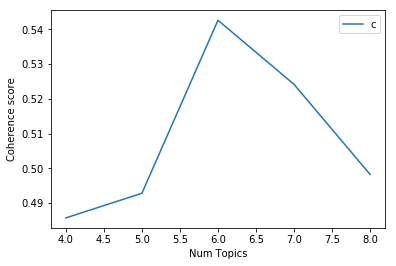

In [9]:
# display the coherence score of the different models
model_list_no_pooling = no_pooling_models[0]
coherence_values_no_pooling = no_pooling_models[1]

limit=9; start=4; step=1;
x = range(start, limit, step)
_ = plt.plot(x, coherence_values_no_pooling)
_ = plt.xlabel("Num Topics")
_ = plt.ylabel("Coherence score")
_ = plt.legend(("coherence_values"), loc='best')
_ = plt.savefig("no_pooling_coherence_scores")
_ = plt.show()

#### Choose the model with the highest coherence score (6 topics).

In [10]:
# print topics of model with highest coherence score
lda_model_no_pooling = model_list_no_pooling[2] # 6 topics model
_ = lda_model_no_pooling.print_topics()

2018-10-02 05:38:45,743 : INFO : topic #0 (0.147): 0.025*"beach" + 0.016*"drinking" + 0.013*"festival" + 0.011*"city" + 0.010*"best" + 0.008*"marbella" + 0.008*"night" + 0.008*"bar" + 0.007*"ticket" + 0.007*"#graffiti"
2018-10-02 05:38:45,746 : INFO : topic #1 (0.119): 0.022*"pedreracasa" + 0.021*"milà" + 0.020*"playa" + 0.011*"bcnfashion" + 0.010*"summer" + 0.008*"art" + 0.007*"night" + 0.007*"love" + 0.007*"fashion" + 0.006*"great"
2018-10-02 05:38:45,748 : INFO : topic #2 (0.132): 0.015*"ramblas" + 0.011*"#endomondo" + 0.010*"km" + 0.010*"finished" + 0.009*"#endorphins" + 0.009*"experience" + 0.008*"food" + 0.008*"#photography" + 0.007*"great" + 0.007*"time"
2018-10-02 05:38:45,752 : INFO : topic #3 (0.130): 0.013*"drinking" + 0.013*"#summer" + 0.011*"#love" + 0.010*"casa" + 0.008*"cervecita" + 0.008*"architecture" + 0.008*"sant" + 0.007*"#friends" + 0.007*"#photooftheday" + 0.007*"gaudi"
2018-10-02 05:38:45,754 : INFO : topic #4 (0.169): 0.017*"barceloneta" + 0.010*"time" + 0.010*"

### Visualize No Pooling Model

In [11]:
pyLDAvis.enable_notebook()
vis_np = pyLDAvis.gensim.prepare(lda_model_no_pooling, corpus_no_pooling, dictionary_no_pooling)

In [12]:
vis_np

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      27.336340        1       1 -0.354750 -0.032050
4      17.249558        1       2  0.097941 -0.158560
0      16.129442        1       3  0.080714 -0.016523
2      13.484669        1       4  0.078234 -0.152783
3      13.447195        1       5  0.043468  0.195041
1      12.352796        1       6  0.054392  0.164875, topic_info=     Category         Freq                          Term        Total  \
term                                                                    
112   Default  1117.000000                       sagrada  1117.000000   
129   Default   720.000000                       familia   720.000000   
565   Default   409.000000                        gothic   409.000000   
109   Default   375.000000                      basílica   375.000000   
567   Default   364.000000                       quarter   364.000000   
131   Default   352.000000               #sagradafamilia   352.000000   
110   Default   300.000000                       família   300.000000   
712   Default   153.000000                         beach   153.000000   
780   Default   100.000000                   pedreracasa   100.000000   
2686  Default   113.000000                   barceloneta   113.000000   
778   Default   116.000000                          milà   116.000000   
4068  Default    92.000000                         playa    92.000000   
150   Default   166.000000                        #gaudi   166.000000   
66    Default   216.000000                      drinking   216.000000   
2665  Default    79.000000                      festival    79.000000   
3856  Default    92.000000                       ramblas    92.000000   
4451  Default    53.000000                    bcnfashion    53.000000   
434   Default    63.000000                          week    63.000000   
26    Default    54.000000                    #endomondo    54.000000   
9     Default    86.000000                          parc    86.000000   
773   Default    51.000000                          casa    51.000000   
29    Default    50.000000                            km    50.000000   
28    Default    50.000000                      finished    50.000000   
1262  Default    56.000000                         can't    56.000000   
176   Default   109.000000                         gaudi   109.000000   
590   Default    76.000000                 #architecture    76.000000   
1783  Default    45.000000                        summer    45.000000   
2465  Default    51.000000                      marbella    51.000000   
1135  Default   123.000000                       #summer   123.000000   
27    Default    46.000000                   #endorphins    46.000000   
...       ...          ...                           ...          ...   
1030   Topic6    13.357161                         corts    13.777138   
1676   Topic6    13.463059                           sec    13.888421   
1174   Topic6    13.470350                            se    13.896636   
8      Topic6    13.668653                          face    14.104785   
1625   Topic6    12.898434            #travelphotography    13.315050   
1403   Topic6    12.977762                         spent    13.401835   
4137   Topic6    11.956478                          moll    12.370477   
4268   Topic6    11.462108  #smodatamentegoestobarcelona    11.864412   
4270   Topic6    11.462108           #smodatamentetravel    11.864412   
4269   Topic6    11.462108      #smodatamentegoestospain    11.864412   
219    Topic6    11.470385                        person    11.882285   
2483   Topic6    12.813449                        #enjoy    13.325324   
778    Topic6    99.391436                          milà   116.763898   
6      Topic6    38.983563                           art    52.501091   
596    Topic6    16.402267                    #lifestyle    18.344411   
1648   Topic6    17.9

#### Although a topic trend is already visible in the no pooling model, the topics could be more interpretable. Repetitions of keywords such as "drinking", "gaudi", "night" among different topics further complicate the interpretation.

### User Pooling

In [13]:
# train and evaluate different user pooling models by running the function
user_pooling_models = compute_coherence_values(dictionary=dictionary_user_pooling,
                         corpus=corpus_user_pooling, texts=tokenized_documents_user_pooling)

2018-10-02 05:38:52,852 : INFO : using autotuned alpha, starting with [0.25, 0.25, 0.25, 0.25]
2018-10-02 05:38:52,860 : INFO : using serial LDA version on this node
2018-10-02 05:38:52,876 : INFO : running online (multi-pass) LDA training, 4 topics, 20 passes over the supplied corpus of 4424 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 05:38:55,523 : INFO : -9.117 per-word bound, 555.2 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:38:55,525 : INFO : PROGRESS: pass 0, at document #2000/4424
2018-10-02 05:38:57,138 : INFO : optimized alpha [0.16076389, 0.16049698, 0.15307069, 0.17573997]
2018-10-02 05:38:57,139 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:38:57,145 : INFO : topic #0 (0.161): 0.027*"sagrada" + 0.015*"família" + 0.014*"basílica" + 0.010*"familia" + 0.007*"night"

2018-10-02 05:39:02,383 : INFO : topic #2 (0.117): 0.014*"parc" + 0.010*"#sagradafamilia" + 0.008*"guell" + 0.008*"sagrada" + 0.007*"drinking" + 0.007*"fashion" + 0.006*"#summer" + 0.006*"beach" + 0.005*"sant" + 0.005*"recinte"
2018-10-02 05:39:02,386 : INFO : topic #3 (0.184): 0.068*"sagrada" + 0.053*"familia" + 0.017*"#sagradafamilia" + 0.016*"playa" + 0.016*"barceloneta" + 0.013*"basílica" + 0.009*"família" + 0.009*"#gaudi" + 0.008*"time" + 0.007*"view"
2018-10-02 05:39:02,388 : INFO : topic diff=0.390361, rho=0.487254
2018-10-02 05:39:03,135 : INFO : -7.698 per-word bound, 207.6 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:03,136 : INFO : PROGRESS: pass 2, at document #2000/4424
2018-10-02 05:39:03,701 : INFO : optimized alpha [0.13627486, 0.12995872, 0.11143809, 0.17468743]
2018-10-02 05:39:03,702 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:03,707 : INFO : topic #0 (0.136): 0.019

2018-10-02 05:39:07,520 : INFO : topic #2 (0.098): 0.014*"parc" + 0.010*"drinking" + 0.009*"#sagradafamilia" + 0.008*"guell" + 0.007*"fashion" + 0.006*"#summer" + 0.005*"beach" + 0.005*"sant" + 0.005*"recinte" + 0.005*"time"
2018-10-02 05:39:07,522 : INFO : topic #3 (0.179): 0.077*"sagrada" + 0.051*"familia" + 0.022*"basílica" + 0.020*"família" + 0.018*"#sagradafamilia" + 0.015*"barceloneta" + 0.014*"playa" + 0.009*"#gaudi" + 0.008*"time" + 0.008*"gaudi"
2018-10-02 05:39:07,524 : INFO : topic diff=0.264280, rho=0.401222
2018-10-02 05:39:08,199 : INFO : -7.594 per-word bound, 193.2 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:08,200 : INFO : PROGRESS: pass 4, at document #2000/4424
2018-10-02 05:39:08,678 : INFO : optimized alpha [0.11849802, 0.11686158, 0.095437311, 0.17190513]
2018-10-02 05:39:08,680 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:08,684 : INFO : topic #0 (0.118): 0.008*

2018-10-02 05:39:12,239 : INFO : topic #2 (0.087): 0.014*"parc" + 0.011*"drinking" + 0.008*"guell" + 0.007*"#sagradafamilia" + 0.007*"fashion" + 0.006*"#summer" + 0.005*"sant" + 0.005*"#photodrinking" + 0.005*"recinte" + 0.005*"beach"
2018-10-02 05:39:12,241 : INFO : topic #3 (0.171): 0.079*"sagrada" + 0.050*"familia" + 0.025*"basílica" + 0.022*"família" + 0.019*"#sagradafamilia" + 0.015*"barceloneta" + 0.013*"playa" + 0.009*"#gaudi" + 0.008*"time" + 0.008*"gaudi"
2018-10-02 05:39:12,243 : INFO : topic diff=0.211596, rho=0.348960
2018-10-02 05:39:12,910 : INFO : -7.540 per-word bound, 186.1 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:12,912 : INFO : PROGRESS: pass 6, at document #2000/4424
2018-10-02 05:39:13,366 : INFO : optimized alpha [0.10700525, 0.10758815, 0.085344471, 0.16470176]
2018-10-02 05:39:13,367 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:13,372 : INFO : topic #0 (0.10

2018-10-02 05:39:17,165 : INFO : topic #2 (0.079): 0.014*"parc" + 0.012*"drinking" + 0.008*"guell" + 0.007*"fashion" + 0.007*"#sagradafamilia" + 0.006*"#photodrinking" + 0.006*"#summer" + 0.005*"sant" + 0.005*"recinte" + 0.005*"beach"
2018-10-02 05:39:17,167 : INFO : topic #3 (0.160): 0.080*"sagrada" + 0.051*"familia" + 0.027*"basílica" + 0.022*"família" + 0.020*"#sagradafamilia" + 0.014*"barceloneta" + 0.013*"playa" + 0.010*"#gaudi" + 0.008*"gaudi" + 0.008*"time"
2018-10-02 05:39:17,169 : INFO : topic diff=0.180844, rho=0.312928
2018-10-02 05:39:17,803 : INFO : -7.509 per-word bound, 182.1 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:17,804 : INFO : PROGRESS: pass 8, at document #2000/4424
2018-10-02 05:39:18,258 : INFO : optimized alpha [0.09937533, 0.10035842, 0.077965416, 0.15469879]
2018-10-02 05:39:18,260 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:18,264 : INFO : topic #0 (0.09

2018-10-02 05:39:21,682 : INFO : topic #2 (0.073): 0.014*"parc" + 0.013*"drinking" + 0.007*"guell" + 0.007*"fashion" + 0.006*"#sagradafamilia" + 0.006*"#photodrinking" + 0.005*"#summer" + 0.005*"sant" + 0.005*"recinte" + 0.005*"beach"
2018-10-02 05:39:21,683 : INFO : topic #3 (0.150): 0.081*"sagrada" + 0.051*"familia" + 0.027*"basílica" + 0.023*"família" + 0.020*"#sagradafamilia" + 0.014*"barceloneta" + 0.013*"playa" + 0.010*"#gaudi" + 0.008*"gaudi" + 0.008*"time"
2018-10-02 05:39:21,685 : INFO : topic diff=0.160597, rho=0.286158
2018-10-02 05:39:22,316 : INFO : -7.488 per-word bound, 179.6 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:22,317 : INFO : PROGRESS: pass 10, at document #2000/4424
2018-10-02 05:39:22,734 : INFO : optimized alpha [0.094080187, 0.094619334, 0.072453834, 0.1457784]
2018-10-02 05:39:22,736 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:22,741 : INFO : topic #0 (0.

2018-10-02 05:39:26,120 : INFO : topic #2 (0.069): 0.014*"parc" + 0.013*"drinking" + 0.007*"fashion" + 0.007*"guell" + 0.006*"#photodrinking" + 0.006*"#sagradafamilia" + 0.005*"#summer" + 0.005*"sant" + 0.005*"recinte" + 0.005*"beach"
2018-10-02 05:39:26,122 : INFO : topic #3 (0.141): 0.081*"sagrada" + 0.051*"familia" + 0.027*"basílica" + 0.023*"família" + 0.021*"#sagradafamilia" + 0.014*"barceloneta" + 0.013*"playa" + 0.010*"#gaudi" + 0.008*"gaudi" + 0.008*"#travel"
2018-10-02 05:39:26,124 : INFO : topic diff=0.145879, rho=0.265260
2018-10-02 05:39:26,746 : INFO : -7.474 per-word bound, 177.8 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:26,747 : INFO : PROGRESS: pass 12, at document #2000/4424
2018-10-02 05:39:27,166 : INFO : optimized alpha [0.089746773, 0.089785576, 0.068016648, 0.13832219]
2018-10-02 05:39:27,168 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:27,173 : INFO : topic #0

2018-10-02 05:39:30,895 : INFO : topic #2 (0.065): 0.014*"parc" + 0.014*"drinking" + 0.008*"fashion" + 0.007*"guell" + 0.006*"#photodrinking" + 0.005*"#sagradafamilia" + 0.005*"#summer" + 0.005*"sant" + 0.005*"recinte" + 0.005*"hotel"
2018-10-02 05:39:30,897 : INFO : topic #3 (0.134): 0.082*"sagrada" + 0.052*"familia" + 0.027*"basílica" + 0.023*"família" + 0.021*"#sagradafamilia" + 0.014*"barceloneta" + 0.013*"playa" + 0.010*"#gaudi" + 0.008*"gaudi" + 0.008*"#travel"
2018-10-02 05:39:30,900 : INFO : topic diff=0.134227, rho=0.248360
2018-10-02 05:39:31,558 : INFO : -7.462 per-word bound, 176.4 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:31,559 : INFO : PROGRESS: pass 14, at document #2000/4424
2018-10-02 05:39:31,982 : INFO : optimized alpha [0.085962527, 0.085792229, 0.064392336, 0.13187957]
2018-10-02 05:39:31,984 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:31,988 : INFO : topic #0

2018-10-02 05:39:35,308 : INFO : topic #2 (0.062): 0.014*"parc" + 0.014*"drinking" + 0.008*"fashion" + 0.007*"guell" + 0.006*"#photodrinking" + 0.005*"#sagradafamilia" + 0.005*"sant" + 0.005*"#summer" + 0.005*"recinte" + 0.005*"hotel"
2018-10-02 05:39:35,311 : INFO : topic #3 (0.128): 0.082*"sagrada" + 0.052*"familia" + 0.027*"basílica" + 0.023*"família" + 0.021*"#sagradafamilia" + 0.014*"barceloneta" + 0.013*"playa" + 0.010*"#gaudi" + 0.009*"gaudi" + 0.008*"#travel"
2018-10-02 05:39:35,313 : INFO : topic diff=0.125609, rho=0.234326
2018-10-02 05:39:35,932 : INFO : -7.454 per-word bound, 175.3 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:35,933 : INFO : PROGRESS: pass 16, at document #2000/4424
2018-10-02 05:39:36,354 : INFO : optimized alpha [0.082437754, 0.082116559, 0.061456461, 0.12599456]
2018-10-02 05:39:36,356 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:36,362 : INFO : topic #0

2018-10-02 05:39:39,649 : INFO : topic #2 (0.059): 0.014*"drinking" + 0.014*"parc" + 0.008*"fashion" + 0.007*"guell" + 0.007*"#photodrinking" + 0.005*"sant" + 0.005*"#summer" + 0.005*"#sagradafamilia" + 0.005*"recinte" + 0.005*"hotel"
2018-10-02 05:39:39,651 : INFO : topic #3 (0.123): 0.082*"sagrada" + 0.052*"familia" + 0.027*"basílica" + 0.023*"família" + 0.021*"#sagradafamilia" + 0.013*"barceloneta" + 0.013*"playa" + 0.010*"#gaudi" + 0.009*"gaudi" + 0.008*"#travel"
2018-10-02 05:39:39,653 : INFO : topic diff=0.117990, rho=0.222431
2018-10-02 05:39:40,277 : INFO : -7.447 per-word bound, 174.5 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:39:40,278 : INFO : PROGRESS: pass 18, at document #2000/4424
2018-10-02 05:39:40,712 : INFO : optimized alpha [0.079647742, 0.079061598, 0.05901495, 0.12120509]
2018-10-02 05:39:40,714 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:40,718 : INFO : topic #0 

2018-10-02 05:39:44,006 : INFO : topic #2 (0.057): 0.014*"drinking" + 0.014*"parc" + 0.008*"fashion" + 0.007*"guell" + 0.007*"#photodrinking" + 0.005*"sant" + 0.005*"#summer" + 0.005*"#sagradafamilia" + 0.005*"recinte" + 0.005*"hotel"
2018-10-02 05:39:44,008 : INFO : topic #3 (0.119): 0.082*"sagrada" + 0.052*"familia" + 0.028*"basílica" + 0.023*"família" + 0.022*"#sagradafamilia" + 0.013*"barceloneta" + 0.013*"playa" + 0.010*"#gaudi" + 0.009*"gaudi" + 0.008*"#travel"
2018-10-02 05:39:44,009 : INFO : topic diff=0.111866, rho=0.212181
2018-10-02 05:39:44,020 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-10-02 05:39:48,666 : INFO : 1 batches submitted to accumulate stats from 64 documents (616 virtual)
2018-10-02 05:39:48,899 : INFO : 3 accumulators retrieved from output queue
2018-10-02 05:39:48,926 : INFO : accumulated word occurrence stats for 5959 virtual documents
2018-10-02 05:39:49,201 : INFO : using

2018-10-02 05:39:56,434 : INFO : optimized alpha [0.14720415, 0.11029181, 0.11123233, 0.1206791, 0.13548921]
2018-10-02 05:39:56,436 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:39:56,441 : INFO : topic #0 (0.147): 0.070*"sagrada" + 0.062*"familia" + 0.019*"#sagradafamilia" + 0.011*"time" + 0.006*"amazing" + 0.006*"night" + 0.006*"basílica" + 0.004*"best" + 0.004*"#gaudi" + 0.004*"morning"
2018-10-02 05:39:56,443 : INFO : topic #1 (0.110): 0.008*"new" + 0.007*"good" + 0.006*"today" + 0.006*"love" + 0.006*"dream" + 0.006*"best" + 0.006*"amazing" + 0.005*"happy" + 0.005*"life" + 0.005*"night"
2018-10-02 05:39:56,445 : INFO : topic #2 (0.111): 0.011*"#photography" + 0.008*"#endomondo" + 0.007*"#sagradafamilia" + 0.007*"km" + 0.007*"finished" + 0.007*"#catalunya" + 0.007*"#endorphins" + 0.006*"#catalonia" + 0.006*"#travel" + 0.006*"#lasagradafamilia"
2018-10-02 05:39:56,448 : INFO : topic #3 (0.121): 0.039*"gothic" + 0.035*"quarter" + 0.011*"bea

2018-10-02 05:40:00,607 : INFO : optimized alpha [0.14107952, 0.10195617, 0.097334154, 0.11539945, 0.12741005]
2018-10-02 05:40:00,608 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:40:00,614 : INFO : topic #0 (0.141): 0.063*"sagrada" + 0.055*"familia" + 0.016*"#sagradafamilia" + 0.010*"time" + 0.007*"amazing" + 0.006*"gaudi" + 0.006*"night" + 0.005*"basílica" + 0.005*"week" + 0.005*"#gaudi"
2018-10-02 05:40:00,616 : INFO : topic #1 (0.102): 0.009*"new" + 0.009*"love" + 0.008*"night" + 0.007*"best" + 0.007*"today" + 0.007*"good" + 0.006*"amazing" + 0.006*"life" + 0.006*"great" + 0.006*"place"
2018-10-02 05:40:00,618 : INFO : topic #2 (0.097): 0.011*"#photography" + 0.009*"#endomondo" + 0.008*"km" + 0.008*"fashion" + 0.008*"#endorphins" + 0.007*"#catalonia" + 0.007*"#catalunya" + 0.007*"bcnfashion" + 0.006*"#sagradafamilia" + 0.006*"finished"
2018-10-02 05:40:00,621 : INFO : topic #3 (0.115): 0.047*"gothic" + 0.043*"quarter" + 0.010*"beach" + 0

2018-10-02 05:40:04,677 : INFO : optimized alpha [0.14331661, 0.098994061, 0.090876557, 0.11156861, 0.1234842]
2018-10-02 05:40:04,679 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:40:04,684 : INFO : topic #0 (0.143): 0.072*"sagrada" + 0.063*"familia" + 0.018*"#sagradafamilia" + 0.009*"time" + 0.008*"amazing" + 0.007*"gaudi" + 0.006*"week" + 0.006*"basílica" + 0.006*"can't" + 0.005*"night"
2018-10-02 05:40:04,686 : INFO : topic #1 (0.099): 0.011*"love" + 0.009*"new" + 0.008*"best" + 0.008*"night" + 0.008*"today" + 0.008*"amazing" + 0.007*"see" + 0.007*"good" + 0.006*"life" + 0.006*"place"
2018-10-02 05:40:04,689 : INFO : topic #2 (0.091): 0.009*"#photography" + 0.009*"fashion" + 0.008*"#endomondo" + 0.008*"km" + 0.008*"#endorphins" + 0.007*"bcnfashion" + 0.007*"finished" + 0.007*"recinte" + 0.006*"#sagradafamilia" + 0.006*"#travel"
2018-10-02 05:40:04,692 : INFO : topic #3 (0.112): 0.046*"gothic" + 0.041*"quarter" + 0.012*"beach" + 0.010*"#sum

2018-10-02 05:40:09,511 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:40:09,516 : INFO : topic #0 (0.141): 0.076*"sagrada" + 0.067*"familia" + 0.019*"#sagradafamilia" + 0.009*"time" + 0.007*"amazing" + 0.006*"beautiful" + 0.006*"gaudi" + 0.006*"night" + 0.005*"basílica" + 0.005*"#gaudi"
2018-10-02 05:40:09,518 : INFO : topic #1 (0.097): 0.010*"love" + 0.009*"new" + 0.008*"night" + 0.007*"today" + 0.007*"amazing" + 0.007*"best" + 0.007*"happy" + 0.007*"good" + 0.006*"time" + 0.006*"life"
2018-10-02 05:40:09,521 : INFO : topic #2 (0.084): 0.011*"#photography" + 0.008*"#endomondo" + 0.008*"km" + 0.007*"#endorphins" + 0.007*"fashion" + 0.007*"#catalunya" + 0.007*"#catalonia" + 0.007*"hotel" + 0.006*"finished" + 0.006*"bcnfashion"
2018-10-02 05:40:09,523 : INFO : topic #3 (0.108): 0.045*"gothic" + 0.040*"quarter" + 0.011*"beach" + 0.010*"#travel" + 0.008*"#summer" + 0.008*"city" + 0.007*"#streetart" + 0.007*"#art" + 0.007*"#love" + 0.006*"parc"
20

2018-10-02 05:40:13,654 : INFO : topic #0 (0.135): 0.070*"sagrada" + 0.061*"familia" + 0.017*"#sagradafamilia" + 0.010*"time" + 0.007*"amazing" + 0.007*"gaudi" + 0.006*"night" + 0.006*"beautiful" + 0.005*"basílica" + 0.005*"#gaudi"
2018-10-02 05:40:13,656 : INFO : topic #1 (0.094): 0.010*"love" + 0.009*"new" + 0.009*"night" + 0.008*"best" + 0.007*"today" + 0.007*"amazing" + 0.006*"good" + 0.006*"see" + 0.006*"life" + 0.006*"time"
2018-10-02 05:40:13,659 : INFO : topic #2 (0.080): 0.011*"#photography" + 0.009*"fashion" + 0.009*"#endomondo" + 0.008*"km" + 0.008*"#endorphins" + 0.008*"bcnfashion" + 0.007*"#catalunya" + 0.007*"#catalonia" + 0.007*"hotel" + 0.007*"finished"
2018-10-02 05:40:13,662 : INFO : topic #3 (0.107): 0.047*"gothic" + 0.043*"quarter" + 0.010*"#summer" + 0.010*"beach" + 0.009*"#travel" + 0.009*"#streetart" + 0.008*"#art" + 0.007*"parc" + 0.007*"city" + 0.007*"#beach"
2018-10-02 05:40:13,664 : INFO : topic #4 (0.115): 0.044*"sagrada" + 0.037*"basílica" + 0.035*"família"

2018-10-02 05:40:17,255 : INFO : topic #1 (0.093): 0.011*"love" + 0.010*"new" + 0.008*"best" + 0.008*"night" + 0.008*"amazing" + 0.007*"see" + 0.007*"today" + 0.007*"good" + 0.006*"time" + 0.006*"life"
2018-10-02 05:40:17,258 : INFO : topic #2 (0.077): 0.010*"#photography" + 0.009*"fashion" + 0.009*"#endomondo" + 0.008*"km" + 0.008*"#endorphins" + 0.008*"bcnfashion" + 0.007*"finished" + 0.007*"hotel" + 0.007*"recinte" + 0.006*"bar"
2018-10-02 05:40:17,260 : INFO : topic #3 (0.105): 0.046*"gothic" + 0.041*"quarter" + 0.011*"#summer" + 0.011*"beach" + 0.009*"parc" + 0.009*"#travel" + 0.008*"#beach" + 0.007*"#art" + 0.007*"city" + 0.007*"guell"
2018-10-02 05:40:17,262 : INFO : topic #4 (0.113): 0.043*"sagrada" + 0.038*"basílica" + 0.037*"família" + 0.023*"barceloneta" + 0.020*"playa" + 0.013*"#sagradafamilia" + 0.011*"drinking" + 0.010*"milà" + 0.009*"pedreracasa" + 0.008*"#gaudi"
2018-10-02 05:40:17,264 : INFO : topic diff=0.146322, rho=0.286158
2018-10-02 05:40:17,966 : INFO : -7.513 pe

2018-10-02 05:40:21,965 : INFO : topic #2 (0.074): 0.011*"#photography" + 0.009*"#endomondo" + 0.008*"fashion" + 0.008*"km" + 0.008*"#endorphins" + 0.007*"#catalunya" + 0.007*"hotel" + 0.007*"bcnfashion" + 0.007*"finished" + 0.006*"bar"
2018-10-02 05:40:21,968 : INFO : topic #3 (0.103): 0.046*"gothic" + 0.041*"quarter" + 0.011*"beach" + 0.010*"#travel" + 0.010*"#summer" + 0.008*"#art" + 0.008*"city" + 0.008*"#streetart" + 0.007*"#love" + 0.007*"#beach"
2018-10-02 05:40:21,971 : INFO : topic #4 (0.110): 0.044*"sagrada" + 0.041*"basílica" + 0.038*"família" + 0.015*"drinking" + 0.014*"barceloneta" + 0.014*"#sagradafamilia" + 0.012*"playa" + 0.012*"milà" + 0.011*"pedreracasa" + 0.008*"#gaudi"
2018-10-02 05:40:21,973 : INFO : topic diff=0.118420, rho=0.265260
2018-10-02 05:40:22,104 : INFO : -7.500 per-word bound, 181.0 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:40:22,106 : INFO : PROGRESS: pass 11, at document #4424/4424
2018-10-02 05:40:2

2018-10-02 05:40:25,673 : INFO : topic #3 (0.103): 0.048*"gothic" + 0.043*"quarter" + 0.011*"#summer" + 0.010*"#travel" + 0.010*"beach" + 0.009*"#streetart" + 0.008*"#art" + 0.008*"#beach" + 0.007*"#love" + 0.007*"city"
2018-10-02 05:40:25,675 : INFO : topic #4 (0.109): 0.041*"sagrada" + 0.038*"basílica" + 0.037*"família" + 0.018*"barceloneta" + 0.017*"drinking" + 0.015*"playa" + 0.013*"milà" + 0.012*"#sagradafamilia" + 0.012*"pedreracasa" + 0.008*"#photodrinking"
2018-10-02 05:40:25,678 : INFO : topic diff=0.214365, rho=0.248360
2018-10-02 05:40:26,220 : INFO : -7.861 per-word bound, 232.4 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:40:26,222 : INFO : PROGRESS: pass 13, at document #4000/4424
2018-10-02 05:40:26,627 : INFO : optimized alpha [0.13524419, 0.09172149, 0.072103545, 0.1019085, 0.10839049]
2018-10-02 05:40:26,628 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:40:26,633 : INFO : top

2018-10-02 05:40:29,167 : INFO : topic #4 (0.108): 0.042*"sagrada" + 0.039*"basílica" + 0.038*"família" + 0.023*"barceloneta" + 0.020*"playa" + 0.012*"drinking" + 0.012*"#sagradafamilia" + 0.011*"milà" + 0.010*"pedreracasa" + 0.008*"platja"
2018-10-02 05:40:29,170 : INFO : topic diff=0.118244, rho=0.241037
2018-10-02 05:40:29,807 : INFO : -7.482 per-word bound, 178.8 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:40:29,808 : INFO : PROGRESS: pass 15, at document #2000/4424
2018-10-02 05:40:30,256 : INFO : optimized alpha [0.13075669, 0.090322144, 0.070273638, 0.10131346, 0.10731155]
2018-10-02 05:40:30,258 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:40:30,263 : INFO : topic #0 (0.131): 0.074*"sagrada" + 0.066*"familia" + 0.018*"#sagradafamilia" + 0.010*"time" + 0.007*"amazing" + 0.007*"gaudi" + 0.006*"basílica" + 0.006*"beautiful" + 0.006*"night" + 0.005*"#gaudi"
2018-10-02 05:40:30,265 : INF

2018-10-02 05:40:33,620 : INFO : topic diff=0.099428, rho=0.228146
2018-10-02 05:40:33,778 : INFO : -7.475 per-word bound, 177.9 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:40:33,779 : INFO : PROGRESS: pass 16, at document #4424/4424
2018-10-02 05:40:33,910 : INFO : optimized alpha [0.13156776, 0.090010963, 0.069366209, 0.10003084, 0.10692572]
2018-10-02 05:40:33,912 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:40:33,918 : INFO : topic #0 (0.132): 0.078*"sagrada" + 0.069*"familia" + 0.019*"#sagradafamilia" + 0.009*"time" + 0.008*"amazing" + 0.008*"gaudi" + 0.006*"basílica" + 0.006*"beautiful" + 0.006*"#gaudi" + 0.005*"night"
2018-10-02 05:40:33,921 : INFO : topic #1 (0.090): 0.011*"love" + 0.010*"new" + 0.009*"best" + 0.008*"night" + 0.007*"amazing" + 0.007*"today" + 0.007*"good" + 0.007*"see" + 0.007*"time" + 0.007*"life"
2018-10-02 05:40:33,924 : INFO : topic #2 (0.069): 0.010*"#photography"

2018-10-02 05:40:39,622 : INFO : -7.844 per-word bound, 229.8 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:40:39,623 : INFO : PROGRESS: pass 18, at document #4000/4424
2018-10-02 05:40:40,084 : INFO : optimized alpha [0.13153099, 0.090592138, 0.067987964, 0.099081561, 0.10484757]
2018-10-02 05:40:40,086 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:40:40,092 : INFO : topic #0 (0.132): 0.080*"sagrada" + 0.071*"familia" + 0.020*"#sagradafamilia" + 0.009*"time" + 0.008*"amazing" + 0.007*"gaudi" + 0.006*"basílica" + 0.006*"beautiful" + 0.006*"#gaudi" + 0.005*"night"
2018-10-02 05:40:40,094 : INFO : topic #1 (0.091): 0.010*"love" + 0.009*"new" + 0.008*"night" + 0.008*"best" + 0.007*"amazing" + 0.007*"good" + 0.007*"today" + 0.007*"time" + 0.007*"great" + 0.006*"life"
2018-10-02 05:40:40,096 : INFO : topic #2 (0.068): 0.012*"#photography" + 0.009*"#endomondo" + 0.009*"fashion" + 0.008*"km" + 0.008*"

2018-10-02 05:40:48,342 : INFO : 1 batches submitted to accumulate stats from 64 documents (330 virtual)
2018-10-02 05:40:48,701 : INFO : 3 accumulators retrieved from output queue
2018-10-02 05:40:48,726 : INFO : accumulated word occurrence stats for 6123 virtual documents
2018-10-02 05:40:49,128 : INFO : using autotuned alpha, starting with [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
2018-10-02 05:40:49,131 : INFO : using serial LDA version on this node
2018-10-02 05:40:49,137 : INFO : running online (multi-pass) LDA training, 6 topics, 20 passes over the supplied corpus of 4424 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 05:40:51,328 : INFO : -9.381 per-word bound, 666.6 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:40:51,329 : INFO : PROGRESS: pass 0, at document #2000/4424
2018-10-02 0

2018-10-02 05:40:56,887 : INFO : topic #4 (0.108): 0.012*"#sagradafamilia" + 0.012*"#summer" + 0.010*"#streetart" + 0.007*"#photography" + 0.007*"#graffiti" + 0.007*"#love" + 0.007*"#friends" + 0.006*"festival" + 0.006*"#catalonia" + 0.006*"#travel"
2018-10-02 05:40:56,890 : INFO : topic #3 (0.124): 0.087*"sagrada" + 0.079*"familia" + 0.028*"#sagradafamilia" + 0.011*"#gaudi" + 0.010*"time" + 0.008*"playa" + 0.007*"finished" + 0.007*"barceloneta" + 0.006*"#architecture" + 0.006*"#endomondo"
2018-10-02 05:40:56,892 : INFO : topic #5 (0.149): 0.055*"sagrada" + 0.037*"basílica" + 0.033*"gothic" + 0.033*"família" + 0.030*"quarter" + 0.017*"familia" + 0.010*"beautiful" + 0.009*"beach" + 0.009*"city" + 0.009*"#sagradafamilia"
2018-10-02 05:40:56,894 : INFO : topic diff=0.343741, rho=0.487254
2018-10-02 05:40:57,058 : INFO : -7.834 per-word bound, 228.1 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:40:57,060 : INFO : PROGRESS: pass 1, at document

2018-10-02 05:41:01,310 : INFO : topic #3 (0.123): 0.079*"sagrada" + 0.071*"familia" + 0.026*"#sagradafamilia" + 0.017*"playa" + 0.013*"barceloneta" + 0.013*"#gaudi" + 0.011*"time" + 0.008*"#endomondo" + 0.007*"finished" + 0.007*"km"
2018-10-02 05:41:01,312 : INFO : topic #5 (0.153): 0.052*"sagrada" + 0.042*"gothic" + 0.038*"quarter" + 0.036*"basílica" + 0.032*"família" + 0.015*"familia" + 0.009*"beautiful" + 0.009*"#travel" + 0.009*"beach" + 0.009*"city"
2018-10-02 05:41:01,314 : INFO : topic diff=0.409809, rho=0.401222
2018-10-02 05:41:01,882 : INFO : -8.013 per-word bound, 258.2 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:41:01,883 : INFO : PROGRESS: pass 3, at document #4000/4424
2018-10-02 05:41:02,295 : INFO : optimized alpha [0.09626098, 0.080172591, 0.10516973, 0.12563227, 0.1012673, 0.15565602]
2018-10-02 05:41:02,297 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:41:02,303 : INFO : t

2018-10-02 05:41:04,939 : INFO : topic #5 (0.156): 0.053*"sagrada" + 0.039*"gothic" + 0.038*"basílica" + 0.035*"quarter" + 0.034*"família" + 0.014*"familia" + 0.010*"beach" + 0.010*"beautiful" + 0.009*"city" + 0.009*"#sagradafamilia"
2018-10-02 05:41:04,941 : INFO : topic diff=0.196827, rho=0.372368
2018-10-02 05:41:05,612 : INFO : -7.567 per-word bound, 189.7 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:41:05,613 : INFO : PROGRESS: pass 5, at document #2000/4424
2018-10-02 05:41:06,174 : INFO : optimized alpha [0.093465209, 0.075915039, 0.10262961, 0.12157685, 0.098474346, 0.15373881]
2018-10-02 05:41:06,176 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:41:06,183 : INFO : topic #1 (0.076): 0.027*"drinking" + 0.022*"milà" + 0.019*"pedreracasa" + 0.014*"#photodrinking" + 0.008*"casa" + 0.008*"cervecita" + 0.008*"#gaudi" + 0.007*"joan" + 0.005*"ross" + 0.005*"torrades"
2018-10-02 05:41:06,185 :

2018-10-02 05:41:09,686 : INFO : topic diff=0.142397, rho=0.329475
2018-10-02 05:41:09,827 : INFO : -7.596 per-word bound, 193.5 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:41:09,829 : INFO : PROGRESS: pass 6, at document #4424/4424
2018-10-02 05:41:09,927 : INFO : optimized alpha [0.091177791, 0.072678134, 0.10281043, 0.12315392, 0.09656664, 0.15408458]
2018-10-02 05:41:09,928 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:41:09,935 : INFO : topic #1 (0.073): 0.019*"drinking" + 0.018*"milà" + 0.016*"pedreracasa" + 0.009*"#photodrinking" + 0.008*"joan" + 0.008*"#gaudi" + 0.007*"casa" + 0.007*"miró" + 0.005*"city" + 0.005*"warm"
2018-10-02 05:41:09,936 : INFO : topic #0 (0.091): 0.019*"parc" + 0.011*"guell" + 0.010*"fashion" + 0.009*"bcnfashion" + 0.008*"blue" + 0.007*"recinte" + 0.007*"time" + 0.006*"sant" + 0.006*"love" + 0.006*"together"
2018-10-02 05:41:09,939 : INFO : topic #2 (0.103): 0.013

2018-10-02 05:41:13,920 : INFO : -7.940 per-word bound, 245.6 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:41:13,921 : INFO : PROGRESS: pass 8, at document #4000/4424
2018-10-02 05:41:14,322 : INFO : optimized alpha [0.087141201, 0.071056597, 0.10233822, 0.12114727, 0.094786823, 0.15339509]
2018-10-02 05:41:14,324 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:41:14,330 : INFO : topic #1 (0.071): 0.024*"drinking" + 0.021*"milà" + 0.018*"pedreracasa" + 0.011*"#photodrinking" + 0.008*"casa" + 0.007*"#gaudi" + 0.007*"joan" + 0.006*"cervecita" + 0.005*"miró" + 0.005*"#lapedrera"
2018-10-02 05:41:14,332 : INFO : topic #0 (0.087): 0.016*"parc" + 0.009*"fashion" + 0.007*"bcnfashion" + 0.007*"time" + 0.006*"guell" + 0.006*"love" + 0.006*"laberint" + 0.006*"#art" + 0.006*"blue" + 0.006*"good"
2018-10-02 05:41:14,335 : INFO : topic #2 (0.102): 0.012*"love" + 0.011*"night" + 0.010*"ramblas" + 0.010*"platj

2018-10-02 05:41:17,524 : INFO : -7.493 per-word bound, 180.1 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:41:17,525 : INFO : PROGRESS: pass 10, at document #2000/4424
2018-10-02 05:41:17,967 : INFO : optimized alpha [0.085823335, 0.069518603, 0.10094848, 0.11722182, 0.093432166, 0.14899084]
2018-10-02 05:41:17,969 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:41:17,978 : INFO : topic #1 (0.070): 0.027*"drinking" + 0.022*"milà" + 0.019*"pedreracasa" + 0.014*"#photodrinking" + 0.009*"casa" + 0.008*"cervecita" + 0.007*"#gaudi" + 0.007*"joan" + 0.006*"#lapedrera" + 0.005*"miró"
2018-10-02 05:41:17,980 : INFO : topic #0 (0.086): 0.018*"parc" + 0.011*"fashion" + 0.009*"bcnfashion" + 0.008*"guell" + 0.007*"laberint" + 0.006*"time" + 0.006*"recinte" + 0.006*"#art" + 0.006*"blue" + 0.006*"love"
2018-10-02 05:41:17,982 : INFO : topic #2 (0.101): 0.011*"night" + 0.011*"love" + 0.011*"platja" + 0.009*"r

2018-10-02 05:41:21,355 : INFO : -7.540 per-word bound, 186.1 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:41:21,356 : INFO : PROGRESS: pass 11, at document #4424/4424
2018-10-02 05:41:21,442 : INFO : optimized alpha [0.084854841, 0.067985073, 0.10075664, 0.11807736, 0.092171937, 0.1483044]
2018-10-02 05:41:21,444 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:41:21,449 : INFO : topic #1 (0.068): 0.021*"drinking" + 0.019*"milà" + 0.017*"pedreracasa" + 0.010*"#photodrinking" + 0.008*"joan" + 0.008*"casa" + 0.008*"#gaudi" + 0.006*"miró" + 0.005*"cervecita" + 0.005*"city"
2018-10-02 05:41:21,451 : INFO : topic #0 (0.085): 0.019*"parc" + 0.010*"fashion" + 0.010*"guell" + 0.009*"bcnfashion" + 0.008*"blue" + 0.007*"recinte" + 0.007*"time" + 0.006*"sant" + 0.006*"love" + 0.006*"laberint"
2018-10-02 05:41:21,454 : INFO : topic #2 (0.101): 0.013*"platja" + 0.012*"love" + 0.010*"night" + 0.009*"ramblas" + 

2018-10-02 05:41:25,684 : INFO : PROGRESS: pass 13, at document #4000/4424
2018-10-02 05:41:26,064 : INFO : optimized alpha [0.082575917, 0.067310266, 0.10071804, 0.11642776, 0.091081202, 0.14774774]
2018-10-02 05:41:26,066 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:41:26,072 : INFO : topic #1 (0.067): 0.024*"drinking" + 0.021*"milà" + 0.019*"pedreracasa" + 0.012*"#photodrinking" + 0.008*"casa" + 0.007*"#gaudi" + 0.007*"joan" + 0.006*"cervecita" + 0.005*"miró" + 0.005*"#lapedrera"
2018-10-02 05:41:26,073 : INFO : topic #0 (0.083): 0.016*"parc" + 0.009*"fashion" + 0.008*"bcnfashion" + 0.007*"time" + 0.007*"guell" + 0.006*"laberint" + 0.006*"blue" + 0.006*"love" + 0.006*"#art" + 0.006*"good"
2018-10-02 05:41:26,075 : INFO : topic #2 (0.101): 0.012*"love" + 0.011*"night" + 0.011*"ramblas" + 0.010*"platja" + 0.009*"new" + 0.009*"time" + 0.008*"best" + 0.007*"arena" + 0.007*"life" + 0.007*"hotel"
2018-10-02 05:41:26,078 : INFO : topic #3 (0.116

2018-10-02 05:41:29,223 : INFO : PROGRESS: pass 15, at document #2000/4424
2018-10-02 05:41:29,645 : INFO : optimized alpha [0.082004152, 0.066311389, 0.099627137, 0.11361126, 0.09025903, 0.14471723]
2018-10-02 05:41:29,646 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:41:29,652 : INFO : topic #1 (0.066): 0.027*"drinking" + 0.022*"milà" + 0.019*"pedreracasa" + 0.014*"#photodrinking" + 0.009*"casa" + 0.007*"cervecita" + 0.007*"#gaudi" + 0.007*"joan" + 0.006*"#lapedrera" + 0.005*"miró"
2018-10-02 05:41:29,654 : INFO : topic #0 (0.082): 0.018*"parc" + 0.011*"fashion" + 0.009*"bcnfashion" + 0.008*"guell" + 0.007*"laberint" + 0.007*"time" + 0.006*"recinte" + 0.006*"blue" + 0.006*"#art" + 0.006*"love"
2018-10-02 05:41:29,657 : INFO : topic #2 (0.100): 0.012*"night" + 0.011*"love" + 0.011*"platja" + 0.010*"ramblas" + 0.009*"new" + 0.009*"time" + 0.008*"best" + 0.008*"arena" + 0.007*"life" + 0.007*"barceloneta"
2018-10-02 05:41:29,659 : INFO : topic 

2018-10-02 05:41:32,994 : INFO : PROGRESS: pass 16, at document #4424/4424
2018-10-02 05:41:33,071 : INFO : optimized alpha [0.081589609, 0.065179355, 0.099640571, 0.11452776, 0.089509711, 0.14435551]
2018-10-02 05:41:33,073 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:41:33,079 : INFO : topic #1 (0.065): 0.022*"drinking" + 0.020*"milà" + 0.017*"pedreracasa" + 0.010*"#photodrinking" + 0.008*"casa" + 0.008*"joan" + 0.008*"#gaudi" + 0.006*"miró" + 0.006*"cervecita" + 0.005*"#lapedrera"
2018-10-02 05:41:33,081 : INFO : topic #0 (0.082): 0.020*"parc" + 0.010*"fashion" + 0.010*"guell" + 0.009*"bcnfashion" + 0.008*"blue" + 0.007*"recinte" + 0.007*"time" + 0.006*"sant" + 0.006*"love" + 0.006*"laberint"
2018-10-02 05:41:33,083 : INFO : topic #2 (0.100): 0.012*"platja" + 0.012*"love" + 0.011*"night" + 0.010*"ramblas" + 0.009*"new" + 0.009*"time" + 0.009*"barceloneta" + 0.008*"best" + 0.008*"arena" + 0.008*"life"
2018-10-02 05:41:33,086 : INFO : topic 

2018-10-02 05:41:36,948 : INFO : PROGRESS: pass 18, at document #4000/4424
2018-10-02 05:41:37,304 : INFO : optimized alpha [0.079961337, 0.06489633, 0.099798784, 0.11336128, 0.088941306, 0.14422922]
2018-10-02 05:41:37,305 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:41:37,311 : INFO : topic #1 (0.065): 0.025*"drinking" + 0.022*"milà" + 0.019*"pedreracasa" + 0.012*"#photodrinking" + 0.009*"casa" + 0.007*"#gaudi" + 0.007*"joan" + 0.006*"cervecita" + 0.005*"#lapedrera" + 0.005*"miró"
2018-10-02 05:41:37,313 : INFO : topic #0 (0.080): 0.017*"parc" + 0.009*"fashion" + 0.008*"bcnfashion" + 0.007*"time" + 0.007*"guell" + 0.006*"laberint" + 0.006*"blue" + 0.006*"love" + 0.006*"#art" + 0.006*"good"
2018-10-02 05:41:37,316 : INFO : topic #2 (0.100): 0.012*"love" + 0.012*"night" + 0.011*"ramblas" + 0.010*"platja" + 0.009*"new" + 0.008*"time" + 0.008*"best" + 0.008*"life" + 0.007*"arena" + 0.007*"amazing"
2018-10-02 05:41:37,318 : INFO : topic #3 (0.1

2018-10-02 05:41:44,550 : INFO : 1 batches submitted to accumulate stats from 64 documents (401 virtual)
2018-10-02 05:41:44,829 : INFO : 3 accumulators retrieved from output queue
2018-10-02 05:41:44,858 : INFO : accumulated word occurrence stats for 6189 virtual documents
2018-10-02 05:41:45,255 : INFO : using autotuned alpha, starting with [0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715]
2018-10-02 05:41:45,257 : INFO : using serial LDA version on this node
2018-10-02 05:41:45,264 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 4424 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 05:41:46,709 : INFO : -9.515 per-word bound, 731.4 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:41:46,710 : INFO : PROGRESS: pass 0, at document #2000/4424


2018-10-02 05:41:51,704 : INFO : topic #2 (0.102): 0.056*"gothic" + 0.050*"quarter" + 0.008*"time" + 0.008*"life" + 0.008*"street" + 0.007*"today" + 0.006*"night" + 0.006*"best" + 0.005*"love" + 0.005*"beach"
2018-10-02 05:41:51,706 : INFO : topic #0 (0.112): 0.016*"beach" + 0.013*"city" + 0.009*"bar" + 0.009*"see" + 0.008*"best" + 0.008*"festival" + 0.008*"amazing" + 0.007*"view" + 0.007*"marbella" + 0.006*"night"
2018-10-02 05:41:51,708 : INFO : topic #4 (0.131): 0.142*"sagrada" + 0.093*"familia" + 0.046*"basílica" + 0.038*"família" + 0.032*"#sagradafamilia" + 0.013*"#gaudi" + 0.009*"gaudi" + 0.008*"beautiful" + 0.007*"amazing" + 0.006*"#architecture"
2018-10-02 05:41:51,710 : INFO : topic diff=0.353987, rho=0.487254
2018-10-02 05:41:51,845 : INFO : -7.842 per-word bound, 229.4 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:41:51,846 : INFO : PROGRESS: pass 1, at document #4424/4424
2018-10-02 05:41:51,947 : INFO : optimized alpha [0.112

2018-10-02 05:41:55,972 : INFO : topic #2 (0.101): 0.068*"gothic" + 0.062*"quarter" + 0.009*"time" + 0.008*"love" + 0.008*"street" + 0.008*"life" + 0.007*"today" + 0.007*"#streetart" + 0.006*"night" + 0.006*"#graffiti"
2018-10-02 05:41:55,975 : INFO : topic #0 (0.113): 0.017*"beach" + 0.012*"city" + 0.010*"bar" + 0.010*"see" + 0.009*"festival" + 0.009*"best" + 0.008*"night" + 0.008*"amazing" + 0.007*"view" + 0.007*"food"
2018-10-02 05:41:55,976 : INFO : topic #4 (0.135): 0.133*"sagrada" + 0.082*"familia" + 0.045*"basílica" + 0.038*"família" + 0.032*"#sagradafamilia" + 0.015*"#gaudi" + 0.012*"gaudi" + 0.009*"beautiful" + 0.007*"amazing" + 0.007*"inside"
2018-10-02 05:41:55,979 : INFO : topic diff=0.409922, rho=0.401222
2018-10-02 05:41:56,497 : INFO : -8.038 per-word bound, 262.8 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:41:56,498 : INFO : PROGRESS: pass 3, at document #4000/4424
2018-10-02 05:41:56,864 : INFO : optimized alpha [0.114

2018-10-02 05:41:59,341 : INFO : topic #2 (0.100): 0.064*"gothic" + 0.057*"quarter" + 0.010*"love" + 0.010*"time" + 0.008*"street" + 0.008*"today" + 0.008*"life" + 0.007*"night" + 0.006*"platja" + 0.006*"best"
2018-10-02 05:41:59,343 : INFO : topic #0 (0.116): 0.022*"beach" + 0.012*"city" + 0.010*"view" + 0.010*"amazing" + 0.009*"bar" + 0.009*"best" + 0.009*"see" + 0.009*"night" + 0.007*"festival" + 0.007*"take"
2018-10-02 05:41:59,345 : INFO : topic #4 (0.143): 0.137*"sagrada" + 0.086*"familia" + 0.045*"basílica" + 0.038*"família" + 0.034*"#sagradafamilia" + 0.014*"#gaudi" + 0.013*"gaudi" + 0.010*"beautiful" + 0.008*"amazing" + 0.006*"place"
2018-10-02 05:41:59,347 : INFO : topic diff=0.188961, rho=0.372368
2018-10-02 05:41:59,968 : INFO : -7.568 per-word bound, 189.8 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:41:59,969 : INFO : PROGRESS: pass 5, at document #2000/4424
2018-10-02 05:42:00,403 : INFO : optimized alpha [0.11471602, 0.

2018-10-02 05:42:03,524 : INFO : topic #2 (0.098): 0.065*"gothic" + 0.057*"quarter" + 0.009*"love" + 0.009*"time" + 0.009*"street" + 0.008*"life" + 0.007*"today" + 0.006*"night" + 0.006*"#streetart" + 0.006*"best"
2018-10-02 05:42:03,526 : INFO : topic #0 (0.117): 0.021*"beach" + 0.013*"city" + 0.010*"bar" + 0.009*"amazing" + 0.009*"festival" + 0.009*"best" + 0.008*"see" + 0.008*"view" + 0.008*"night" + 0.007*"marbella"
2018-10-02 05:42:03,528 : INFO : topic #4 (0.147): 0.138*"sagrada" + 0.088*"familia" + 0.046*"basílica" + 0.037*"#sagradafamilia" + 0.037*"família" + 0.016*"#gaudi" + 0.012*"gaudi" + 0.010*"beautiful" + 0.007*"amazing" + 0.007*"#lasagradafamilia"
2018-10-02 05:42:03,530 : INFO : topic diff=0.137995, rho=0.329475
2018-10-02 05:42:03,654 : INFO : -7.608 per-word bound, 195.1 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:42:03,655 : INFO : PROGRESS: pass 6, at document #4424/4424
2018-10-02 05:42:03,740 : INFO : optimized alp

2018-10-02 05:42:07,278 : INFO : topic #2 (0.097): 0.070*"gothic" + 0.063*"quarter" + 0.009*"time" + 0.009*"street" + 0.009*"love" + 0.008*"life" + 0.007*"today" + 0.007*"#streetart" + 0.007*"#graffiti" + 0.006*"night"
2018-10-02 05:42:07,282 : INFO : topic #0 (0.116): 0.020*"beach" + 0.012*"city" + 0.011*"bar" + 0.009*"best" + 0.009*"see" + 0.009*"festival" + 0.009*"view" + 0.008*"night" + 0.008*"amazing" + 0.007*"food"
2018-10-02 05:42:07,286 : INFO : topic #4 (0.144): 0.132*"sagrada" + 0.082*"familia" + 0.045*"basílica" + 0.038*"família" + 0.036*"#sagradafamilia" + 0.016*"#gaudi" + 0.013*"gaudi" + 0.009*"beautiful" + 0.007*"amazing" + 0.007*"inside"
2018-10-02 05:42:07,288 : INFO : topic diff=0.284067, rho=0.298647
2018-10-02 05:42:07,815 : INFO : -7.953 per-word bound, 247.9 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:42:07,817 : INFO : PROGRESS: pass 8, at document #4000/4424
2018-10-02 05:42:08,157 : INFO : optimized alpha [0.117

2018-10-02 05:42:11,447 : INFO : topic #2 (0.096): 0.066*"gothic" + 0.059*"quarter" + 0.010*"love" + 0.010*"time" + 0.009*"street" + 0.008*"life" + 0.008*"today" + 0.007*"night" + 0.006*"best" + 0.005*"new"
2018-10-02 05:42:11,449 : INFO : topic #0 (0.117): 0.023*"beach" + 0.012*"city" + 0.010*"view" + 0.010*"bar" + 0.010*"best" + 0.009*"amazing" + 0.009*"night" + 0.008*"see" + 0.007*"ramblas" + 0.007*"take"
2018-10-02 05:42:11,452 : INFO : topic #4 (0.147): 0.135*"sagrada" + 0.085*"familia" + 0.045*"basílica" + 0.038*"família" + 0.037*"#sagradafamilia" + 0.015*"#gaudi" + 0.013*"gaudi" + 0.010*"beautiful" + 0.008*"amazing" + 0.006*"place"
2018-10-02 05:42:11,455 : INFO : topic diff=0.125682, rho=0.286158
2018-10-02 05:42:12,257 : INFO : -7.485 per-word bound, 179.2 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:42:12,259 : INFO : PROGRESS: pass 10, at document #2000/4424
2018-10-02 05:42:12,799 : INFO : optimized alpha [0.11662821, 0.072

2018-10-02 05:42:15,980 : INFO : topic #2 (0.095): 0.067*"gothic" + 0.059*"quarter" + 0.009*"street" + 0.009*"time" + 0.008*"love" + 0.008*"life" + 0.007*"today" + 0.006*"night" + 0.006*"#streetart" + 0.006*"#graffiti"
2018-10-02 05:42:15,982 : INFO : topic #0 (0.118): 0.022*"beach" + 0.014*"city" + 0.010*"bar" + 0.009*"amazing" + 0.009*"best" + 0.009*"festival" + 0.009*"view" + 0.009*"night" + 0.008*"see" + 0.008*"ramblas"
2018-10-02 05:42:15,985 : INFO : topic #4 (0.150): 0.135*"sagrada" + 0.087*"familia" + 0.045*"basílica" + 0.039*"#sagradafamilia" + 0.037*"família" + 0.016*"#gaudi" + 0.013*"gaudi" + 0.010*"beautiful" + 0.008*"amazing" + 0.007*"#lasagradafamilia"
2018-10-02 05:42:15,987 : INFO : topic diff=0.102687, rho=0.265260
2018-10-02 05:42:16,104 : INFO : -7.545 per-word bound, 186.7 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:42:16,106 : INFO : PROGRESS: pass 11, at document #4424/4424
2018-10-02 05:42:16,191 : INFO : optimize

2018-10-02 05:42:19,468 : INFO : topic #2 (0.094): 0.071*"gothic" + 0.064*"quarter" + 0.009*"street" + 0.009*"time" + 0.008*"love" + 0.008*"life" + 0.007*"today" + 0.007*"#graffiti" + 0.007*"#streetart" + 0.007*"night"
2018-10-02 05:42:19,471 : INFO : topic #0 (0.117): 0.021*"beach" + 0.013*"city" + 0.011*"bar" + 0.009*"best" + 0.009*"view" + 0.009*"see" + 0.009*"night" + 0.009*"festival" + 0.008*"amazing" + 0.008*"ramblas"
2018-10-02 05:42:19,473 : INFO : topic #4 (0.147): 0.132*"sagrada" + 0.082*"familia" + 0.045*"basílica" + 0.038*"#sagradafamilia" + 0.037*"família" + 0.017*"#gaudi" + 0.013*"gaudi" + 0.010*"beautiful" + 0.007*"amazing" + 0.007*"inside"
2018-10-02 05:42:19,475 : INFO : topic diff=0.225770, rho=0.248360
2018-10-02 05:42:19,968 : INFO : -7.924 per-word bound, 242.8 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:42:19,970 : INFO : PROGRESS: pass 13, at document #4000/4424
2018-10-02 05:42:20,319 : INFO : optimized alpha [0

2018-10-02 05:42:22,668 : INFO : topic #2 (0.094): 0.068*"gothic" + 0.061*"quarter" + 0.009*"time" + 0.009*"street" + 0.009*"love" + 0.008*"life" + 0.008*"today" + 0.007*"night" + 0.006*"new" + 0.006*"best"
2018-10-02 05:42:22,671 : INFO : topic #0 (0.117): 0.023*"beach" + 0.014*"city" + 0.010*"bar" + 0.010*"view" + 0.010*"best" + 0.009*"amazing" + 0.009*"night" + 0.009*"ramblas" + 0.009*"see" + 0.007*"festival"
2018-10-02 05:42:22,673 : INFO : topic #4 (0.149): 0.133*"sagrada" + 0.084*"familia" + 0.045*"basílica" + 0.038*"#sagradafamilia" + 0.037*"família" + 0.016*"#gaudi" + 0.014*"gaudi" + 0.010*"beautiful" + 0.008*"amazing" + 0.007*"#architecture"
2018-10-02 05:42:22,675 : INFO : topic diff=0.103061, rho=0.241037
2018-10-02 05:42:23,264 : INFO : -7.449 per-word bound, 174.8 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:42:23,266 : INFO : PROGRESS: pass 15, at document #2000/4424
2018-10-02 05:42:23,649 : INFO : optimized alpha [0.116

2018-10-02 05:42:26,808 : INFO : topic #2 (0.093): 0.068*"gothic" + 0.061*"quarter" + 0.009*"street" + 0.009*"time" + 0.008*"love" + 0.008*"life" + 0.007*"today" + 0.006*"night" + 0.006*"#streetart" + 0.006*"#graffiti"
2018-10-02 05:42:26,810 : INFO : topic #0 (0.118): 0.022*"beach" + 0.014*"city" + 0.010*"bar" + 0.009*"best" + 0.009*"ramblas" + 0.009*"amazing" + 0.009*"view" + 0.009*"festival" + 0.009*"night" + 0.008*"see"
2018-10-02 05:42:26,813 : INFO : topic #4 (0.151): 0.134*"sagrada" + 0.086*"familia" + 0.045*"basílica" + 0.040*"#sagradafamilia" + 0.037*"família" + 0.016*"#gaudi" + 0.013*"gaudi" + 0.010*"beautiful" + 0.008*"amazing" + 0.007*"#architecture"
2018-10-02 05:42:26,816 : INFO : topic diff=0.087372, rho=0.228146
2018-10-02 05:42:26,967 : INFO : -7.515 per-word bound, 182.9 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:42:26,968 : INFO : PROGRESS: pass 16, at document #4424/4424
2018-10-02 05:42:27,066 : INFO : optimized al

2018-10-02 05:42:30,107 : INFO : topic #2 (0.092): 0.072*"gothic" + 0.064*"quarter" + 0.009*"street" + 0.009*"time" + 0.008*"love" + 0.008*"life" + 0.007*"today" + 0.007*"#streetart" + 0.007*"#graffiti" + 0.007*"night"
2018-10-02 05:42:30,110 : INFO : topic #0 (0.116): 0.021*"beach" + 0.014*"city" + 0.011*"bar" + 0.009*"best" + 0.009*"view" + 0.009*"see" + 0.009*"night" + 0.009*"festival" + 0.008*"ramblas" + 0.008*"amazing"
2018-10-02 05:42:30,112 : INFO : topic #4 (0.148): 0.131*"sagrada" + 0.082*"familia" + 0.045*"basílica" + 0.039*"#sagradafamilia" + 0.037*"família" + 0.017*"#gaudi" + 0.014*"gaudi" + 0.010*"beautiful" + 0.007*"amazing" + 0.007*"#architecture"
2018-10-02 05:42:30,115 : INFO : topic diff=0.190984, rho=0.217125
2018-10-02 05:42:30,610 : INFO : -7.910 per-word bound, 240.6 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:42:30,611 : INFO : PROGRESS: pass 18, at document #4000/4424
2018-10-02 05:42:30,943 : INFO : optimized a

2018-10-02 05:42:33,267 : INFO : topic #2 (0.092): 0.069*"gothic" + 0.062*"quarter" + 0.009*"street" + 0.009*"time" + 0.009*"love" + 0.008*"life" + 0.008*"today" + 0.007*"night" + 0.006*"#streetart" + 0.006*"best"
2018-10-02 05:42:33,269 : INFO : topic #0 (0.117): 0.023*"beach" + 0.014*"city" + 0.010*"bar" + 0.010*"view" + 0.010*"best" + 0.009*"amazing" + 0.009*"night" + 0.009*"ramblas" + 0.009*"see" + 0.007*"festival"
2018-10-02 05:42:33,272 : INFO : topic #4 (0.149): 0.133*"sagrada" + 0.084*"familia" + 0.045*"basílica" + 0.039*"#sagradafamilia" + 0.037*"família" + 0.016*"#gaudi" + 0.014*"gaudi" + 0.010*"beautiful" + 0.008*"amazing" + 0.007*"#architecture"
2018-10-02 05:42:33,274 : INFO : topic diff=0.090769, rho=0.212181
2018-10-02 05:42:33,283 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-10-02 05:42:37,625 : INFO : 1 batches submitted to accumulate stats from 64 documents (347 virtual)
2018-10-02 05:

2018-10-02 05:42:44,429 : INFO : topic diff=0.597459, rho=0.487254
2018-10-02 05:42:45,010 : INFO : -8.305 per-word bound, 316.3 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:42:45,011 : INFO : PROGRESS: pass 1, at document #4000/4424
2018-10-02 05:42:45,431 : INFO : optimized alpha [0.089235671, 0.091669731, 0.089551248, 0.10372004, 0.082646996, 0.09115649, 0.099046901, 0.099536233]
2018-10-02 05:42:45,433 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:42:45,439 : INFO : topic #4 (0.083): 0.012*"#friends" + 0.011*"#summer" + 0.011*"time" + 0.010*"#travel" + 0.009*"#love" + 0.009*"bar" + 0.008*"experience" + 0.008*"#beach" + 0.008*"visit" + 0.007*"trip"
2018-10-02 05:42:45,441 : INFO : topic #0 (0.089): 0.021*"milà" + 0.019*"pedreracasa" + 0.014*"#sagradafamilia" + 0.011*"platja" + 0.008*"#gaudi" + 0.007*"see" + 0.007*"barceloneta" + 0.007*"world" + 0.005*"#lasagradafamilia" + 0.005*"best"
2018-

2018-10-02 05:42:48,203 : INFO : topic diff=0.264475, rho=0.438024
2018-10-02 05:42:48,863 : INFO : -7.694 per-word bound, 207.0 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:42:48,864 : INFO : PROGRESS: pass 3, at document #2000/4424
2018-10-02 05:42:49,343 : INFO : optimized alpha [0.084286943, 0.08574909, 0.08640819, 0.11202665, 0.078384623, 0.089338765, 0.093640514, 0.10239693]
2018-10-02 05:42:49,345 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:42:49,352 : INFO : topic #4 (0.078): 0.014*"#friends" + 0.013*"#summer" + 0.012*"bar" + 0.011*"time" + 0.009*"ticket" + 0.009*"#travel" + 0.009*"#beach" + 0.009*"#love" + 0.008*"food" + 0.007*"visit"
2018-10-02 05:42:49,354 : INFO : topic #0 (0.084): 0.028*"milà" + 0.025*"pedreracasa" + 0.016*"platja" + 0.013*"#sagradafamilia" + 0.010*"barceloneta" + 0.008*"#gaudi" + 0.008*"see" + 0.007*"casa" + 0.006*"world" + 0.006*"finally"
2018-10-02 05:42:49,

2018-10-02 05:42:52,603 : INFO : topic diff=0.167803, rho=0.372368
2018-10-02 05:42:52,743 : INFO : -7.711 per-word bound, 209.5 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:42:52,744 : INFO : PROGRESS: pass 4, at document #4424/4424
2018-10-02 05:42:52,832 : INFO : optimized alpha [0.082198188, 0.084998995, 0.08456926, 0.12777203, 0.076578692, 0.087379962, 0.090521879, 0.10590581]
2018-10-02 05:42:52,834 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:42:52,840 : INFO : topic #4 (0.077): 0.014*"time" + 0.014*"#summer" + 0.012*"#friends" + 0.011*"bar" + 0.010*"#beach" + 0.008*"#sun" + 0.007*"#love" + 0.007*"#travel" + 0.007*"little" + 0.006*"trip"
2018-10-02 05:42:52,842 : INFO : topic #0 (0.082): 0.021*"platja" + 0.020*"milà" + 0.017*"pedreracasa" + 0.015*"barceloneta" + 0.013*"#sagradafamilia" + 0.010*"see" + 0.008*"world" + 0.008*"cool" + 0.007*"#gaudi" + 0.007*"finally"
2018-10-02 05:42:52,844

2018-10-02 05:42:56,169 : INFO : topic diff=0.320720, rho=0.329475
2018-10-02 05:42:56,685 : INFO : -8.062 per-word bound, 267.3 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:42:56,686 : INFO : PROGRESS: pass 6, at document #4000/4424
2018-10-02 05:42:57,051 : INFO : optimized alpha [0.080158122, 0.081588991, 0.08271917, 0.142423, 0.074472852, 0.085835509, 0.090058453, 0.10864419]
2018-10-02 05:42:57,053 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:42:57,059 : INFO : topic #4 (0.074): 0.015*"#friends" + 0.013*"#summer" + 0.012*"time" + 0.011*"bar" + 0.010*"#love" + 0.009*"#travel" + 0.008*"ticket" + 0.008*"#beach" + 0.007*"visit" + 0.007*"food"
2018-10-02 05:42:57,061 : INFO : topic #0 (0.080): 0.027*"milà" + 0.023*"pedreracasa" + 0.015*"platja" + 0.012*"#sagradafamilia" + 0.008*"see" + 0.008*"barceloneta" + 0.008*"casa" + 0.008*"#gaudi" + 0.007*"world" + 0.005*"#lasagradafamilia"
2018-10-02 0

2018-10-02 05:42:59,699 : INFO : topic diff=0.135410, rho=0.312928
2018-10-02 05:43:00,308 : INFO : -7.543 per-word bound, 186.5 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:43:00,309 : INFO : PROGRESS: pass 8, at document #2000/4424
2018-10-02 05:43:00,727 : INFO : optimized alpha [0.079094999, 0.080594786, 0.081486866, 0.14554128, 0.073982105, 0.086052217, 0.08861021, 0.11004499]
2018-10-02 05:43:00,729 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:43:00,735 : INFO : topic #4 (0.074): 0.016*"#friends" + 0.014*"#summer" + 0.012*"bar" + 0.011*"time" + 0.010*"ticket" + 0.010*"#love" + 0.009*"#travel" + 0.008*"#beach" + 0.008*"food" + 0.007*"tapa"
2018-10-02 05:43:00,737 : INFO : topic #0 (0.079): 0.029*"milà" + 0.026*"pedreracasa" + 0.018*"platja" + 0.010*"barceloneta" + 0.010*"#sagradafamilia" + 0.009*"casa" + 0.009*"see" + 0.007*"#gaudi" + 0.006*"world" + 0.006*"cool"
2018-10-02 05:43:00,740

2018-10-02 05:43:03,713 : INFO : topic diff=0.105303, rho=0.286158
2018-10-02 05:43:03,846 : INFO : -7.616 per-word bound, 196.2 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:43:03,847 : INFO : PROGRESS: pass 9, at document #4424/4424
2018-10-02 05:43:03,938 : INFO : optimized alpha [0.078807607, 0.080938943, 0.080665134, 0.15116157, 0.073871203, 0.085512213, 0.087984897, 0.11233729]
2018-10-02 05:43:03,939 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:43:03,946 : INFO : topic #4 (0.074): 0.015*"#summer" + 0.014*"time" + 0.013*"#friends" + 0.011*"bar" + 0.010*"#beach" + 0.008*"#love" + 0.008*"#sun" + 0.007*"ticket" + 0.007*"#travel" + 0.007*"little"
2018-10-02 05:43:03,948 : INFO : topic #0 (0.079): 0.023*"milà" + 0.021*"platja" + 0.020*"pedreracasa" + 0.014*"barceloneta" + 0.010*"#sagradafamilia" + 0.010*"see" + 0.008*"world" + 0.008*"casa" + 0.008*"cool" + 0.006*"#gaudi"
2018-10-02 05:43:03,951

2018-10-02 05:43:07,141 : INFO : topic diff=0.249250, rho=0.265260
2018-10-02 05:43:07,650 : INFO : -8.011 per-word bound, 258.0 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:43:07,651 : INFO : PROGRESS: pass 11, at document #4000/4424
2018-10-02 05:43:07,989 : INFO : optimized alpha [0.078132972, 0.079229146, 0.07975097, 0.15807801, 0.072988629, 0.084875338, 0.089018799, 0.11443419]
2018-10-02 05:43:07,991 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:43:07,997 : INFO : topic #4 (0.073): 0.015*"#friends" + 0.014*"#summer" + 0.012*"time" + 0.011*"bar" + 0.011*"#love" + 0.009*"ticket" + 0.009*"#travel" + 0.008*"#beach" + 0.007*"food" + 0.007*"tapa"
2018-10-02 05:43:07,998 : INFO : topic #0 (0.078): 0.028*"milà" + 0.024*"pedreracasa" + 0.016*"platja" + 0.010*"#sagradafamilia" + 0.009*"casa" + 0.009*"barceloneta" + 0.008*"see" + 0.007*"#gaudi" + 0.007*"world" + 0.006*"#lasagradafamilia"
2018-10-02

2018-10-02 05:43:10,554 : INFO : topic diff=0.101264, rho=0.256393
2018-10-02 05:43:11,155 : INFO : -7.492 per-word bound, 180.0 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:43:11,157 : INFO : PROGRESS: pass 13, at document #2000/4424
2018-10-02 05:43:11,561 : INFO : optimized alpha [0.077823766, 0.078959465, 0.079177275, 0.15642256, 0.072924621, 0.085461445, 0.088631235, 0.11473177]
2018-10-02 05:43:11,563 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:43:11,570 : INFO : topic #4 (0.073): 0.016*"#friends" + 0.015*"#summer" + 0.012*"bar" + 0.012*"time" + 0.011*"#love" + 0.010*"ticket" + 0.009*"#travel" + 0.008*"#beach" + 0.008*"food" + 0.007*"tapa"
2018-10-02 05:43:11,571 : INFO : topic #0 (0.078): 0.030*"milà" + 0.026*"pedreracasa" + 0.019*"platja" + 0.010*"casa" + 0.010*"barceloneta" + 0.009*"#sagradafamilia" + 0.008*"see" + 0.006*"world" + 0.006*"#gaudi" + 0.006*"cool"
2018-10-02 05:43:11,5

2018-10-02 05:43:15,133 : INFO : topic diff=0.083817, rho=0.241037
2018-10-02 05:43:15,296 : INFO : -7.581 per-word bound, 191.4 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:43:15,297 : INFO : PROGRESS: pass 14, at document #4424/4424
2018-10-02 05:43:15,393 : INFO : optimized alpha [0.077993825, 0.07974498, 0.078936517, 0.15945075, 0.073097005, 0.085309714, 0.088386178, 0.1160577]
2018-10-02 05:43:15,395 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:43:15,402 : INFO : topic #4 (0.073): 0.015*"#summer" + 0.014*"#friends" + 0.014*"time" + 0.011*"bar" + 0.010*"#beach" + 0.009*"#love" + 0.008*"#sun" + 0.008*"ticket" + 0.007*"#travel" + 0.007*"little"
2018-10-02 05:43:15,404 : INFO : topic #0 (0.078): 0.024*"milà" + 0.021*"pedreracasa" + 0.021*"platja" + 0.013*"barceloneta" + 0.009*"#sagradafamilia" + 0.009*"casa" + 0.008*"see" + 0.008*"world" + 0.008*"cool" + 0.006*"taking"
2018-10-02 05:43:15,406 

2018-10-02 05:43:18,721 : INFO : topic diff=0.208506, rho=0.228146
2018-10-02 05:43:19,211 : INFO : -7.988 per-word bound, 253.9 perplexity estimate based on a held-out corpus of 2000 documents with 9561 words
2018-10-02 05:43:19,212 : INFO : PROGRESS: pass 16, at document #4000/4424
2018-10-02 05:43:19,570 : INFO : optimized alpha [0.077837579, 0.078721367, 0.078533493, 0.16413721, 0.072611466, 0.085012756, 0.089646712, 0.11780319]
2018-10-02 05:43:19,572 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:43:19,578 : INFO : topic #4 (0.073): 0.016*"#friends" + 0.015*"#summer" + 0.012*"time" + 0.012*"bar" + 0.012*"#love" + 0.009*"ticket" + 0.009*"#travel" + 0.008*"#beach" + 0.007*"food" + 0.007*"tapa"
2018-10-02 05:43:19,579 : INFO : topic #0 (0.078): 0.028*"milà" + 0.025*"pedreracasa" + 0.017*"platja" + 0.010*"casa" + 0.009*"#sagradafamilia" + 0.009*"barceloneta" + 0.007*"world" + 0.006*"see" + 0.006*"#gaudi" + 0.006*"gaudi"
2018-10-02 05:43:19,5

2018-10-02 05:43:21,990 : INFO : topic diff=0.084560, rho=0.222431
2018-10-02 05:43:22,571 : INFO : -7.467 per-word bound, 176.9 perplexity estimate based on a held-out corpus of 2000 documents with 23841 words
2018-10-02 05:43:22,572 : INFO : PROGRESS: pass 18, at document #2000/4424
2018-10-02 05:43:22,960 : INFO : optimized alpha [0.077809505, 0.078710616, 0.078314938, 0.16166033, 0.072743334, 0.085670136, 0.089471914, 0.11789889]
2018-10-02 05:43:22,962 : INFO : merging changes from 2000 documents into a model of 4424 documents
2018-10-02 05:43:22,969 : INFO : topic #4 (0.073): 0.016*"#friends" + 0.016*"#summer" + 0.012*"bar" + 0.012*"time" + 0.011*"#love" + 0.010*"ticket" + 0.009*"#travel" + 0.009*"#beach" + 0.008*"food" + 0.007*"#sun"
2018-10-02 05:43:22,971 : INFO : topic #0 (0.078): 0.030*"milà" + 0.026*"pedreracasa" + 0.019*"platja" + 0.011*"casa" + 0.010*"barceloneta" + 0.009*"#sagradafamilia" + 0.007*"world" + 0.006*"pedrera" + 0.006*"cool" + 0.006*"see"
2018-10-02 05:43:22,

2018-10-02 05:43:26,313 : INFO : topic diff=0.073262, rho=0.212181
2018-10-02 05:43:26,415 : INFO : -7.563 per-word bound, 189.1 perplexity estimate based on a held-out corpus of 424 documents with 2007 words
2018-10-02 05:43:26,416 : INFO : PROGRESS: pass 19, at document #4424/4424
2018-10-02 05:43:26,479 : INFO : optimized alpha [0.078121103, 0.07953424, 0.078292787, 0.16377524, 0.073035881, 0.085709199, 0.089293346, 0.11897925]
2018-10-02 05:43:26,481 : INFO : merging changes from 424 documents into a model of 4424 documents
2018-10-02 05:43:26,487 : INFO : topic #4 (0.073): 0.016*"#summer" + 0.015*"#friends" + 0.014*"time" + 0.012*"bar" + 0.010*"#love" + 0.010*"#beach" + 0.008*"ticket" + 0.008*"#sun" + 0.008*"#travel" + 0.007*"little"
2018-10-02 05:43:26,489 : INFO : topic #0 (0.078): 0.025*"milà" + 0.022*"pedreracasa" + 0.021*"platja" + 0.013*"barceloneta" + 0.010*"casa" + 0.009*"#sagradafamilia" + 0.008*"world" + 0.008*"cool" + 0.006*"see" + 0.006*"pedrera"
2018-10-02 05:43:26,49

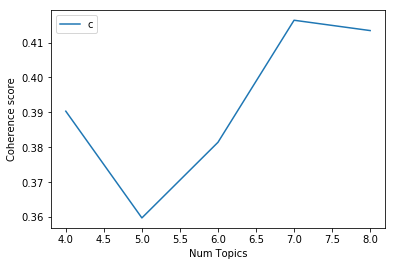

In [65]:
# display the coherence score of the different models
model_list_user_pooling = user_pooling_models[0]
coherence_values_user_pooling = user_pooling_models[1]

limit=9; start=4; step=1;
x = range(start, limit, step)
_ = plt.plot(x, coherence_values_user_pooling)
_ = plt.xlabel("Num Topics")
_ = plt.ylabel("Coherence score")
_ = plt.legend(("coherence_values"), loc='best')
_ = plt.savefig("user_pooling_coherence_scores")
_ = plt.show()

#### Choose the model with the highest coherence score (7 topics).

In [67]:
# print topics of model with highest coherence score
lda_model_user_pooling = model_list_user_pooling[3] # 7 topics model
_ = lda_model_user_pooling.print_topics()

2018-10-02 07:09:51,653 : INFO : topic #0 (0.117): 0.023*"beach" + 0.014*"city" + 0.010*"bar" + 0.010*"view" + 0.010*"best" + 0.009*"amazing" + 0.009*"night" + 0.009*"ramblas" + 0.009*"see" + 0.007*"festival"
2018-10-02 07:09:51,656 : INFO : topic #1 (0.068): 0.010*"time" + 0.009*"#streetart" + 0.008*"#arteurbano" + 0.008*"birthday" + 0.008*"#summer" + 0.008*"#nofilter" + 0.007*"good" + 0.006*"arte" + 0.006*"opiumbarcelona" + 0.006*"great"
2018-10-02 07:09:51,658 : INFO : topic #2 (0.092): 0.069*"gothic" + 0.062*"quarter" + 0.009*"street" + 0.009*"time" + 0.009*"love" + 0.008*"life" + 0.008*"today" + 0.007*"night" + 0.006*"#streetart" + 0.006*"best"
2018-10-02 07:09:51,660 : INFO : topic #3 (0.090): 0.036*"barceloneta" + 0.034*"playa" + 0.020*"parc" + 0.016*"#summer" + 0.015*"platja" + 0.010*"guell" + 0.010*"#friends" + 0.010*"#sun" + 0.010*"#beach" + 0.009*"#travel"
2018-10-02 07:09:51,663 : INFO : topic #4 (0.149): 0.133*"sagrada" + 0.084*"familia" + 0.045*"basílica" + 0.039*"#sagrad

### Visualize User Pooling Model

In [68]:
pyLDAvis.enable_notebook()
vis_up = pyLDAvis.gensim.prepare(lda_model_user_pooling, corpus_user_pooling, dictionary_user_pooling)

In [69]:
vis_up

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      23.420322        1       1  0.302327 -0.030793
0      17.744534        1       2 -0.020270  0.119566
2      13.844219        1       3 -0.052262  0.137064
5      12.425373        1       4 -0.039933  0.069070
6      11.551951        1       5 -0.082379 -0.100708
3      11.497038        1       6 -0.071524 -0.179256
1       9.516563        1       7 -0.035958 -0.014943, topic_info=     Category         Freq                 Term        Total  loglift  logprob
term                                                                          
517   Default  1105.000000              sagrada  1105.000000  30.0000  30.0000
1138  Default   698.000000              familia   698.000000  29.0000  29.0000
180   Default   340.000000               gothic   340.000000  28.0000  28.0000
181   Default   304.000000              quarter   304.000000  27.0000  27.0000
516   Default   370.000000             basílica   370.000000  26.0000  26.0000
788   Default   308.000000              família   308.000000  25.0000  25.0000
1094  Default   338.000000      #sagradafamilia   338.000000  24.0000  24.0000
784   Default   148.000000          barceloneta   148.000000  23.0000  23.0000
985   Default   139.000000                playa   139.000000  22.0000  22.0000
176   Default   148.000000                beach   148.000000  21.0000  21.0000
117   Default    98.000000             drinking    98.000000  20.0000  20.0000
597   Default    87.000000                 milà    87.000000  19.0000  19.0000
984   Default    83.000000                 parc    83.000000  18.0000  18.0000
600   Default    77.000000          pedreracasa    77.000000  17.0000  17.0000
460   Default   116.000000                gaudi   116.000000  16.0000  16.0000
799   Default    65.000000               platja    65.000000  15.0000  15.0000
362   Default   115.000000              #summer   115.000000  14.0000  14.0000
1081  Default   160.000000               #gaudi   160.000000  13.0000  13.0000
789   Default    51.000000              fashion    51.000000  12.0000  12.0000
1205  Default    49.000000           #endomondo    49.000000  11.0000  11.0000
444   Default    67.000000                  bar    67.000000  10.0000  10.0000
1210  Default    45.000000                   km    45.000000   9.0000   9.0000
88    Default    46.000000       #photodrinking    46.000000   8.0000   8.0000
1206  Default    44.000000          #endorphins    44.000000   7.0000   7.0000
453   Default   124.000000                 city   124.000000   6.0000   6.0000
785   Default    43.000000           bcnfashion    43.000000   5.0000   5.0000
1802  Default    43.000000                guell    43.000000   4.0000   4.0000
1207  Default    59.000000             finished    59.000000   3.0000   3.0000
1032  Default    45.000000             marbella    45.000000   2.0000   2.0000
513   Default    51.000000                 #sun    51.000000   1.0000   1.0000
...       ...          ...                  ...          ...      ...      ...
2617   Topic7     7.625985                costa     8.235742   2.2752  -6.0910
3406   Topic7     7.626110  #architecturelovers     8.237128   2.2751  -6.0910
3383   Topic7     7.626136                shine     8.237161   2.2751  -6.0910
3296   Topic7     7.879582        #vacationmode     8.525111   2.2734  -6.0583
873    Topic7    20.130363       opiumbarcelona    22.434078   2.2438  -5.1204
177    Topic7    19.443041             diagonal    22.097759   2.2241  -5.1551
990    Topic7    28.189674             birthday    35.321189   2.1266  -4.7836
1335   Topic7     7.723655                  bon     8.359236   2.2731  -6.0783
904    Topic7     9.258520   #travelphotography    10.357317   2.2400  -5.8970
2513   Topic7    19.162820             avinguda    25.100704   2.0822  -5.1696
51     Topic7    18.948411                black    30.110880   1.8890  -5.

#### The user pooling model looks more interpretable than the no pooling model. There are less repetitions of keywords among different topics. However, topics are a little bit mixed up since users tend to tweet about different topics.

### Hashtag Pooling

In [22]:
# train and evaluate different hashtag pooling models by running the function
hashtag_pooling_models = compute_coherence_values(dictionary=dictionary_hashtag_pooling,
                         corpus=corpus_hashtag_pooling, texts=tokenized_documents_hashtag_pooling)

2018-10-02 06:07:01,909 : INFO : using autotuned alpha, starting with [0.25, 0.25, 0.25, 0.25]
2018-10-02 06:07:01,915 : INFO : using serial LDA version on this node
2018-10-02 06:07:01,924 : INFO : running online (multi-pass) LDA training, 4 topics, 20 passes over the supplied corpus of 6040 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 06:07:03,875 : INFO : -9.917 per-word bound, 966.9 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:07:03,877 : INFO : PROGRESS: pass 0, at document #2000/6040
2018-10-02 06:07:05,536 : INFO : optimized alpha [0.16230854, 0.15512007, 0.16891643, 0.14989328]
2018-10-02 06:07:05,538 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:07:05,545 : INFO : topic #0 (0.162): 0.018*"sagrada" + 0.015*"#sagradafamilia" + 0.011*"#travel" + 0.010*"familia" + 0.009*

2018-10-02 06:07:11,095 : INFO : topic #1 (0.096): 0.013*"#graffiti" + 0.010*"gothic" + 0.010*"#art" + 0.009*"quarter" + 0.008*"#catalonia" + 0.008*"#streetart" + 0.005*"#streetphotography" + 0.005*"#city" + 0.005*"#artecallejero" + 0.005*"#artederua"
2018-10-02 06:07:11,097 : INFO : topic #2 (0.114): 0.024*"#sagradafamilia" + 0.020*"sagrada" + 0.017*"#gaudi" + 0.011*"familia" + 0.010*"basílica" + 0.010*"#summer" + 0.010*"#love" + 0.008*"#friends" + 0.008*"#beach" + 0.008*"#architecture"
2018-10-02 06:07:11,100 : INFO : topic #3 (0.098): 0.008*"#photooftheday" + 0.006*"#love" + 0.005*"#smile" + 0.005*"#fit" + 0.005*"#workout" + 0.005*"#amazing" + 0.005*"#women" + 0.005*"thursday" + 0.004*"#summer" + 0.004*"#photography"
2018-10-02 06:07:11,102 : INFO : topic diff=0.367591, rho=0.446322
2018-10-02 06:07:11,753 : INFO : -8.211 per-word bound, 296.4 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:07:11,754 : INFO : PROGRESS: pass 1, at docum

2018-10-02 06:07:15,969 : INFO : optimized alpha [0.082045265, 0.07194525, 0.086161427, 0.074462205]
2018-10-02 06:07:15,972 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:07:15,979 : INFO : topic #0 (0.082): 0.016*"#yoga" + 0.016*"#yogaeverydamnday" + 0.015*"place" + 0.012*"#yogi" + 0.011*"#selfie" + 0.011*"#youtube" + 0.011*"throwback" + 0.010*"#yogaeverywhere" + 0.010*"#yogainspiration" + 0.010*"thursday"
2018-10-02 06:07:15,983 : INFO : topic #1 (0.072): 0.016*"#yum" + 0.011*"#graffiti" + 0.010*"dream" + 0.007*"#catalonia" + 0.007*"#streetart" + 0.007*"nearly" + 0.007*"#friends" + 0.007*"tapa" + 0.007*"#yummy" + 0.007*"#tapas"
2018-10-02 06:07:15,985 : INFO : topic #2 (0.086): 0.029*"#sagradafamilia" + 0.023*"sagrada" + 0.016*"#gaudi" + 0.012*"familia" + 0.011*"#travel" + 0.011*"basílica" + 0.011*"#summer" + 0.008*"#beach" + 0.007*"#sun" + 0.007*"#love"
2018-10-02 06:07:15,987 : INFO : topic #3 (0.074): 0.009*"#love" + 0.009*"#workout" + 0.0

2018-10-02 06:07:20,318 : INFO : topic diff=0.288227, rho=0.353112
2018-10-02 06:07:20,919 : INFO : -8.284 per-word bound, 311.6 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:07:20,920 : INFO : PROGRESS: pass 4, at document #4000/6040
2018-10-02 06:07:21,283 : INFO : optimized alpha [0.064109974, 0.059584007, 0.079909042, 0.059815247]
2018-10-02 06:07:21,284 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:07:21,291 : INFO : topic #0 (0.064): 0.009*"#streetart" + 0.008*"place" + 0.008*"#arteurbano" + 0.008*"#yoga" + 0.008*"#yogaeverydamnday" + 0.007*"#digerible" + 0.007*"#love" + 0.006*"#selfie" + 0.006*"#travel" + 0.006*"#art"
2018-10-02 06:07:21,293 : INFO : topic #1 (0.060): 0.014*"#graffiti" + 0.010*"#art" + 0.010*"#streetart" + 0.009*"gothic" + 0.008*"#catalonia" + 0.008*"quarter" + 0.007*"#yum" + 0.006*"#friends" + 0.006*"#streetphotography" + 0.005*"#artecallejero"
2018-10-02 06:07:21,296 

2018-10-02 06:07:25,120 : INFO : topic #2 (0.076): 0.031*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#gaudi" + 0.016*"#travel" + 0.014*"familia" + 0.011*"#summer" + 0.011*"basílica" + 0.008*"#architecture" + 0.008*"#love" + 0.007*"#photography"
2018-10-02 06:07:25,123 : INFO : topic #3 (0.053): 0.011*"#photooftheday" + 0.007*"#love" + 0.006*"#smile" + 0.006*"#amazing" + 0.006*"#photography" + 0.005*"#photographer" + 0.005*"#workout" + 0.005*"#vegan" + 0.005*"#women" + 0.004*"#elhartazgodeunpaís"
2018-10-02 06:07:25,125 : INFO : topic diff=0.193461, rho=0.332964
2018-10-02 06:07:25,153 : INFO : -7.045 per-word bound, 132.1 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:07:25,155 : INFO : PROGRESS: pass 5, at document #6040/6040
2018-10-02 06:07:25,169 : INFO : optimized alpha [0.057444774, 0.051782265, 0.068169244, 0.052212797]
2018-10-02 06:07:25,171 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:07:

2018-10-02 06:07:29,070 : INFO : topic #0 (0.051): 0.012*"#yoga" + 0.012*"#yogaeverydamnday" + 0.012*"place" + 0.010*"#selfie" + 0.009*"thursday" + 0.009*"#streetart" + 0.009*"#youtube" + 0.009*"throwback" + 0.008*"#yogi" + 0.008*"#yogaeverywhere"
2018-10-02 06:07:29,072 : INFO : topic #1 (0.048): 0.014*"#graffiti" + 0.010*"#yum" + 0.010*"#art" + 0.010*"#streetart" + 0.009*"#catalonia" + 0.008*"gothic" + 0.007*"#friends" + 0.007*"#streetphotography" + 0.007*"dream" + 0.006*"quarter"
2018-10-02 06:07:29,074 : INFO : topic #2 (0.067): 0.029*"#sagradafamilia" + 0.024*"sagrada" + 0.016*"#gaudi" + 0.013*"familia" + 0.013*"#travel" + 0.011*"basílica" + 0.010*"#summer" + 0.010*"#architecture" + 0.007*"#beach" + 0.006*"#love"
2018-10-02 06:07:29,077 : INFO : topic #3 (0.047): 0.009*"#workout" + 0.009*"#photooftheday" + 0.009*"#fit" + 0.008*"#love" + 0.006*"#women" + 0.006*"#fitness" + 0.006*"#amazing" + 0.006*"#gym" + 0.006*"#smile" + 0.006*"#sport"
2018-10-02 06:07:29,078 : INFO : topic diff=

2018-10-02 06:07:33,192 : INFO : topic diff=0.165195, rho=0.288435
2018-10-02 06:07:33,759 : INFO : -8.075 per-word bound, 269.7 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:07:33,760 : INFO : PROGRESS: pass 8, at document #6000/6040
2018-10-02 06:07:34,093 : INFO : optimized alpha [0.046595696, 0.044313431, 0.065543167, 0.043905079]
2018-10-02 06:07:34,095 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:07:34,102 : INFO : topic #0 (0.047): 0.011*"#streetart" + 0.009*"#arteurbano" + 0.008*"#digerible" + 0.007*"place" + 0.007*"#yoga" + 0.006*"#yogaeverydamnday" + 0.006*"#selfie" + 0.006*"#art" + 0.006*"#love" + 0.006*"arte"
2018-10-02 06:07:34,104 : INFO : topic #1 (0.044): 0.015*"#graffiti" + 0.012*"#streetart" + 0.010*"#art" + 0.009*"gothic" + 0.008*"#streetphotography" + 0.008*"quarter" + 0.006*"#catalonia" + 0.006*"#friends" + 0.006*"#artecallejero" + 0.006*"#yum"
2018-10-02 06:07:34,106 : I

2018-10-02 06:07:37,002 : INFO : topic #2 (0.058): 0.029*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#gaudi" + 0.015*"#travel" + 0.013*"familia" + 0.011*"basílica" + 0.011*"#summer" + 0.007*"#love" + 0.007*"#architecture" + 0.007*"#sun"
2018-10-02 06:07:37,005 : INFO : topic #3 (0.042): 0.010*"#love" + 0.008*"#workout" + 0.008*"#fitness" + 0.008*"#fit" + 0.008*"#photooftheday" + 0.007*"#gym" + 0.007*"#health" + 0.007*"#fitfam" + 0.007*"#yogi" + 0.007*"#meditation"
2018-10-02 06:07:37,007 : INFO : topic diff=0.145256, rho=0.277137
2018-10-02 06:07:37,584 : INFO : -8.221 per-word bound, 298.5 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:07:37,586 : INFO : PROGRESS: pass 10, at document #2000/6040
2018-10-02 06:07:37,918 : INFO : optimized alpha [0.04396202, 0.041203849, 0.059469543, 0.040997803]
2018-10-02 06:07:37,919 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:07:37,927 : INFO : topic #0 (

2018-10-02 06:07:41,653 : INFO : topic #0 (0.042): 0.010*"#streetart" + 0.009*"#yoga" + 0.009*"place" + 0.009*"#yogaeverydamnday" + 0.009*"#arteurbano" + 0.008*"#digerible" + 0.008*"#selfie" + 0.007*"thursday" + 0.007*"throwback" + 0.007*"#youtube"
2018-10-02 06:07:41,655 : INFO : topic #1 (0.040): 0.015*"#graffiti" + 0.011*"#art" + 0.010*"#streetart" + 0.009*"gothic" + 0.008*"#yum" + 0.008*"quarter" + 0.008*"#catalonia" + 0.007*"#friends" + 0.007*"#streetphotography" + 0.006*"#artecallejero"
2018-10-02 06:07:41,658 : INFO : topic #2 (0.058): 0.027*"#sagradafamilia" + 0.024*"sagrada" + 0.017*"#gaudi" + 0.013*"familia" + 0.013*"#travel" + 0.011*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.008*"#love" + 0.006*"#beach"
2018-10-02 06:07:41,660 : INFO : topic #3 (0.039): 0.009*"#love" + 0.008*"#photooftheday" + 0.007*"#workout" + 0.007*"#fit" + 0.006*"#fitness" + 0.006*"#smile" + 0.006*"#women" + 0.005*"#food" + 0.005*"#foodporn" + 0.005*"#amazing"
2018-10-02 06:07:41,662 : INFO

2018-10-02 06:07:45,326 : INFO : topic diff=0.110958, rho=0.249844
2018-10-02 06:07:45,356 : INFO : -6.798 per-word bound, 111.3 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:07:45,358 : INFO : PROGRESS: pass 12, at document #6040/6040
2018-10-02 06:07:45,372 : INFO : optimized alpha [0.040733293, 0.037584599, 0.053492747, 0.037308879]
2018-10-02 06:07:45,374 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:07:45,380 : INFO : topic #0 (0.041): 0.016*"#yoga" + 0.016*"#yogaeverydamnday" + 0.014*"place" + 0.012*"#selfie" + 0.011*"thursday" + 0.011*"#youtube" + 0.011*"throwback" + 0.010*"#yogainspiration" + 0.010*"#yogaeverywhere" + 0.010*"#yogi"
2018-10-02 06:07:45,384 : INFO : topic #1 (0.038): 0.014*"#yum" + 0.013*"#graffiti" + 0.009*"#streetart" + 0.009*"#friends" + 0.008*"#art" + 0.007*"gothic" + 0.007*"#tapas" + 0.007*"#catalonia" + 0.007*"dream" + 0.006*"tapa"
2018-10-02 06:07:45,386 : INFO : topic 

2018-10-02 06:07:49,312 : INFO : topic #2 (0.054): 0.028*"#sagradafamilia" + 0.024*"sagrada" + 0.016*"#gaudi" + 0.014*"#travel" + 0.013*"familia" + 0.011*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.007*"#love" + 0.006*"#beach"
2018-10-02 06:07:49,315 : INFO : topic #3 (0.036): 0.009*"#workout" + 0.009*"#photooftheday" + 0.009*"#love" + 0.008*"#fit" + 0.007*"#fitness" + 0.006*"#women" + 0.006*"#gym" + 0.006*"#smile" + 0.006*"#amazing" + 0.005*"#health"
2018-10-02 06:07:49,318 : INFO : topic diff=0.129814, rho=0.235571
2018-10-02 06:07:49,872 : INFO : -8.177 per-word bound, 289.3 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:07:49,873 : INFO : PROGRESS: pass 14, at document #4000/6040
2018-10-02 06:07:50,191 : INFO : optimized alpha [0.038354144, 0.036173776, 0.054608282, 0.035782352]
2018-10-02 06:07:50,193 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:07:50,200 : INFO : topic #0 (

2018-10-02 06:07:53,831 : INFO : topic #0 (0.037): 0.011*"#streetart" + 0.009*"#arteurbano" + 0.008*"place" + 0.008*"#digerible" + 0.008*"#yoga" + 0.008*"#yogaeverydamnday" + 0.007*"#selfie" + 0.006*"thursday" + 0.006*"arte" + 0.006*"urbano"
2018-10-02 06:07:53,833 : INFO : topic #1 (0.035): 0.015*"#graffiti" + 0.012*"#streetart" + 0.010*"#art" + 0.009*"gothic" + 0.008*"#streetphotography" + 0.008*"quarter" + 0.007*"#catalonia" + 0.007*"#yum" + 0.006*"#friends" + 0.006*"#artecallejero"
2018-10-02 06:07:53,836 : INFO : topic #2 (0.055): 0.030*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.011*"#summer" + 0.011*"basílica" + 0.008*"#architecture" + 0.008*"#love" + 0.006*"#photography"
2018-10-02 06:07:53,838 : INFO : topic #3 (0.035): 0.010*"#photooftheday" + 0.008*"#love" + 0.006*"#smile" + 0.006*"#workout" + 0.005*"#amazing" + 0.005*"#fitness" + 0.005*"#fit" + 0.005*"#photography" + 0.005*"#women" + 0.005*"#food"
2018-10-02 06:07:53,840 : IN

2018-10-02 06:07:56,690 : INFO : topic diff=0.110455, rho=0.223495
2018-10-02 06:07:57,232 : INFO : -8.176 per-word bound, 289.3 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:07:57,233 : INFO : PROGRESS: pass 17, at document #2000/6040
2018-10-02 06:07:57,548 : INFO : optimized alpha [0.036481228, 0.033738106, 0.051256511, 0.033596389]
2018-10-02 06:07:57,550 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:07:57,557 : INFO : topic #0 (0.036): 0.012*"#yoga" + 0.012*"#yogaeverydamnday" + 0.012*"place" + 0.010*"#streetart" + 0.010*"#selfie" + 0.010*"thursday" + 0.009*"#youtube" + 0.009*"throwback" + 0.008*"#yogi" + 0.008*"#yogainspiration"
2018-10-02 06:07:57,558 : INFO : topic #1 (0.034): 0.014*"#graffiti" + 0.011*"#yum" + 0.010*"#art" + 0.010*"#streetart" + 0.008*"#catalonia" + 0.008*"gothic" + 0.007*"#friends" + 0.007*"#streetphotography" + 0.007*"quarter" + 0.006*"#artecallejero"
2018-10-02 06:

2018-10-02 06:08:01,133 : INFO : topic #2 (0.051): 0.027*"#sagradafamilia" + 0.024*"sagrada" + 0.017*"#gaudi" + 0.014*"#travel" + 0.013*"familia" + 0.011*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.008*"#love" + 0.006*"#beach"
2018-10-02 06:08:01,136 : INFO : topic #3 (0.033): 0.009*"#love" + 0.009*"#photooftheday" + 0.007*"#workout" + 0.007*"#fit" + 0.006*"#fitness" + 0.006*"#smile" + 0.006*"#food" + 0.006*"#women" + 0.005*"#foodporn" + 0.005*"#amazing"
2018-10-02 06:08:01,138 : INFO : topic diff=0.093096, rho=0.213104
2018-10-02 06:08:01,678 : INFO : -8.049 per-word bound, 264.8 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:08:01,680 : INFO : PROGRESS: pass 18, at document #6000/6040
2018-10-02 06:08:02,052 : INFO : optimized alpha [0.035408672, 0.033140458, 0.051928502, 0.032984223]
2018-10-02 06:08:02,054 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:08:02,062 : INFO : topic #

2018-10-02 06:08:05,027 : INFO : topic #0 (0.035): 0.015*"#yoga" + 0.015*"#yogaeverydamnday" + 0.014*"place" + 0.011*"#selfie" + 0.011*"thursday" + 0.010*"#youtube" + 0.010*"throwback" + 0.010*"#yogainspiration" + 0.010*"#yogaeverywhere" + 0.010*"#yogi"
2018-10-02 06:08:05,029 : INFO : topic #1 (0.032): 0.014*"#graffiti" + 0.013*"#yum" + 0.009*"#streetart" + 0.008*"#friends" + 0.008*"#art" + 0.007*"gothic" + 0.007*"#catalonia" + 0.007*"#tapas" + 0.007*"#streetphotography" + 0.006*"quarter"
2018-10-02 06:08:05,033 : INFO : topic #2 (0.048): 0.028*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#gaudi" + 0.015*"#travel" + 0.013*"familia" + 0.011*"basílica" + 0.011*"#summer" + 0.008*"#architecture" + 0.008*"#love" + 0.006*"#sun"
2018-10-02 06:08:05,035 : INFO : topic #3 (0.032): 0.009*"#love" + 0.008*"#photooftheday" + 0.008*"#workout" + 0.008*"#fitness" + 0.008*"#fit" + 0.007*"#gym" + 0.007*"#health" + 0.006*"#fitfam" + 0.006*"#yummy" + 0.006*"#yogi"
2018-10-02 06:08:05,037 : INFO : topic d

2018-10-02 06:08:16,843 : INFO : topic #4 (0.105): 0.026*"#yogi" + 0.026*"#yoga" + 0.024*"#yogaeverydamnday" + 0.017*"#yum" + 0.013*"#friends" + 0.011*"#yogaeverywhere" + 0.011*"#yogainspiration" + 0.011*"#selfie" + 0.009*"#fit" + 0.009*"#fitness"
2018-10-02 06:08:16,845 : INFO : topic diff=0.460982, rho=0.500000
2018-10-02 06:08:17,597 : INFO : -8.548 per-word bound, 374.3 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:08:17,598 : INFO : PROGRESS: pass 1, at document #2000/6040
2018-10-02 06:08:18,261 : INFO : optimized alpha [0.11444189, 0.10466506, 0.085900538, 0.088898987, 0.097123265]
2018-10-02 06:08:18,263 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:08:18,275 : INFO : topic #0 (0.114): 0.024*"#sagradafamilia" + 0.017*"sagrada" + 0.014*"#gaudi" + 0.012*"#travel" + 0.010*"familia" + 0.009*"#architecture" + 0.008*"#catalonia" + 0.008*"basílica" + 0.006*"#summer" + 0.006*"#catalunya"
2018-

2018-10-02 06:08:21,669 : INFO : topic #3 (0.073): 0.012*"#love" + 0.009*"#sagradafamilia" + 0.008*"yoga" + 0.007*"#yummy" + 0.006*"#endomondo" + 0.006*"#meditation" + 0.006*"#foodie" + 0.006*"beautiful" + 0.006*"km" + 0.005*"#igersbarcelona"
2018-10-02 06:08:21,671 : INFO : topic #4 (0.081): 0.015*"#yogi" + 0.015*"#yoga" + 0.015*"#yogaeverydamnday" + 0.013*"#friends" + 0.011*"#yum" + 0.010*"#selfie" + 0.009*"#fit" + 0.009*"#workout" + 0.009*"#yogaeverywhere" + 0.009*"#yogainspiration"
2018-10-02 06:08:21,673 : INFO : topic diff=0.393806, rho=0.407570
2018-10-02 06:08:22,278 : INFO : -8.346 per-word bound, 325.4 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:08:22,280 : INFO : PROGRESS: pass 2, at document #4000/6040
2018-10-02 06:08:22,659 : INFO : optimized alpha [0.10100587, 0.084442377, 0.068908356, 0.070350438, 0.07677421]
2018-10-02 06:08:22,661 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 

2018-10-02 06:08:25,791 : INFO : topic #2 (0.060): 0.016*"#art" + 0.010*"#love" + 0.007*"#drawing" + 0.006*"#city" + 0.005*"#illustration" + 0.005*"#summer" + 0.005*"#friends" + 0.005*"#gato" + 0.004*"gothic" + 0.004*"#brianeno"
2018-10-02 06:08:25,793 : INFO : topic #3 (0.059): 0.011*"#love" + 0.008*"#food" + 0.007*"#endomondo" + 0.007*"km" + 0.007*"#endorphins" + 0.007*"#foodporn" + 0.006*"#happy" + 0.006*"#foodie" + 0.006*"#igersbarcelona" + 0.005*"#sagradafamilia"
2018-10-02 06:08:25,795 : INFO : topic #4 (0.068): 0.016*"#friends" + 0.011*"#yogi" + 0.010*"#yoga" + 0.010*"#yogaeverydamnday" + 0.008*"#selfie" + 0.008*"#yum" + 0.007*"#workout" + 0.007*"#fit" + 0.007*"#beach" + 0.006*"#yogaeverywhere"
2018-10-02 06:08:25,798 : INFO : topic diff=0.280840, rho=0.377426
2018-10-02 06:08:26,397 : INFO : -8.118 per-word bound, 277.8 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:08:26,398 : INFO : PROGRESS: pass 3, at document #6000/6040
2018

2018-10-02 06:08:29,763 : INFO : topic #1 (0.064): 0.022*"#streetart" + 0.019*"#graffiti" + 0.015*"gothic" + 0.012*"quarter" + 0.009*"#arteurbano" + 0.008*"#streetphotography" + 0.008*"#digerible" + 0.007*"#summer" + 0.007*"#beach" + 0.006*"#artecallejero"
2018-10-02 06:08:29,766 : INFO : topic #2 (0.053): 0.015*"#art" + 0.010*"#love" + 0.006*"#drawing" + 0.006*"#summer" + 0.006*"#city" + 0.005*"#travel" + 0.005*"#illustration" + 0.005*"#friends" + 0.005*"#sun" + 0.004*"gothic"
2018-10-02 06:08:29,768 : INFO : topic #3 (0.050): 0.010*"#love" + 0.007*"#food" + 0.006*"#igersbarcelona" + 0.006*"#foodie" + 0.005*"#foodporn" + 0.005*"#endomondo" + 0.005*"#happy" + 0.005*"km" + 0.005*"#sun" + 0.005*"coffee"
2018-10-02 06:08:29,771 : INFO : topic #4 (0.060): 0.013*"#friends" + 0.008*"#selfie" + 0.008*"#yogi" + 0.007*"#yoga" + 0.007*"#yogaeverydamnday" + 0.006*"#yum" + 0.006*"#beach" + 0.006*"#workout" + 0.006*"#love" + 0.005*"#fitness"
2018-10-02 06:08:29,773 : INFO : topic diff=0.219941, rho

2018-10-02 06:08:32,818 : INFO : topic #0 (0.076): 0.030*"#sagradafamilia" + 0.023*"sagrada" + 0.015*"#travel" + 0.014*"#gaudi" + 0.012*"familia" + 0.011*"basílica" + 0.009*"#summer" + 0.008*"#youtube" + 0.007*"#photography" + 0.007*"#architecture"
2018-10-02 06:08:32,820 : INFO : topic #1 (0.056): 0.018*"#graffiti" + 0.018*"#streetart" + 0.016*"gothic" + 0.013*"quarter" + 0.008*"#arteurbano" + 0.007*"#pardes" + 0.007*"#sun" + 0.006*"#streetphotography" + 0.006*"#digerible" + 0.006*"#family"
2018-10-02 06:08:32,823 : INFO : topic #2 (0.047): 0.012*"#art" + 0.009*"#ølgod" + 0.008*"#love" + 0.007*"#city" + 0.006*"art" + 0.006*"#contemporaryart" + 0.006*"night" + 0.006*"#cruilla" + 0.006*"#brianeno" + 0.006*"sant"
2018-10-02 06:08:32,825 : INFO : topic #3 (0.044): 0.012*"#yummy" + 0.010*"#food" + 0.010*"#foodie" + 0.009*"#igersbarcelona" + 0.009*"#foodporn" + 0.008*"#happy" + 0.008*"#sagradafamilia" + 0.007*"#nofilters" + 0.007*"dream" + 0.007*"see"
2018-10-02 06:08:32,828 : INFO : topic 

2018-10-02 06:08:36,577 : INFO : PROGRESS: pass 7, at document #2000/6040
2018-10-02 06:08:36,928 : INFO : optimized alpha [0.073170662, 0.051973026, 0.043230746, 0.040867802, 0.051482949]
2018-10-02 06:08:36,930 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:08:36,937 : INFO : topic #0 (0.073): 0.032*"#sagradafamilia" + 0.026*"sagrada" + 0.015*"#gaudi" + 0.014*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.010*"#architecture" + 0.008*"#summer" + 0.007*"#catalonia" + 0.006*"#photography"
2018-10-02 06:08:36,940 : INFO : topic #1 (0.052): 0.020*"#streetart" + 0.020*"#graffiti" + 0.017*"gothic" + 0.014*"quarter" + 0.009*"#arteurbano" + 0.008*"#streetphotography" + 0.007*"#digerible" + 0.007*"#artecallejero" + 0.007*"#beach" + 0.006*"#artederua"
2018-10-02 06:08:36,942 : INFO : topic #2 (0.043): 0.016*"#art" + 0.008*"#love" + 0.007*"#city" + 0.006*"#brianeno" + 0.006*"#ølgod" + 0.005*"#drawing" + 0.005*"night" + 0.005*"#contemporaryart" + 0.0

2018-10-02 06:08:39,824 : INFO : topic diff=0.200979, rho=0.288435
2018-10-02 06:08:40,395 : INFO : -8.189 per-word bound, 291.9 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:08:40,397 : INFO : PROGRESS: pass 8, at document #4000/6040
2018-10-02 06:08:40,726 : INFO : optimized alpha [0.071615942, 0.049050812, 0.041156393, 0.038662929, 0.047857068]
2018-10-02 06:08:40,728 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:08:40,738 : INFO : topic #0 (0.072): 0.029*"#sagradafamilia" + 0.025*"sagrada" + 0.017*"#gaudi" + 0.014*"familia" + 0.014*"#travel" + 0.012*"basílica" + 0.009*"#architecture" + 0.008*"#summer" + 0.007*"#love" + 0.006*"#catalonia"
2018-10-02 06:08:40,740 : INFO : topic #1 (0.049): 0.022*"#streetart" + 0.022*"#graffiti" + 0.017*"gothic" + 0.015*"quarter" + 0.010*"#arteurbano" + 0.008*"#digerible" + 0.007*"#streetphotography" + 0.007*"#artecallejero" + 0.006*"#artederua" + 0.006*"#bea

2018-10-02 06:08:43,542 : INFO : topic #4 (0.046): 0.015*"#friends" + 0.012*"#yogi" + 0.011*"#yoga" + 0.011*"#yogaeverydamnday" + 0.010*"#yum" + 0.010*"#selfie" + 0.008*"beautiful" + 0.008*"throwback" + 0.008*"#workout" + 0.008*"thursday"
2018-10-02 06:08:43,544 : INFO : topic diff=0.156754, rho=0.277137
2018-10-02 06:08:44,096 : INFO : -8.060 per-word bound, 266.8 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:08:44,097 : INFO : PROGRESS: pass 9, at document #6000/6040
2018-10-02 06:08:44,428 : INFO : optimized alpha [0.070584282, 0.047193017, 0.039518237, 0.036509406, 0.045412585]
2018-10-02 06:08:44,430 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:08:44,438 : INFO : topic #0 (0.071): 0.033*"#sagradafamilia" + 0.026*"sagrada" + 0.017*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.012*"basílica" + 0.009*"#summer" + 0.009*"#architecture" + 0.008*"#photography" + 0.007*"#love"
2018-10-02 06:0

2018-10-02 06:08:47,331 : INFO : topic #3 (0.035): 0.010*"#love" + 0.009*"#food" + 0.007*"#foodporn" + 0.007*"#igersbarcelona" + 0.006*"#foodie" + 0.006*"#endomondo" + 0.006*"#happy" + 0.005*"km" + 0.005*"#sun" + 0.005*"#endorphins"
2018-10-02 06:08:47,334 : INFO : topic #4 (0.044): 0.014*"#friends" + 0.009*"#yogi" + 0.009*"#selfie" + 0.009*"#yoga" + 0.009*"#yogaeverydamnday" + 0.008*"#yum" + 0.007*"beautiful" + 0.007*"#beach" + 0.007*"#workout" + 0.006*"throwback"
2018-10-02 06:08:47,336 : INFO : topic diff=0.123478, rho=0.267071
2018-10-02 06:08:47,386 : INFO : -6.792 per-word bound, 110.8 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:08:47,390 : INFO : PROGRESS: pass 10, at document #6040/6040
2018-10-02 06:08:47,402 : INFO : optimized alpha [0.065093309, 0.044666659, 0.037051842, 0.034584269, 0.044526022]
2018-10-02 06:08:47,404 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:08:47,413 : INFO : to

2018-10-02 06:08:50,493 : INFO : topic #2 (0.036): 0.013*"#art" + 0.008*"#love" + 0.008*"#ølgod" + 0.006*"art" + 0.006*"#contemporaryart" + 0.006*"#brianeno" + 0.006*"night" + 0.006*"#cruilla" + 0.005*"sant" + 0.005*"#drawing"
2018-10-02 06:08:50,496 : INFO : topic #3 (0.034): 0.011*"#yummy" + 0.011*"#food" + 0.009*"#foodporn" + 0.009*"#foodie" + 0.009*"#igersbarcelona" + 0.008*"#happy" + 0.008*"#love" + 0.007*"#nofilters" + 0.007*"see" + 0.007*"#sagradafamilia"
2018-10-02 06:08:50,499 : INFO : topic #4 (0.043): 0.019*"#yogi" + 0.019*"#yoga" + 0.018*"#yogaeverydamnday" + 0.016*"#yum" + 0.014*"#selfie" + 0.013*"#friends" + 0.013*"beautiful" + 0.013*"throwback" + 0.013*"thursday" + 0.012*"#yogainspiration"
2018-10-02 06:08:50,501 : INFO : topic diff=0.140594, rho=0.258027
2018-10-02 06:08:51,174 : INFO : -8.154 per-word bound, 284.8 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:08:51,175 : INFO : PROGRESS: pass 12, at document #2000/6040


2018-10-02 06:08:54,332 : INFO : topic #1 (0.042): 0.021*"#streetart" + 0.020*"#graffiti" + 0.017*"gothic" + 0.015*"quarter" + 0.010*"#arteurbano" + 0.008*"#streetphotography" + 0.008*"#digerible" + 0.007*"#artecallejero" + 0.007*"#beach" + 0.006*"#artederua"
2018-10-02 06:08:54,335 : INFO : topic #2 (0.035): 0.017*"#art" + 0.008*"#love" + 0.006*"#ølgod" + 0.006*"#brianeno" + 0.006*"#drawing" + 0.005*"#city" + 0.005*"#contemporaryart" + 0.005*"night" + 0.005*"art" + 0.005*"#summer"
2018-10-02 06:08:54,338 : INFO : topic #3 (0.032): 0.009*"#food" + 0.008*"#yummy" + 0.008*"#foodporn" + 0.008*"#love" + 0.007*"#foodie" + 0.007*"#igersbarcelona" + 0.007*"#endomondo" + 0.006*"#happy" + 0.006*"km" + 0.006*"#endorphins"
2018-10-02 06:08:54,340 : INFO : topic #4 (0.042): 0.015*"#yogi" + 0.014*"#yoga" + 0.014*"#yogaeverydamnday" + 0.013*"#friends" + 0.013*"#yum" + 0.012*"#selfie" + 0.010*"beautiful" + 0.010*"throwback" + 0.010*"thursday" + 0.010*"#yogainspiration"
2018-10-02 06:08:54,343 : INFO 

2018-10-02 06:08:58,093 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:08:58,101 : INFO : topic #0 (0.062): 0.030*"#sagradafamilia" + 0.026*"sagrada" + 0.017*"#gaudi" + 0.014*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.009*"#architecture" + 0.009*"#summer" + 0.007*"#love" + 0.006*"#photography"
2018-10-02 06:08:58,103 : INFO : topic #1 (0.041): 0.022*"#streetart" + 0.022*"#graffiti" + 0.018*"gothic" + 0.015*"quarter" + 0.010*"#arteurbano" + 0.009*"#digerible" + 0.007*"#streetphotography" + 0.007*"#artecallejero" + 0.006*"#artederua" + 0.006*"#beach"
2018-10-02 06:08:58,106 : INFO : topic #2 (0.034): 0.017*"#art" + 0.009*"#love" + 0.007*"#drawing" + 0.006*"#gato" + 0.005*"#illustration" + 0.005*"#friends" + 0.005*"#summer" + 0.005*"#brianeno" + 0.005*"#city" + 0.004*"#cruilla"
2018-10-02 06:08:58,108 : INFO : topic #3 (0.032): 0.010*"#food" + 0.010*"#love" + 0.009*"#foodporn" + 0.007*"#endomondo" + 0.007*"km" + 0.007*"#igersbarcelona" + 

2018-10-02 06:09:01,494 : INFO : -8.044 per-word bound, 263.9 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:09:01,495 : INFO : PROGRESS: pass 15, at document #6000/6040
2018-10-02 06:09:01,827 : INFO : optimized alpha [0.062599137, 0.040696282, 0.033787899, 0.030987786, 0.039278403]
2018-10-02 06:09:01,829 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:09:01,837 : INFO : topic #0 (0.063): 0.033*"#sagradafamilia" + 0.026*"sagrada" + 0.017*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.012*"basílica" + 0.009*"#summer" + 0.009*"#architecture" + 0.008*"#photography" + 0.007*"#love"
2018-10-02 06:09:01,839 : INFO : topic #1 (0.041): 0.023*"#streetart" + 0.021*"#graffiti" + 0.017*"gothic" + 0.014*"quarter" + 0.010*"#arteurbano" + 0.008*"#digerible" + 0.008*"#streetphotography" + 0.007*"#artecallejero" + 0.007*"#beach" + 0.006*"#artederua"
2018-10-02 06:09:01,841 : INFO : topic #2 (0.034): 0.016*"#a

2018-10-02 06:09:04,885 : INFO : topic #4 (0.039): 0.014*"#friends" + 0.010*"#yogi" + 0.010*"#yoga" + 0.010*"#selfie" + 0.010*"#yogaeverydamnday" + 0.009*"#yum" + 0.007*"beautiful" + 0.007*"throwback" + 0.007*"#workout" + 0.007*"thursday"
2018-10-02 06:09:04,888 : INFO : topic diff=0.088166, rho=0.223495
2018-10-02 06:09:04,915 : INFO : -6.713 per-word bound, 104.9 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:09:04,917 : INFO : PROGRESS: pass 16, at document #6040/6040
2018-10-02 06:09:04,933 : INFO : optimized alpha [0.059129737, 0.039449822, 0.032494858, 0.030100938, 0.03916765]
2018-10-02 06:09:04,935 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:09:04,943 : INFO : topic #0 (0.059): 0.031*"#sagradafamilia" + 0.025*"sagrada" + 0.015*"#travel" + 0.015*"#gaudi" + 0.013*"familia" + 0.012*"basílica" + 0.009*"#summer" + 0.008*"#architecture" + 0.008*"#photography" + 0.006*"#love"
2018-10-02 06:09:04,9

2018-10-02 06:09:08,293 : INFO : topic #3 (0.030): 0.011*"#food" + 0.010*"#yummy" + 0.009*"#foodporn" + 0.009*"#foodie" + 0.008*"#igersbarcelona" + 0.008*"#love" + 0.008*"#happy" + 0.007*"#nofilters" + 0.007*"see" + 0.006*"#sagradafamilia"
2018-10-02 06:09:08,296 : INFO : topic #4 (0.039): 0.018*"#yogi" + 0.018*"#yoga" + 0.018*"#yogaeverydamnday" + 0.015*"#yum" + 0.014*"#selfie" + 0.013*"#friends" + 0.012*"beautiful" + 0.012*"throwback" + 0.012*"thursday" + 0.012*"#yogaeverywhere"
2018-10-02 06:09:08,298 : INFO : topic diff=0.122740, rho=0.218114
2018-10-02 06:09:08,931 : INFO : -8.120 per-word bound, 278.2 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:09:08,932 : INFO : PROGRESS: pass 18, at document #2000/6040
2018-10-02 06:09:09,306 : INFO : optimized alpha [0.058624588, 0.038765755, 0.031924237, 0.029528802, 0.038273849]
2018-10-02 06:09:09,308 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06

2018-10-02 06:09:12,234 : INFO : topic #2 (0.032): 0.016*"#art" + 0.008*"#love" + 0.006*"#drawing" + 0.006*"#ølgod" + 0.006*"#brianeno" + 0.005*"#contemporaryart" + 0.005*"night" + 0.005*"art" + 0.005*"#city" + 0.005*"#summer"
2018-10-02 06:09:12,237 : INFO : topic #3 (0.029): 0.009*"#food" + 0.008*"#love" + 0.008*"#foodporn" + 0.008*"#yummy" + 0.008*"#foodie" + 0.007*"#igersbarcelona" + 0.007*"#endomondo" + 0.007*"#happy" + 0.006*"km" + 0.006*"#endorphins"
2018-10-02 06:09:12,239 : INFO : topic #4 (0.038): 0.015*"#yogi" + 0.014*"#yoga" + 0.014*"#yogaeverydamnday" + 0.013*"#friends" + 0.013*"#yum" + 0.012*"#selfie" + 0.010*"beautiful" + 0.010*"throwback" + 0.010*"thursday" + 0.010*"#yogaeverywhere"
2018-10-02 06:09:12,242 : INFO : topic diff=0.102123, rho=0.208424
2018-10-02 06:09:12,829 : INFO : -8.134 per-word bound, 280.9 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:09:12,830 : INFO : PROGRESS: pass 19, at document #4000/6040
2018-1

2018-10-02 06:09:23,982 : INFO : topic #4 (0.128): 0.022*"sagrada" + 0.020*"#sagradafamilia" + 0.012*"familia" + 0.012*"#gaudi" + 0.011*"basílica" + 0.008*"#architecture" + 0.007*"#travel" + 0.007*"#summer" + 0.007*"#church" + 0.006*"#art"
2018-10-02 06:09:23,985 : INFO : topic diff=4.343355, rho=1.000000
2018-10-02 06:09:24,931 : INFO : -9.836 per-word bound, 914.2 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:09:24,932 : INFO : PROGRESS: pass 0, at document #4000/6040
2018-10-02 06:09:25,632 : INFO : optimized alpha [0.10051705, 0.10368299, 0.097246021, 0.1034622, 0.13158934, 0.10175174]
2018-10-02 06:09:25,635 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:09:25,645 : INFO : topic #2 (0.097): 0.015*"#streetart" + 0.012*"#arteurbano" + 0.012*"#digerible" + 0.011*"#graffiti" + 0.008*"arte" + 0.008*"#arteenlacalle" + 0.008*"urbano" + 0.008*"#architecture" + 0.007*"#city" + 0.007*"#fashion"
2018

2018-10-02 06:09:29,495 : INFO : topic #3 (0.084): 0.013*"#art" + 0.011*"#yogi" + 0.010*"#yoga" + 0.008*"gothic" + 0.008*"#love" + 0.008*"quarter" + 0.008*"#yogaeverydamnday" + 0.007*"thursday" + 0.007*"#fit" + 0.007*"#food"
2018-10-02 06:09:29,498 : INFO : topic #4 (0.134): 0.025*"#sagradafamilia" + 0.022*"sagrada" + 0.018*"#gaudi" + 0.012*"familia" + 0.011*"basílica" + 0.010*"#travel" + 0.009*"#summer" + 0.008*"#architecture" + 0.005*"gothic" + 0.005*"família"
2018-10-02 06:09:29,500 : INFO : topic diff=0.360942, rho=0.446322
2018-10-02 06:09:30,246 : INFO : -8.183 per-word bound, 290.6 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:09:30,248 : INFO : PROGRESS: pass 1, at document #6000/6040
2018-10-02 06:09:30,644 : INFO : optimized alpha [0.074519649, 0.077229924, 0.073720567, 0.079884976, 0.13515174, 0.077583142]
2018-10-02 06:09:30,645 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:09:30,6

2018-10-02 06:09:33,877 : INFO : topic #5 (0.066): 0.012*"#photooftheday" + 0.012*"#graffiti" + 0.009*"#streetphotography" + 0.008*"#artederua" + 0.008*"#artecallejero" + 0.008*"#amazing" + 0.008*"#smile" + 0.008*"#photography" + 0.007*"#vegan" + 0.006*"#minimalism"
2018-10-02 06:09:33,880 : INFO : topic #3 (0.070): 0.010*"#art" + 0.008*"#yogi" + 0.008*"gothic" + 0.008*"#selfie" + 0.008*"quarter" + 0.007*"#yoga" + 0.007*"#love" + 0.007*"#yogaeverydamnday" + 0.007*"thursday" + 0.006*"#foodporn"
2018-10-02 06:09:33,882 : INFO : topic #4 (0.120): 0.034*"#sagradafamilia" + 0.025*"sagrada" + 0.017*"#gaudi" + 0.017*"#travel" + 0.014*"familia" + 0.011*"basílica" + 0.011*"#summer" + 0.008*"#architecture" + 0.008*"#photography" + 0.006*"família"
2018-10-02 06:09:33,884 : INFO : topic diff=0.289310, rho=0.407570
2018-10-02 06:09:33,918 : INFO : -7.154 per-word bound, 142.4 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:09:33,920 : INFO : PROGRESS: pas

2018-10-02 06:09:36,994 : INFO : topic #0 (0.056): 0.026*"#yum" + 0.013*"time" + 0.012*"#tapas" + 0.011*"dream" + 0.011*"beautiful" + 0.011*"tapa" + 0.010*"wife" + 0.010*"#youknowimright" + 0.010*"anyone" + 0.009*"#sun"
2018-10-02 06:09:36,996 : INFO : topic #5 (0.057): 0.013*"#graffiti" + 0.011*"made" + 0.009*"#photooftheday" + 0.008*"#sagradafamilia" + 0.008*"time" + 0.007*"amazing" + 0.007*"fashion" + 0.007*"ramblas" + 0.007*"see" + 0.007*"food"
2018-10-02 06:09:36,999 : INFO : topic #3 (0.064): 0.023*"#yogi" + 0.023*"#yoga" + 0.023*"#yogaeverydamnday" + 0.017*"#selfie" + 0.016*"thursday" + 0.016*"#youtube" + 0.015*"throwback" + 0.015*"#yogaeverywhere" + 0.015*"#yogainspiration" + 0.010*"#love"
2018-10-02 06:09:37,001 : INFO : topic #4 (0.097): 0.032*"#sagradafamilia" + 0.025*"sagrada" + 0.015*"#travel" + 0.015*"#gaudi" + 0.013*"familia" + 0.012*"basílica" + 0.010*"#summer" + 0.008*"place" + 0.008*"home" + 0.007*"#architecture"
2018-10-02 06:09:37,003 : INFO : topic diff=0.247566, r

2018-10-02 06:09:41,352 : INFO : topic #2 (0.046): 0.022*"#streetart" + 0.015*"#graffiti" + 0.014*"#arteurbano" + 0.011*"#digerible" + 0.010*"#art" + 0.010*"night" + 0.008*"urbano" + 0.008*"arte" + 0.007*"#arteenlacalle" + 0.007*"#cruilla"
2018-10-02 06:09:41,354 : INFO : topic #5 (0.050): 0.013*"#graffiti" + 0.010*"#photooftheday" + 0.009*"#artederua" + 0.009*"#artecallejero" + 0.009*"#amazing" + 0.008*"#streetphotography" + 0.008*"#catalunya" + 0.008*"#igeurope" + 0.007*"made" + 0.007*"#sagradafamilia"
2018-10-02 06:09:41,357 : INFO : topic #1 (0.051): 0.019*"#beach" + 0.018*"#friends" + 0.013*"#love" + 0.009*"#sun" + 0.006*"#sol" + 0.006*"#music" + 0.006*"#circuitfestival" + 0.006*"#run" + 0.006*"#summer" + 0.006*"beach"
2018-10-02 06:09:41,359 : INFO : topic #3 (0.057): 0.018*"#yogi" + 0.017*"#yoga" + 0.017*"#yogaeverydamnday" + 0.013*"thursday" + 0.013*"#selfie" + 0.012*"#youtube" + 0.012*"throwback" + 0.012*"#yogaeverywhere" + 0.012*"#yogainspiration" + 0.011*"#fit"
2018-10-02 06

2018-10-02 06:09:45,043 : INFO : PROGRESS: pass 6, at document #4000/6040
2018-10-02 06:09:45,386 : INFO : optimized alpha [0.046659924, 0.047953594, 0.042921931, 0.052135549, 0.087794855, 0.045827113]
2018-10-02 06:09:45,388 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:09:45,397 : INFO : topic #2 (0.043): 0.024*"#streetart" + 0.018*"#graffiti" + 0.014*"#arteurbano" + 0.012*"#digerible" + 0.010*"#art" + 0.008*"#cruilla" + 0.008*"urbano" + 0.008*"arte" + 0.008*"night" + 0.008*"#arteenlacalle"
2018-10-02 06:09:45,399 : INFO : topic #5 (0.046): 0.013*"#graffiti" + 0.010*"#photooftheday" + 0.009*"#artederua" + 0.009*"#artecallejero" + 0.008*"#igeurope" + 0.008*"#amazing" + 0.007*"#endomondo" + 0.007*"#catalunya" + 0.007*"km" + 0.007*"#streetphotography"
2018-10-02 06:09:45,402 : INFO : topic #1 (0.048): 0.020*"#friends" + 0.018*"#love" + 0.015*"#beach" + 0.008*"#sun" + 0.006*"#summer" + 0.005*"#run" + 0.005*"#music" + 0.005*"#life" + 0.005*"beac

2018-10-02 06:09:48,382 : INFO : topic diff=0.184332, rho=0.301238
2018-10-02 06:09:48,961 : INFO : -8.054 per-word bound, 265.8 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:09:48,962 : INFO : PROGRESS: pass 7, at document #6000/6040
2018-10-02 06:09:49,307 : INFO : optimized alpha [0.044174902, 0.045678392, 0.04070669, 0.048719585, 0.087028556, 0.042749144]
2018-10-02 06:09:49,309 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:09:49,318 : INFO : topic #2 (0.041): 0.027*"#streetart" + 0.018*"#graffiti" + 0.014*"#arteurbano" + 0.012*"#digerible" + 0.009*"#art" + 0.009*"urbano" + 0.009*"arte" + 0.008*"#arteenlacalle" + 0.007*"night" + 0.007*"#cruilla"
2018-10-02 06:09:49,320 : INFO : topic #5 (0.043): 0.013*"#photooftheday" + 0.011*"#graffiti" + 0.009*"#artederua" + 0.008*"#photography" + 0.008*"#amazing" + 0.008*"#streetphotography" + 0.008*"#artecallejero" + 0.008*"#smile" + 0.007*"#vegan" + 0

2018-10-02 06:09:52,322 : INFO : topic #4 (0.084): 0.034*"#sagradafamilia" + 0.026*"sagrada" + 0.017*"#travel" + 0.017*"#gaudi" + 0.015*"familia" + 0.012*"basílica" + 0.010*"#summer" + 0.009*"#architecture" + 0.007*"#photography" + 0.006*"#europe"
2018-10-02 06:09:52,324 : INFO : topic diff=0.153842, rho=0.288435
2018-10-02 06:09:52,353 : INFO : -6.698 per-word bound, 103.8 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:09:52,354 : INFO : PROGRESS: pass 8, at document #6040/6040
2018-10-02 06:09:52,369 : INFO : optimized alpha [0.042006351, 0.04255281, 0.037869379, 0.047899768, 0.076976277, 0.040080369]
2018-10-02 06:09:52,371 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:09:52,381 : INFO : topic #2 (0.038): 0.022*"#streetart" + 0.015*"#graffiti" + 0.013*"night" + 0.012*"#arteurbano" + 0.010*"#ølgod" + 0.010*"#digerible" + 0.010*"#cruilla" + 0.008*"#art" + 0.007*"urbano" + 0.007*"arte"
2018-10-02 06:

2018-10-02 06:09:55,645 : INFO : topic #3 (0.046): 0.022*"#yogi" + 0.021*"#yoga" + 0.021*"#yogaeverydamnday" + 0.016*"#selfie" + 0.016*"thursday" + 0.015*"#youtube" + 0.015*"throwback" + 0.014*"#yogaeverywhere" + 0.014*"#yogainspiration" + 0.010*"#love"
2018-10-02 06:09:55,648 : INFO : topic #4 (0.075): 0.033*"#sagradafamilia" + 0.026*"sagrada" + 0.016*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.012*"basílica" + 0.009*"#summer" + 0.008*"#architecture" + 0.007*"place" + 0.007*"#photography"
2018-10-02 06:09:55,651 : INFO : topic diff=0.166507, rho=0.277137
2018-10-02 06:09:56,260 : INFO : -8.114 per-word bound, 277.0 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:09:56,262 : INFO : PROGRESS: pass 10, at document #2000/6040
2018-10-02 06:09:56,614 : INFO : optimized alpha [0.04048273, 0.040708531, 0.036547318, 0.045285814, 0.074890636, 0.038412966]
2018-10-02 06:09:56,616 : INFO : merging changes from 2000 documents into a model of 60

2018-10-02 06:09:59,547 : INFO : topic #1 (0.040): 0.019*"#friends" + 0.019*"#beach" + 0.014*"#love" + 0.009*"#sun" + 0.006*"#music" + 0.006*"#sol" + 0.006*"#summer" + 0.006*"#run" + 0.006*"beach" + 0.006*"#circuitfestival"
2018-10-02 06:09:59,550 : INFO : topic #3 (0.044): 0.018*"#yogi" + 0.018*"#yoga" + 0.017*"#yogaeverydamnday" + 0.014*"thursday" + 0.013*"#selfie" + 0.012*"#youtube" + 0.012*"throwback" + 0.012*"#yogaeverywhere" + 0.012*"#yogainspiration" + 0.010*"#fit"
2018-10-02 06:09:59,553 : INFO : topic #4 (0.073): 0.033*"#sagradafamilia" + 0.027*"sagrada" + 0.016*"#gaudi" + 0.015*"#travel" + 0.014*"familia" + 0.013*"basílica" + 0.011*"#architecture" + 0.009*"#summer" + 0.007*"família" + 0.006*"#catalonia"
2018-10-02 06:09:59,555 : INFO : topic diff=0.165319, rho=0.258027
2018-10-02 06:10:00,137 : INFO : -8.158 per-word bound, 285.6 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:10:00,139 : INFO : PROGRESS: pass 11, at document #4

2018-10-02 06:10:03,421 : INFO : topic #5 (0.036): 0.013*"#graffiti" + 0.011*"#photooftheday" + 0.009*"#artederua" + 0.009*"#artecallejero" + 0.008*"#igeurope" + 0.008*"#amazing" + 0.008*"#catalunya" + 0.007*"#endomondo" + 0.007*"#streetphotography" + 0.007*"#smile"
2018-10-02 06:10:03,424 : INFO : topic #1 (0.039): 0.020*"#friends" + 0.018*"#love" + 0.016*"#beach" + 0.009*"#sun" + 0.006*"#summer" + 0.006*"#music" + 0.005*"#run" + 0.005*"beach" + 0.005*"#sol" + 0.005*"#life"
2018-10-02 06:10:03,426 : INFO : topic #3 (0.042): 0.015*"#yogi" + 0.014*"#yoga" + 0.014*"#yogaeverydamnday" + 0.011*"#selfie" + 0.011*"thursday" + 0.010*"#youtube" + 0.010*"throwback" + 0.009*"#yogainspiration" + 0.009*"#yogaeverywhere" + 0.009*"#fit"
2018-10-02 06:10:03,429 : INFO : topic #4 (0.074): 0.031*"#sagradafamilia" + 0.026*"sagrada" + 0.018*"#gaudi" + 0.014*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.010*"#architecture" + 0.009*"#summer" + 0.006*"família" + 0.006*"#europe"
2018-10-02 06:10:03,431 

2018-10-02 06:10:07,241 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:10:07,250 : INFO : topic #2 (0.034): 0.027*"#streetart" + 0.019*"#graffiti" + 0.014*"#arteurbano" + 0.012*"#digerible" + 0.010*"#art" + 0.009*"urbano" + 0.009*"arte" + 0.008*"night" + 0.008*"#arteenlacalle" + 0.007*"#cruilla"
2018-10-02 06:10:07,252 : INFO : topic #5 (0.035): 0.013*"#photooftheday" + 0.011*"#graffiti" + 0.009*"#artederua" + 0.009*"#amazing" + 0.009*"#photography" + 0.008*"#artecallejero" + 0.008*"#streetphotography" + 0.008*"#smile" + 0.007*"#vegan" + 0.007*"#igeurope"
2018-10-02 06:10:07,254 : INFO : topic #1 (0.038): 0.017*"#friends" + 0.017*"#love" + 0.016*"#beach" + 0.010*"#sun" + 0.006*"#summer" + 0.006*"#run" + 0.006*"#music" + 0.006*"#sol" + 0.005*"beach" + 0.005*"#party"
2018-10-02 06:10:07,258 : INFO : topic #3 (0.041): 0.012*"#yogi" + 0.012*"#yoga" + 0.011*"#yogaeverydamnday" + 0.011*"#selfie" + 0.010*"thursday" + 0.009*"#youtube" + 0.008*"throwba

2018-10-02 06:10:10,795 : INFO : topic diff=0.100702, rho=0.235571
2018-10-02 06:10:10,834 : INFO : -6.593 per-word bound, 96.6 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:10:10,837 : INFO : PROGRESS: pass 14, at document #6040/6040
2018-10-02 06:10:10,852 : INFO : optimized alpha [0.036206659, 0.036907215, 0.03265572, 0.04105752, 0.068425812, 0.033930451]
2018-10-02 06:10:10,858 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:10:10,871 : INFO : topic #2 (0.033): 0.024*"#streetart" + 0.016*"#graffiti" + 0.012*"night" + 0.012*"#arteurbano" + 0.010*"#digerible" + 0.009*"#ølgod" + 0.009*"#cruilla" + 0.008*"#art" + 0.007*"urbano" + 0.007*"arte"
2018-10-02 06:10:10,874 : INFO : topic #5 (0.034): 0.013*"#graffiti" + 0.011*"#photooftheday" + 0.010*"made" + 0.008*"#artederua" + 0.007*"time" + 0.007*"#amazing" + 0.007*"#photography" + 0.007*"#artecallejero" + 0.007*"#streetphotography" + 0.007*"#sagradafamil

2018-10-02 06:10:13,761 : INFO : topic #4 (0.068): 0.033*"#sagradafamilia" + 0.026*"sagrada" + 0.016*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.012*"basílica" + 0.009*"#summer" + 0.009*"#architecture" + 0.007*"#photography" + 0.007*"família"
2018-10-02 06:10:13,766 : INFO : topic diff=0.139903, rho=0.229295
2018-10-02 06:10:14,340 : INFO : -8.074 per-word bound, 269.4 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:10:14,342 : INFO : PROGRESS: pass 16, at document #2000/6040
2018-10-02 06:10:14,674 : INFO : optimized alpha [0.035617996, 0.036072072, 0.032176085, 0.039803002, 0.067590632, 0.033300605]
2018-10-02 06:10:14,676 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:10:14,686 : INFO : topic #2 (0.032): 0.025*"#streetart" + 0.017*"#graffiti" + 0.014*"#arteurbano" + 0.011*"#digerible" + 0.011*"night" + 0.011*"#art" + 0.008*"urbano" + 0.008*"arte" + 0.008*"#cruilla" + 0.007*"#arteenlacalle

2018-10-02 06:10:17,499 : INFO : topic #1 (0.036): 0.019*"#friends" + 0.019*"#beach" + 0.015*"#love" + 0.009*"#sun" + 0.006*"#music" + 0.006*"#summer" + 0.006*"#sol" + 0.006*"beach" + 0.006*"#run" + 0.006*"#circuitfestival"
2018-10-02 06:10:17,502 : INFO : topic #3 (0.039): 0.018*"#yogi" + 0.018*"#yoga" + 0.017*"#yogaeverydamnday" + 0.014*"thursday" + 0.013*"#selfie" + 0.012*"#youtube" + 0.012*"throwback" + 0.012*"#yogainspiration" + 0.012*"#yogaeverywhere" + 0.010*"#fit"
2018-10-02 06:10:17,504 : INFO : topic #4 (0.067): 0.033*"#sagradafamilia" + 0.027*"sagrada" + 0.016*"#gaudi" + 0.016*"#travel" + 0.014*"familia" + 0.013*"basílica" + 0.010*"#architecture" + 0.009*"#summer" + 0.007*"família" + 0.006*"#photography"
2018-10-02 06:10:17,507 : INFO : topic diff=0.119741, rho=0.218114
2018-10-02 06:10:18,094 : INFO : -8.131 per-word bound, 280.3 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:10:18,095 : INFO : PROGRESS: pass 17, at document 

2018-10-02 06:10:21,287 : INFO : topic #5 (0.032): 0.013*"#graffiti" + 0.011*"#photooftheday" + 0.009*"#artederua" + 0.009*"#artecallejero" + 0.008*"#amazing" + 0.008*"#igeurope" + 0.008*"#catalunya" + 0.007*"#streetphotography" + 0.007*"#endomondo" + 0.007*"#smile"
2018-10-02 06:10:21,290 : INFO : topic #1 (0.035): 0.020*"#friends" + 0.018*"#love" + 0.017*"#beach" + 0.009*"#sun" + 0.006*"#summer" + 0.006*"#music" + 0.005*"#run" + 0.005*"beach" + 0.005*"#sol" + 0.005*"#party"
2018-10-02 06:10:21,293 : INFO : topic #3 (0.038): 0.015*"#yogi" + 0.015*"#yoga" + 0.014*"#yogaeverydamnday" + 0.012*"#selfie" + 0.011*"thursday" + 0.010*"#youtube" + 0.010*"throwback" + 0.010*"#yogaeverywhere" + 0.010*"#yogainspiration" + 0.009*"#fit"
2018-10-02 06:10:21,296 : INFO : topic #4 (0.068): 0.031*"#sagradafamilia" + 0.026*"sagrada" + 0.017*"#gaudi" + 0.015*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.010*"#architecture" + 0.009*"#summer" + 0.006*"família" + 0.006*"#europe"
2018-10-02 06:10:21,298

2018-10-02 06:10:25,164 : INFO : optimized alpha [0.034037817, 0.035233401, 0.031139476, 0.03757121, 0.068506204, 0.031736661]
2018-10-02 06:10:25,166 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:10:25,175 : INFO : topic #2 (0.031): 0.028*"#streetart" + 0.019*"#graffiti" + 0.014*"#arteurbano" + 0.012*"#digerible" + 0.010*"#art" + 0.008*"night" + 0.008*"urbano" + 0.008*"arte" + 0.008*"#arteenlacalle" + 0.007*"#cruilla"
2018-10-02 06:10:25,178 : INFO : topic #5 (0.032): 0.013*"#photooftheday" + 0.011*"#graffiti" + 0.009*"#artederua" + 0.009*"#amazing" + 0.009*"#photography" + 0.008*"#artecallejero" + 0.008*"#streetphotography" + 0.008*"#smile" + 0.007*"#vegan" + 0.007*"#igeurope"
2018-10-02 06:10:25,182 : INFO : topic #1 (0.035): 0.018*"#friends" + 0.017*"#love" + 0.016*"#beach" + 0.010*"#sun" + 0.007*"#summer" + 0.006*"#music" + 0.006*"#run" + 0.006*"#sol" + 0.005*"#party" + 0.005*"beach"
2018-10-02 06:10:25,185 : INFO : topic #3 (0.038): 0.0

2018-10-02 06:10:37,343 : INFO : topic #3 (0.085): 0.023*"#streetart" + 0.015*"#arteurbano" + 0.014*"#digerible" + 0.013*"#graffiti" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#arteenlacalle" + 0.007*"#instagood" + 0.007*"tres" + 0.007*"xemeneies"
2018-10-02 06:10:37,345 : INFO : topic #6 (0.093): 0.015*"#sagradafamilia" + 0.009*"gothic" + 0.009*"sagrada" + 0.009*"#catalonia" + 0.008*"quarter" + 0.007*"#gaudi" + 0.006*"#lasagradafamilia" + 0.006*"#gato" + 0.006*"#travel" + 0.005*"#dj"
2018-10-02 06:10:37,348 : INFO : topic #5 (0.093): 0.028*"#sagradafamilia" + 0.019*"sagrada" + 0.011*"#beach" + 0.011*"familia" + 0.011*"#photooftheday" + 0.010*"#summer" + 0.009*"#travel" + 0.008*"#amazing" + 0.008*"#sun" + 0.008*"#friends"
2018-10-02 06:10:37,351 : INFO : topic #4 (0.116): 0.022*"#sagradafamilia" + 0.018*"#travel" + 0.013*"sagrada" + 0.012*"#love" + 0.011*"#photography" + 0.010*"#art" + 0.010*"#gaudi" + 0.009*"#summer" + 0.008*"familia" + 0.007*"#architecture"
2018-10-02 06:10:37,353 : IN

2018-10-02 06:10:40,934 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:10:40,946 : INFO : topic #3 (0.065): 0.022*"#graffiti" + 0.020*"#streetart" + 0.018*"yoga" + 0.013*"#arteurbano" + 0.011*"#digerible" + 0.010*"#gaudi" + 0.009*"neighbourhood" + 0.009*"perch" + 0.009*"#blueskies" + 0.009*"#watchcat"
2018-10-02 06:10:40,948 : INFO : topic #0 (0.067): 0.026*"#youtube" + 0.015*"#workout" + 0.015*"#fitness" + 0.015*"#fit" + 0.013*"#gym" + 0.013*"#video" + 0.013*"nuevo" + 0.013*"#youtubers" + 0.013*"vídeo" + 0.013*"yayyy"
2018-10-02 06:10:40,953 : INFO : topic #6 (0.080): 0.017*"home" + 0.017*"place" + 0.017*"call" + 0.016*"#yogagirl" + 0.016*"#yogadiary" + 0.016*"#yogabarcelona" + 0.016*"inner" + 0.015*"#yum" + 0.012*"#tapas" + 0.012*"dream"
2018-10-02 06:10:40,955 : INFO : topic #5 (0.083): 0.019*"#yogaeverydamnday" + 0.018*"#sagradafamilia" + 0.017*"throwback" + 0.015*"sagrada" + 0.015*"#selfie" + 0.014*"thursday" + 0.012*"#yogaeverywhere" + 0.0

2018-10-02 06:10:45,097 : INFO : -8.246 per-word bound, 303.6 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:10:45,099 : INFO : PROGRESS: pass 3, at document #2000/6040
2018-10-02 06:10:45,482 : INFO : optimized alpha [0.056611713, 0.065942831, 0.05751301, 0.053714789, 0.084778287, 0.070947848, 0.0675807]
2018-10-02 06:10:45,484 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:10:45,495 : INFO : topic #3 (0.054): 0.027*"#streetart" + 0.024*"#graffiti" + 0.018*"#arteurbano" + 0.014*"#digerible" + 0.010*"arte" + 0.010*"urbano" + 0.010*"#arteenlacalle" + 0.009*"#endomondo" + 0.008*"km" + 0.007*"#endorphins"
2018-10-02 06:10:45,498 : INFO : topic #0 (0.057): 0.017*"#youtube" + 0.015*"#workout" + 0.015*"#fit" + 0.011*"#women" + 0.011*"#fitness" + 0.010*"#sport" + 0.009*"#gym" + 0.009*"#video" + 0.008*"nuevo" + 0.008*"#meditation"
2018-10-02 06:10:45,500 : INFO : topic #6 (0.068): 0.014*"#catalonia" + 0

2018-10-02 06:10:48,562 : INFO : topic #4 (0.082): 0.029*"#sagradafamilia" + 0.025*"sagrada" + 0.016*"#travel" + 0.016*"#gaudi" + 0.013*"familia" + 0.012*"basílica" + 0.012*"#architecture" + 0.011*"#art" + 0.009*"#love" + 0.008*"#summer"
2018-10-02 06:10:48,564 : INFO : topic diff=0.314253, rho=0.353112
2018-10-02 06:10:49,154 : INFO : -8.201 per-word bound, 294.3 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:10:49,155 : INFO : PROGRESS: pass 4, at document #4000/6040
2018-10-02 06:10:49,504 : INFO : optimized alpha [0.049277604, 0.059503756, 0.050245546, 0.047544837, 0.084818125, 0.062875681, 0.060097415]
2018-10-02 06:10:49,506 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:10:49,516 : INFO : topic #3 (0.048): 0.029*"#streetart" + 0.027*"#graffiti" + 0.017*"#arteurbano" + 0.014*"#digerible" + 0.010*"urbano" + 0.010*"arte" + 0.010*"#arteenlacalle" + 0.009*"#endomondo" + 0.009*"km" + 0.008*"#en

2018-10-02 06:10:52,530 : INFO : topic #5 (0.057): 0.014*"#beach" + 0.012*"#friends" + 0.012*"#sagradafamilia" + 0.011*"#photooftheday" + 0.010*"gothic" + 0.009*"#amazing" + 0.009*"quarter" + 0.008*"#smile" + 0.008*"#summer" + 0.008*"#fun"
2018-10-02 06:10:52,532 : INFO : topic #4 (0.082): 0.026*"#sagradafamilia" + 0.024*"sagrada" + 0.017*"#gaudi" + 0.015*"#travel" + 0.013*"familia" + 0.012*"basílica" + 0.012*"#love" + 0.011*"#art" + 0.010*"#architecture" + 0.009*"#summer"
2018-10-02 06:10:52,534 : INFO : topic diff=0.238918, rho=0.332964
2018-10-02 06:10:53,111 : INFO : -8.044 per-word bound, 263.9 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:10:53,112 : INFO : PROGRESS: pass 5, at document #6000/6040
2018-10-02 06:10:53,456 : INFO : optimized alpha [0.044095766, 0.054878779, 0.045818295, 0.04344831, 0.084307365, 0.055983312, 0.055085525]
2018-10-02 06:10:53,458 : INFO : merging changes from 2000 documents into a model of 6040 documen

2018-10-02 06:10:56,381 : INFO : topic #6 (0.052): 0.009*"#catalonia" + 0.008*"#tapas" + 0.008*"#yum" + 0.008*"home" + 0.007*"#gato" + 0.007*"#dj" + 0.007*"place" + 0.007*"#catwalk" + 0.007*"call" + 0.006*"tapa"
2018-10-02 06:10:56,384 : INFO : topic #1 (0.052): 0.012*"#yogi" + 0.011*"#yoga" + 0.011*"#yogaeverydamnday" + 0.010*"#selfie" + 0.008*"thursday" + 0.008*"throwback" + 0.007*"#yogaeverywhere" + 0.007*"#yogainspiration" + 0.006*"#igersbarcelona" + 0.006*"#contemporaryart"
2018-10-02 06:10:56,386 : INFO : topic #4 (0.082): 0.032*"#sagradafamilia" + 0.026*"sagrada" + 0.019*"#travel" + 0.017*"#gaudi" + 0.014*"familia" + 0.012*"basílica" + 0.010*"#photography" + 0.010*"#love" + 0.010*"#summer" + 0.010*"#art"
2018-10-02 06:10:56,388 : INFO : topic diff=0.197289, rho=0.315912
2018-10-02 06:10:56,422 : INFO : -6.723 per-word bound, 105.7 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:10:56,424 : INFO : PROGRESS: pass 6, at document #6040/604

2018-10-02 06:10:59,726 : INFO : topic #0 (0.039): 0.024*"#youtube" + 0.015*"#workout" + 0.015*"#fitness" + 0.015*"#fit" + 0.013*"#love" + 0.013*"#gym" + 0.013*"#fitfam" + 0.013*"#health" + 0.013*"#meditation" + 0.012*"#video"
2018-10-02 06:10:59,729 : INFO : topic #6 (0.050): 0.023*"#yum" + 0.016*"home" + 0.015*"place" + 0.015*"call" + 0.014*"yoga" + 0.014*"inner" + 0.014*"#yogabarcelona" + 0.014*"#yogadiary" + 0.014*"#yogagirl" + 0.013*"#tapas"
2018-10-02 06:10:59,731 : INFO : topic #1 (0.051): 0.028*"#yogi" + 0.027*"#yoga" + 0.027*"#yogaeverydamnday" + 0.020*"#selfie" + 0.019*"thursday" + 0.018*"throwback" + 0.018*"#yogaeverywhere" + 0.018*"#yogainspiration" + 0.010*"#yummy" + 0.010*"shoot"
2018-10-02 06:10:59,734 : INFO : topic #4 (0.072): 0.031*"#sagradafamilia" + 0.027*"sagrada" + 0.019*"#travel" + 0.016*"#gaudi" + 0.014*"familia" + 0.013*"basílica" + 0.010*"#love" + 0.010*"#photography" + 0.009*"#summer" + 0.009*"#art"
2018-10-02 06:10:59,736 : INFO : topic diff=0.203829, rho=0.

2018-10-02 06:11:03,588 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:11:03,598 : INFO : topic #3 (0.036): 0.034*"#streetart" + 0.033*"#graffiti" + 0.017*"#arteurbano" + 0.014*"#digerible" + 0.011*"#artecallejero" + 0.011*"#streetphotography" + 0.010*"urbano" + 0.010*"arte" + 0.009*"#arteenlacalle" + 0.009*"#artederua"
2018-10-02 06:11:03,601 : INFO : topic #0 (0.037): 0.018*"#youtube" + 0.016*"#workout" + 0.015*"#fit" + 0.012*"#fitness" + 0.011*"#women" + 0.011*"#love" + 0.010*"#gym" + 0.010*"#fitfam" + 0.010*"#sport" + 0.010*"#health"
2018-10-02 06:11:03,603 : INFO : topic #6 (0.047): 0.017*"#yum" + 0.013*"home" + 0.012*"#catalonia" + 0.012*"place" + 0.011*"call" + 0.010*"#tapas" + 0.010*"yoga" + 0.010*"inner" + 0.010*"#yogabarcelona" + 0.010*"#yogadiary"
2018-10-02 06:11:03,605 : INFO : topic #1 (0.048): 0.022*"#yogi" + 0.022*"#yoga" + 0.022*"#yogaeverydamnday" + 0.017*"#selfie" + 0.017*"thursday" + 0.015*"throwback" + 0.015*"#yogainspirat

2018-10-02 06:11:06,626 : INFO : topic diff=0.180384, rho=0.267071
2018-10-02 06:11:07,194 : INFO : -8.113 per-word bound, 276.9 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:11:07,195 : INFO : PROGRESS: pass 10, at document #4000/6040
2018-10-02 06:11:07,536 : INFO : optimized alpha [0.035031974, 0.045770813, 0.03621963, 0.034489464, 0.071767539, 0.04328116, 0.045505982]
2018-10-02 06:11:07,538 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:11:07,550 : INFO : topic #3 (0.034): 0.033*"#graffiti" + 0.033*"#streetart" + 0.017*"#arteurbano" + 0.014*"#digerible" + 0.011*"#artecallejero" + 0.010*"arte" + 0.010*"urbano" + 0.009*"#artederua" + 0.009*"#arteenlacalle" + 0.009*"#streetphotography"
2018-10-02 06:11:07,552 : INFO : topic #0 (0.035): 0.015*"#youtube" + 0.014*"#workout" + 0.014*"#fit" + 0.012*"#fitness" + 0.011*"#women" + 0.011*"#love" + 0.009*"#gym" + 0.009*"#fitfam" + 0.009*"#health" + 0.0

2018-10-02 06:11:10,433 : INFO : topic #4 (0.070): 0.028*"#sagradafamilia" + 0.027*"sagrada" + 0.018*"#gaudi" + 0.016*"#travel" + 0.014*"familia" + 0.012*"basílica" + 0.011*"#love" + 0.011*"#art" + 0.010*"#architecture" + 0.008*"#summer"
2018-10-02 06:11:10,436 : INFO : topic diff=0.137372, rho=0.258027
2018-10-02 06:11:11,015 : INFO : -8.000 per-word bound, 256.0 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:11:11,016 : INFO : PROGRESS: pass 11, at document #6000/6040
2018-10-02 06:11:11,346 : INFO : optimized alpha [0.033351243, 0.044216, 0.035096187, 0.033574957, 0.072186157, 0.042060472, 0.044169441]
2018-10-02 06:11:11,348 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:11:11,359 : INFO : topic #0 (0.033): 0.013*"#youtube" + 0.012*"#workout" + 0.011*"#fit" + 0.011*"#fitness" + 0.010*"#women" + 0.009*"#love" + 0.008*"#gym" + 0.008*"#health" + 0.008*"#fitfam" + 0.007*"#travelblogger"
2018-10-

2018-10-02 06:11:14,374 : INFO : topic #6 (0.043): 0.011*"#yum" + 0.010*"#catalonia" + 0.009*"#tapas" + 0.009*"home" + 0.008*"place" + 0.007*"call" + 0.007*"#gato" + 0.007*"#dj" + 0.007*"#catwalk" + 0.007*"tapa"
2018-10-02 06:11:14,377 : INFO : topic #1 (0.043): 0.014*"#yogi" + 0.013*"#yoga" + 0.013*"#yogaeverydamnday" + 0.011*"#selfie" + 0.011*"thursday" + 0.009*"throwback" + 0.009*"#yogaeverywhere" + 0.009*"#yogainspiration" + 0.006*"#igersbarcelona" + 0.006*"#contemporaryart"
2018-10-02 06:11:14,381 : INFO : topic #4 (0.071): 0.032*"#sagradafamilia" + 0.027*"sagrada" + 0.019*"#travel" + 0.017*"#gaudi" + 0.015*"familia" + 0.012*"basílica" + 0.010*"#love" + 0.010*"#photography" + 0.010*"#art" + 0.009*"#architecture"
2018-10-02 06:11:14,385 : INFO : topic diff=0.116307, rho=0.249844
2018-10-02 06:11:14,437 : INFO : -6.561 per-word bound, 94.4 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:11:14,439 : INFO : PROGRESS: pass 12, at document #60

2018-10-02 06:11:17,471 : INFO : topic #3 (0.031): 0.034*"#graffiti" + 0.034*"#streetart" + 0.016*"#arteurbano" + 0.013*"#digerible" + 0.010*"#streetphotography" + 0.010*"#artecallejero" + 0.009*"urbano" + 0.009*"arte" + 0.009*"#artederua" + 0.008*"#arteenlacalle"
2018-10-02 06:11:17,473 : INFO : topic #0 (0.032): 0.023*"#youtube" + 0.016*"#workout" + 0.015*"#fit" + 0.015*"#fitness" + 0.013*"#love" + 0.013*"#gym" + 0.013*"#health" + 0.013*"#fitfam" + 0.012*"#meditation" + 0.012*"#healthy"
2018-10-02 06:11:17,478 : INFO : topic #6 (0.043): 0.022*"#yum" + 0.015*"home" + 0.014*"place" + 0.014*"call" + 0.013*"yoga" + 0.013*"inner" + 0.013*"#yogabarcelona" + 0.013*"#yogadiary" + 0.013*"#yogagirl" + 0.012*"#tapas"
2018-10-02 06:11:17,484 : INFO : topic #1 (0.043): 0.026*"#yogi" + 0.026*"#yoga" + 0.026*"#yogaeverydamnday" + 0.019*"#selfie" + 0.019*"thursday" + 0.017*"throwback" + 0.017*"#yogainspiration" + 0.017*"#yogaeverywhere" + 0.009*"#yummy" + 0.009*"shoot"
2018-10-02 06:11:17,488 : INFO

2018-10-02 06:11:20,943 : INFO : -8.035 per-word bound, 262.2 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:11:20,944 : INFO : PROGRESS: pass 15, at document #2000/6040
2018-10-02 06:11:21,298 : INFO : optimized alpha [0.031197468, 0.041563559, 0.032318871, 0.030527342, 0.064640746, 0.038788721, 0.041432962]
2018-10-02 06:11:21,300 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:11:21,311 : INFO : topic #3 (0.031): 0.036*"#streetart" + 0.035*"#graffiti" + 0.017*"#arteurbano" + 0.014*"#digerible" + 0.013*"#artecallejero" + 0.011*"#artederua" + 0.011*"#streetphotography" + 0.010*"urbano" + 0.010*"arte" + 0.009*"#arteenlacalle"
2018-10-02 06:11:21,313 : INFO : topic #0 (0.031): 0.018*"#youtube" + 0.016*"#workout" + 0.015*"#fit" + 0.012*"#fitness" + 0.011*"#love" + 0.011*"#women" + 0.010*"#gym" + 0.010*"#fitfam" + 0.010*"#health" + 0.009*"#meditation"
2018-10-02 06:11:21,315 : INFO : topic #6 (0.041

2018-10-02 06:11:24,253 : INFO : topic #4 (0.064): 0.031*"#sagradafamilia" + 0.028*"sagrada" + 0.018*"#travel" + 0.017*"#gaudi" + 0.015*"familia" + 0.013*"basílica" + 0.011*"#architecture" + 0.011*"#art" + 0.009*"#love" + 0.009*"#photography"
2018-10-02 06:11:24,256 : INFO : topic diff=0.122593, rho=0.223495
2018-10-02 06:11:24,793 : INFO : -8.084 per-word bound, 271.3 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:11:24,794 : INFO : PROGRESS: pass 16, at document #4000/6040
2018-10-02 06:11:25,102 : INFO : optimized alpha [0.030271936, 0.040700756, 0.031716041, 0.030256493, 0.065613858, 0.038131319, 0.040658411]
2018-10-02 06:11:25,104 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:11:25,115 : INFO : topic #3 (0.030): 0.035*"#graffiti" + 0.035*"#streetart" + 0.017*"#arteurbano" + 0.014*"#digerible" + 0.011*"#artecallejero" + 0.010*"#artederua" + 0.010*"urbano" + 0.010*"arte" + 0.010*"#streetpho

2018-10-02 06:11:27,939 : INFO : topic #1 (0.040): 0.018*"#yogi" + 0.017*"#yoga" + 0.017*"#yogaeverydamnday" + 0.014*"thursday" + 0.013*"#selfie" + 0.012*"throwback" + 0.011*"#yogaeverywhere" + 0.011*"#yogainspiration" + 0.007*"#igersbarcelona" + 0.007*"#brianeno"
2018-10-02 06:11:27,941 : INFO : topic #6 (0.040): 0.014*"#yum" + 0.011*"home" + 0.010*"#catalonia" + 0.010*"place" + 0.009*"#tapas" + 0.009*"call" + 0.008*"yoga" + 0.008*"inner" + 0.008*"#yogabarcelona" + 0.008*"#yogadiary"
2018-10-02 06:11:27,944 : INFO : topic #4 (0.065): 0.029*"#sagradafamilia" + 0.027*"sagrada" + 0.018*"#gaudi" + 0.016*"#travel" + 0.015*"familia" + 0.013*"basílica" + 0.011*"#love" + 0.011*"#art" + 0.010*"#architecture" + 0.008*"#photography"
2018-10-02 06:11:27,946 : INFO : topic diff=0.092165, rho=0.218114
2018-10-02 06:11:28,513 : INFO : -7.987 per-word bound, 253.8 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:11:28,515 : INFO : PROGRESS: pass 17, at d

2018-10-02 06:11:31,959 : INFO : topic #0 (0.029): 0.014*"#youtube" + 0.013*"#workout" + 0.012*"#fit" + 0.011*"#fitness" + 0.010*"#women" + 0.010*"#love" + 0.009*"#gym" + 0.008*"#health" + 0.008*"#fitfam" + 0.007*"#meditation"
2018-10-02 06:11:31,962 : INFO : topic #3 (0.030): 0.037*"#streetart" + 0.034*"#graffiti" + 0.017*"#arteurbano" + 0.014*"#digerible" + 0.011*"#artecallejero" + 0.011*"#streetphotography" + 0.011*"#artederua" + 0.010*"urbano" + 0.010*"arte" + 0.009*"#arteenlacalle"
2018-10-02 06:11:31,965 : INFO : topic #1 (0.039): 0.015*"#yogi" + 0.014*"#yoga" + 0.014*"#yogaeverydamnday" + 0.012*"#selfie" + 0.012*"thursday" + 0.010*"throwback" + 0.009*"#yogainspiration" + 0.009*"#yogaeverywhere" + 0.007*"#igersbarcelona" + 0.006*"#contemporaryart"
2018-10-02 06:11:31,967 : INFO : topic #6 (0.040): 0.012*"#yum" + 0.010*"#catalonia" + 0.009*"#tapas" + 0.009*"home" + 0.008*"place" + 0.008*"call" + 0.007*"#gato" + 0.007*"time" + 0.007*"tapa" + 0.007*"#dj"
2018-10-02 06:11:31,969 : IN

2018-10-02 06:11:34,788 : INFO : -6.484 per-word bound, 89.5 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:11:34,790 : INFO : PROGRESS: pass 19, at document #6040/6040
2018-10-02 06:11:34,804 : INFO : optimized alpha [0.029018207, 0.039919633, 0.030297987, 0.02850946, 0.06103088, 0.036366817, 0.039448649]
2018-10-02 06:11:34,807 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:11:34,817 : INFO : topic #3 (0.029): 0.035*"#graffiti" + 0.035*"#streetart" + 0.016*"#arteurbano" + 0.013*"#digerible" + 0.011*"#artecallejero" + 0.011*"#streetphotography" + 0.010*"#artederua" + 0.010*"urbano" + 0.010*"arte" + 0.008*"#arteenlacalle"
2018-10-02 06:11:34,818 : INFO : topic #0 (0.029): 0.023*"#youtube" + 0.016*"#workout" + 0.015*"#fit" + 0.015*"#fitness" + 0.013*"#love" + 0.013*"#gym" + 0.012*"#health" + 0.012*"#fitfam" + 0.012*"#meditation" + 0.012*"#healthy"
2018-10-02 06:11:34,821 : INFO : topic #6 (0.039): 0.02

2018-10-02 06:11:46,805 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:11:46,818 : INFO : topic #4 (0.077): 0.015*"#healthy" + 0.012*"#photooftheday" + 0.010*"sagrada" + 0.010*"#yum" + 0.010*"#youtube" + 0.010*"#sagradafamilia" + 0.008*"#happyhalloween" + 0.008*"#graffiti" + 0.008*"#amazing" + 0.008*"#setas"
2018-10-02 06:11:46,820 : INFO : topic #7 (0.079): 0.028*"throwback" + 0.026*"thursday" + 0.021*"#streetart" + 0.015*"#graffiti" + 0.014*"#yogaeverydamnday" + 0.010*"#arteurbano" + 0.010*"#love" + 0.009*"time" + 0.009*"#digerible" + 0.009*"#happiness"
2018-10-02 06:11:46,823 : INFO : topic #1 (0.083): 0.016*"#beach" + 0.015*"#friends" + 0.013*"#yummy" + 0.012*"#pardes" + 0.012*"dream" + 0.012*"zoo" + 0.010*"made" + 0.010*"#sun" + 0.009*"time" + 0.009*"gothic"
2018-10-02 06:11:46,825 : INFO : topic #6 (0.090): 0.015*"#yum" + 0.015*"#yogainspiration" + 0.015*"#yogaeverywhere" + 0.013*"#selfie" + 0.012*"beautiful" + 0.012*"#fitfam" + 0.011*"any

2018-10-02 06:11:51,002 : INFO : -8.307 per-word bound, 316.7 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:11:51,004 : INFO : PROGRESS: pass 2, at document #2000/6040
2018-10-02 06:11:51,401 : INFO : optimized alpha [0.087458037, 0.071020342, 0.064264663, 0.064484902, 0.063111953, 0.068193622, 0.070816986, 0.065912165]
2018-10-02 06:11:51,404 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:11:51,415 : INFO : topic #4 (0.063): 0.015*"#amazing" + 0.014*"#photooftheday" + 0.009*"#smile" + 0.008*"#healthy" + 0.008*"#church" + 0.008*"#vegan" + 0.007*"#elhartazgodeunpaís" + 0.007*"#minimalism" + 0.007*"#planner" + 0.007*"#gaudi"
2018-10-02 06:11:51,417 : INFO : topic #2 (0.064): 0.027*"#yogi" + 0.027*"#yoga" + 0.024*"#yogaeverydamnday" + 0.017*"#selfie" + 0.016*"#yogainspiration" + 0.016*"#yogaeverywhere" + 0.016*"#workout" + 0.015*"#fit" + 0.012*"#love" + 0.012*"yoga"
2018-10-02 06:11:51,420 : INFO 

2018-10-02 06:11:54,636 : INFO : topic #0 (0.084): 0.041*"#sagradafamilia" + 0.036*"sagrada" + 0.020*"familia" + 0.018*"#travel" + 0.017*"basílica" + 0.017*"#gaudi" + 0.009*"#architecture" + 0.009*"família" + 0.009*"#photography" + 0.007*"#summer"
2018-10-02 06:11:54,639 : INFO : topic diff=0.383936, rho=0.377426
2018-10-02 06:11:55,235 : INFO : -8.160 per-word bound, 286.1 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:11:55,236 : INFO : PROGRESS: pass 3, at document #4000/6040
2018-10-02 06:11:55,597 : INFO : optimized alpha [0.085903056, 0.063943528, 0.055367794, 0.057075679, 0.054809958, 0.059317585, 0.06129539, 0.056804132]
2018-10-02 06:11:55,599 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:11:55,612 : INFO : topic #4 (0.055): 0.015*"#photooftheday" + 0.014*"#amazing" + 0.011*"#smile" + 0.007*"#vegan" + 0.007*"#follow" + 0.007*"#lapedrera" + 0.007*"#elhartazgodeunpaís" + 0.007*"#minimali

2018-10-02 06:11:58,655 : INFO : topic #6 (0.056): 0.012*"#yum" + 0.009*"#tapas" + 0.007*"#foodie" + 0.007*"beautiful" + 0.007*"#fashion" + 0.007*"night" + 0.006*"see" + 0.006*"tapa" + 0.006*"milà" + 0.005*"fashion"
2018-10-02 06:11:58,657 : INFO : topic #1 (0.060): 0.024*"#friends" + 0.021*"#beach" + 0.011*"#sun" + 0.010*"#love" + 0.010*"#summer" + 0.010*"gothic" + 0.008*"quarter" + 0.008*"#family" + 0.007*"#happy" + 0.007*"#igersbarcelona"
2018-10-02 06:11:58,659 : INFO : topic #0 (0.084): 0.038*"#sagradafamilia" + 0.036*"sagrada" + 0.021*"#gaudi" + 0.020*"familia" + 0.017*"#travel" + 0.016*"basílica" + 0.010*"#architecture" + 0.008*"#summer" + 0.008*"#photography" + 0.008*"família"
2018-10-02 06:11:58,662 : INFO : topic diff=0.291073, rho=0.353112
2018-10-02 06:11:59,247 : INFO : -7.994 per-word bound, 254.9 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:11:59,248 : INFO : PROGRESS: pass 4, at document #6000/6040
2018-10-02 06:11:59,5

2018-10-02 06:12:02,797 : INFO : topic #7 (0.047): 0.037*"#streetart" + 0.031*"#graffiti" + 0.015*"#arteurbano" + 0.013*"#digerible" + 0.013*"#streetphotography" + 0.010*"#artecallejero" + 0.010*"#love" + 0.010*"gothic" + 0.009*"#artederua" + 0.009*"arte"
2018-10-02 06:12:02,800 : INFO : topic #6 (0.052): 0.009*"#tapas" + 0.009*"#yum" + 0.006*"#foodie" + 0.006*"night" + 0.006*"#fashion" + 0.006*"#pic" + 0.006*"#picture" + 0.006*"#photos" + 0.006*"#fotografia" + 0.005*"#travelblogger"
2018-10-02 06:12:02,803 : INFO : topic #1 (0.056): 0.022*"#beach" + 0.021*"#friends" + 0.013*"#sun" + 0.012*"#summer" + 0.010*"#love" + 0.009*"gothic" + 0.007*"quarter" + 0.007*"#family" + 0.007*"#fun" + 0.006*"#party"
2018-10-02 06:12:02,805 : INFO : topic #0 (0.084): 0.043*"#sagradafamilia" + 0.036*"sagrada" + 0.023*"#travel" + 0.020*"familia" + 0.020*"#gaudi" + 0.015*"basílica" + 0.011*"#photography" + 0.010*"#architecture" + 0.010*"#summer" + 0.008*"#europe"
2018-10-02 06:12:02,808 : INFO : topic diff=

2018-10-02 06:12:05,838 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:12:05,849 : INFO : topic #7 (0.042): 0.034*"#streetart" + 0.028*"#graffiti" + 0.014*"#arteurbano" + 0.011*"#streetphotography" + 0.011*"#digerible" + 0.009*"time" + 0.009*"#artecallejero" + 0.009*"#love" + 0.009*"gothic" + 0.008*"#artederua"
2018-10-02 06:12:05,851 : INFO : topic #2 (0.043): 0.036*"#yogi" + 0.036*"#yoga" + 0.035*"#yogaeverydamnday" + 0.027*"#selfie" + 0.025*"thursday" + 0.024*"throwback" + 0.024*"#yogainspiration" + 0.024*"#yogaeverywhere" + 0.015*"#workout" + 0.015*"#love"
2018-10-02 06:12:05,854 : INFO : topic #6 (0.049): 0.028*"#yum" + 0.015*"#tapas" + 0.012*"beautiful" + 0.011*"tapa" + 0.011*"anyone" + 0.011*"#youknowimright" + 0.011*"wife" + 0.011*"dream" + 0.008*"#foodie" + 0.008*"see"
2018-10-02 06:12:05,856 : INFO : topic #1 (0.053): 0.022*"#friends" + 0.019*"#beach" + 0.013*"#sun" + 0.010*"#yummy" + 0.010*"made" + 0.010*"gothic" + 0.010*"zoo" + 0.010

2018-10-02 06:12:08,786 : INFO : topic diff=0.182958, rho=0.301238
2018-10-02 06:12:09,379 : INFO : -8.058 per-word bound, 266.5 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:12:09,380 : INFO : PROGRESS: pass 8, at document #2000/6040
2018-10-02 06:12:09,718 : INFO : optimized alpha [0.076254122, 0.051200703, 0.040527266, 0.042044949, 0.041252542, 0.045506317, 0.045789093, 0.039647408]
2018-10-02 06:12:09,720 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:12:09,732 : INFO : topic #7 (0.040): 0.036*"#streetart" + 0.030*"#graffiti" + 0.015*"#arteurbano" + 0.013*"#streetphotography" + 0.012*"#digerible" + 0.011*"#artecallejero" + 0.011*"gothic" + 0.010*"#artederua" + 0.009*"quarter" + 0.009*"urbano"
2018-10-02 06:12:09,734 : INFO : topic #2 (0.041): 0.028*"#yogi" + 0.028*"#yoga" + 0.028*"#yogaeverydamnday" + 0.021*"#selfie" + 0.021*"thursday" + 0.019*"throwback" + 0.018*"#yogaeverywhere" + 0.018*"

2018-10-02 06:12:12,549 : INFO : topic #1 (0.050): 0.023*"#beach" + 0.022*"#friends" + 0.012*"#sun" + 0.009*"gothic" + 0.009*"#summer" + 0.008*"quarter" + 0.008*"made" + 0.007*"#love" + 0.007*"#family" + 0.007*"#yummy"
2018-10-02 06:12:12,552 : INFO : topic #0 (0.075): 0.041*"#sagradafamilia" + 0.036*"sagrada" + 0.020*"#gaudi" + 0.020*"#travel" + 0.020*"familia" + 0.017*"basílica" + 0.013*"#architecture" + 0.009*"#photography" + 0.009*"família" + 0.008*"#summer"
2018-10-02 06:12:12,555 : INFO : topic diff=0.216999, rho=0.277137
2018-10-02 06:12:13,112 : INFO : -8.038 per-word bound, 262.8 perplexity estimate based on a held-out corpus of 2000 documents with 33997 words
2018-10-02 06:12:13,113 : INFO : PROGRESS: pass 9, at document #4000/6040
2018-10-02 06:12:13,439 : INFO : optimized alpha [0.076123357, 0.049463652, 0.038321916, 0.040385585, 0.0394684, 0.043339618, 0.044157211, 0.038247876]
2018-10-02 06:12:13,441 : INFO : merging changes from 2000 documents into a model of 6040 docume

2018-10-02 06:12:16,242 : INFO : topic #2 (0.037): 0.023*"#yogi" + 0.022*"#yoga" + 0.022*"#yogaeverydamnday" + 0.018*"#selfie" + 0.017*"thursday" + 0.016*"throwback" + 0.014*"#yogainspiration" + 0.014*"#yogaeverywhere" + 0.014*"#workout" + 0.014*"#fit"
2018-10-02 06:12:16,245 : INFO : topic #6 (0.043): 0.015*"#yum" + 0.011*"#tapas" + 0.008*"#foodie" + 0.008*"beautiful" + 0.007*"tapa" + 0.006*"#fashion" + 0.006*"see" + 0.006*"dream" + 0.006*"anyone" + 0.006*"night"
2018-10-02 06:12:16,247 : INFO : topic #1 (0.048): 0.025*"#friends" + 0.022*"#beach" + 0.012*"#sun" + 0.010*"#love" + 0.010*"#summer" + 0.009*"gothic" + 0.008*"#family" + 0.008*"quarter" + 0.007*"#igersbarcelona" + 0.007*"#happy"
2018-10-02 06:12:16,250 : INFO : topic #0 (0.075): 0.039*"#sagradafamilia" + 0.036*"sagrada" + 0.022*"#gaudi" + 0.020*"familia" + 0.019*"#travel" + 0.016*"basílica" + 0.012*"#architecture" + 0.009*"#photography" + 0.009*"#summer" + 0.008*"família"
2018-10-02 06:12:16,252 : INFO : topic diff=0.168838,

2018-10-02 06:12:20,518 : INFO : optimized alpha [0.07542263, 0.047295734, 0.035738766, 0.037842125, 0.037219167, 0.040644355, 0.042048641, 0.036038768]
2018-10-02 06:12:20,520 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:12:20,532 : INFO : topic #2 (0.036): 0.019*"#yogi" + 0.018*"#yoga" + 0.018*"#yogaeverydamnday" + 0.017*"#selfie" + 0.015*"thursday" + 0.013*"throwback" + 0.012*"#workout" + 0.012*"#yogaeverywhere" + 0.012*"#yogainspiration" + 0.012*"#love"
2018-10-02 06:12:20,535 : INFO : topic #7 (0.036): 0.038*"#streetart" + 0.032*"#graffiti" + 0.015*"#arteurbano" + 0.013*"#streetphotography" + 0.013*"#digerible" + 0.010*"gothic" + 0.010*"#artecallejero" + 0.010*"#love" + 0.010*"#artederua" + 0.009*"quarter"
2018-10-02 06:12:20,537 : INFO : topic #6 (0.042): 0.012*"#yum" + 0.011*"#tapas" + 0.007*"#foodie" + 0.006*"beautiful" + 0.006*"#fashion" + 0.006*"#pic" + 0.006*"#picture" + 0.006*"night" + 0.006*"tapa" + 0.006*"see"
2018-10-02 06:12:

2018-10-02 06:12:23,330 : INFO : topic diff=0.131603, rho=0.249844
2018-10-02 06:12:23,364 : INFO : -6.608 per-word bound, 97.6 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:12:23,366 : INFO : PROGRESS: pass 12, at document #6040/6040
2018-10-02 06:12:23,381 : INFO : optimized alpha [0.070525736, 0.046141315, 0.035369739, 0.036241569, 0.035986099, 0.039772589, 0.040860433, 0.033954002]
2018-10-02 06:12:23,384 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 06:12:23,395 : INFO : topic #7 (0.034): 0.035*"#streetart" + 0.029*"#graffiti" + 0.014*"#arteurbano" + 0.012*"#streetphotography" + 0.012*"#digerible" + 0.010*"#ølgod" + 0.010*"gothic" + 0.010*"#artecallejero" + 0.009*"#love" + 0.009*"#artederua"
2018-10-02 06:12:23,397 : INFO : topic #2 (0.035): 0.035*"#yogi" + 0.034*"#yoga" + 0.034*"#yogaeverydamnday" + 0.026*"#selfie" + 0.025*"thursday" + 0.023*"throwback" + 0.023*"#yogaeverywhere" + 0.023*"#yogains

2018-10-02 06:12:26,251 : INFO : topic #1 (0.045): 0.023*"#friends" + 0.020*"#beach" + 0.013*"#sun" + 0.009*"made" + 0.009*"gothic" + 0.009*"#yummy" + 0.009*"#summer" + 0.009*"zoo" + 0.009*"#pardes" + 0.008*"#family"
2018-10-02 06:12:26,255 : INFO : topic #0 (0.070): 0.040*"#sagradafamilia" + 0.035*"sagrada" + 0.021*"#travel" + 0.019*"#gaudi" + 0.019*"familia" + 0.016*"basílica" + 0.011*"#architecture" + 0.010*"#photography" + 0.009*"#summer" + 0.008*"família"
2018-10-02 06:12:26,259 : INFO : topic diff=0.136087, rho=0.242393
2018-10-02 06:12:26,829 : INFO : -7.997 per-word bound, 255.5 perplexity estimate based on a held-out corpus of 2000 documents with 36827 words
2018-10-02 06:12:26,831 : INFO : PROGRESS: pass 14, at document #2000/6040
2018-10-02 06:12:27,151 : INFO : optimized alpha [0.069734044, 0.045204584, 0.034075886, 0.035108294, 0.035097614, 0.038922559, 0.039551999, 0.033412717]
2018-10-02 06:12:27,153 : INFO : merging changes from 2000 documents into a model of 6040 docum

2018-10-02 06:12:29,980 : INFO : topic #2 (0.033): 0.029*"#yogi" + 0.028*"#yoga" + 0.028*"#yogaeverydamnday" + 0.022*"thursday" + 0.022*"#selfie" + 0.019*"throwback" + 0.019*"#yogaeverywhere" + 0.019*"#yogainspiration" + 0.015*"#workout" + 0.015*"#fit"
2018-10-02 06:12:29,983 : INFO : topic #6 (0.039): 0.021*"#yum" + 0.013*"#tapas" + 0.010*"beautiful" + 0.009*"tapa" + 0.008*"dream" + 0.008*"anyone" + 0.008*"#foodie" + 0.008*"#youknowimright" + 0.008*"wife" + 0.007*"see"
2018-10-02 06:12:29,985 : INFO : topic #1 (0.045): 0.023*"#beach" + 0.023*"#friends" + 0.012*"#sun" + 0.009*"#summer" + 0.009*"gothic" + 0.008*"quarter" + 0.008*"made" + 0.008*"#love" + 0.007*"#family" + 0.007*"#yummy"
2018-10-02 06:12:29,988 : INFO : topic #0 (0.069): 0.041*"#sagradafamilia" + 0.036*"sagrada" + 0.020*"#gaudi" + 0.020*"#travel" + 0.020*"familia" + 0.016*"basílica" + 0.013*"#architecture" + 0.009*"#photography" + 0.009*"#summer" + 0.008*"família"
2018-10-02 06:12:29,990 : INFO : topic diff=0.140062, rho=

2018-10-02 06:12:33,679 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:12:33,689 : INFO : topic #7 (0.032): 0.036*"#streetart" + 0.032*"#graffiti" + 0.015*"#arteurbano" + 0.013*"#digerible" + 0.012*"#streetphotography" + 0.011*"gothic" + 0.011*"#artecallejero" + 0.010*"#love" + 0.010*"quarter" + 0.010*"#artederua"
2018-10-02 06:12:33,692 : INFO : topic #2 (0.033): 0.024*"#yogi" + 0.023*"#yoga" + 0.023*"#yogaeverydamnday" + 0.018*"#selfie" + 0.018*"thursday" + 0.016*"throwback" + 0.015*"#yogaeverywhere" + 0.015*"#yogainspiration" + 0.013*"#love" + 0.013*"#workout"
2018-10-02 06:12:33,694 : INFO : topic #6 (0.038): 0.016*"#yum" + 0.012*"#tapas" + 0.008*"#foodie" + 0.008*"beautiful" + 0.007*"tapa" + 0.007*"dream" + 0.007*"see" + 0.006*"#fashion" + 0.006*"anyone" + 0.006*"#youknowimright"
2018-10-02 06:12:33,696 : INFO : topic #1 (0.044): 0.026*"#friends" + 0.022*"#beach" + 0.012*"#sun" + 0.010*"#love" + 0.010*"#summer" + 0.009*"gothic" + 0.008*"#

2018-10-02 06:12:36,882 : INFO : topic diff=0.103354, rho=0.218114
2018-10-02 06:12:37,449 : INFO : -7.925 per-word bound, 243.0 perplexity estimate based on a held-out corpus of 2000 documents with 36428 words
2018-10-02 06:12:37,450 : INFO : PROGRESS: pass 17, at document #6000/6040
2018-10-02 06:12:37,778 : INFO : optimized alpha [0.069771223, 0.043454237, 0.031817209, 0.033606812, 0.033337556, 0.036628, 0.038051393, 0.032123897]
2018-10-02 06:12:37,781 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 06:12:37,793 : INFO : topic #2 (0.032): 0.021*"#yogi" + 0.019*"#yoga" + 0.019*"#yogaeverydamnday" + 0.018*"#selfie" + 0.016*"thursday" + 0.014*"throwback" + 0.013*"#yogainspiration" + 0.013*"#yogaeverywhere" + 0.012*"#love" + 0.011*"#fitness"
2018-10-02 06:12:37,795 : INFO : topic #7 (0.032): 0.038*"#streetart" + 0.032*"#graffiti" + 0.015*"#arteurbano" + 0.013*"#streetphotography" + 0.013*"#digerible" + 0.010*"#artecallejero" + 0.010*"gothic" + 0.0

2018-10-02 06:12:40,749 : INFO : topic #1 (0.043): 0.024*"#friends" + 0.023*"#beach" + 0.013*"#sun" + 0.011*"#summer" + 0.010*"#love" + 0.009*"gothic" + 0.007*"quarter" + 0.007*"#family" + 0.007*"#igersbarcelona" + 0.006*"#fun"
2018-10-02 06:12:40,752 : INFO : topic #0 (0.069): 0.043*"#sagradafamilia" + 0.036*"sagrada" + 0.023*"#travel" + 0.021*"#gaudi" + 0.020*"familia" + 0.015*"basílica" + 0.011*"#architecture" + 0.011*"#photography" + 0.010*"#summer" + 0.008*"#europe"
2018-10-02 06:12:40,754 : INFO : topic diff=0.088475, rho=0.213104
2018-10-02 06:12:40,783 : INFO : -6.536 per-word bound, 92.8 perplexity estimate based on a held-out corpus of 40 documents with 417 words
2018-10-02 06:12:40,785 : INFO : PROGRESS: pass 18, at document #6040/6040
2018-10-02 06:12:40,799 : INFO : optimized alpha [0.066225588, 0.042787332, 0.031784728, 0.032739326, 0.03268503, 0.036247399, 0.037421636, 0.030831845]
2018-10-02 06:12:40,802 : INFO : merging changes from 40 documents into a model of 6040 do

2018-10-02 06:12:43,737 : INFO : topic #2 (0.031): 0.034*"#yogi" + 0.033*"#yoga" + 0.033*"#yogaeverydamnday" + 0.025*"#selfie" + 0.024*"thursday" + 0.023*"throwback" + 0.022*"#yogainspiration" + 0.022*"#yogaeverywhere" + 0.015*"#love" + 0.014*"#fitness"
2018-10-02 06:12:43,739 : INFO : topic #6 (0.037): 0.024*"#yum" + 0.014*"#tapas" + 0.011*"beautiful" + 0.010*"tapa" + 0.010*"dream" + 0.010*"anyone" + 0.009*"#youknowimright" + 0.009*"wife" + 0.008*"#foodie" + 0.007*"see"
2018-10-02 06:12:43,742 : INFO : topic #1 (0.042): 0.023*"#friends" + 0.020*"#beach" + 0.013*"#sun" + 0.009*"gothic" + 0.009*"made" + 0.009*"#summer" + 0.009*"#yummy" + 0.008*"zoo" + 0.008*"quarter" + 0.008*"#family"
2018-10-02 06:12:43,745 : INFO : topic #0 (0.066): 0.040*"#sagradafamilia" + 0.035*"sagrada" + 0.021*"#travel" + 0.020*"#gaudi" + 0.019*"familia" + 0.016*"basílica" + 0.011*"#architecture" + 0.010*"#photography" + 0.009*"#summer" + 0.008*"família"
2018-10-02 06:12:43,747 : INFO : topic diff=0.113604, rho=0

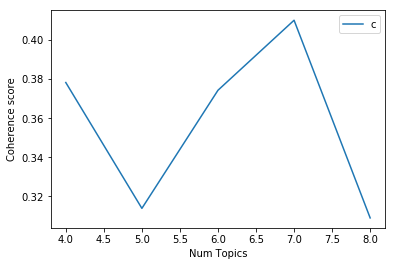

In [64]:
# display the coherence score of the different models
model_list_hashtag_pooling = hashtag_pooling_models[0]
coherence_values_hashtag_pooling = hashtag_pooling_models[1]

limit=9; start=4; step=1;
x = range(start, limit, step)
_ = plt.plot(x, coherence_values_hashtag_pooling)
_ = plt.xlabel("Num Topics")
_ = plt.ylabel("Coherence score")
_ = plt.legend(("coherence_values"), loc='best')
_ = plt.savefig("hashtag_pooling_coherence_scores")
_ = plt.show()

#### Choose the model with the highest coherence score (7 topics).

In [60]:
# print topics of model with highest coherence score
lda_model_hashtag_pooling = model_list_hashtag_pooling[3] # 7 topics
_ = lda_model_hashtag_pooling.print_topics()

2018-10-02 07:00:50,786 : INFO : topic #0 (0.029): 0.023*"#youtube" + 0.016*"#workout" + 0.015*"#fit" + 0.015*"#fitness" + 0.013*"#love" + 0.013*"#gym" + 0.012*"#health" + 0.012*"#fitfam" + 0.012*"#meditation" + 0.012*"#healthy"
2018-10-02 07:00:50,789 : INFO : topic #1 (0.040): 0.025*"#yogi" + 0.025*"#yoga" + 0.025*"#yogaeverydamnday" + 0.018*"#selfie" + 0.018*"thursday" + 0.017*"throwback" + 0.016*"#yogaeverywhere" + 0.016*"#yogainspiration" + 0.009*"#yummy" + 0.009*"place"
2018-10-02 07:00:50,792 : INFO : topic #2 (0.030): 0.016*"night" + 0.013*"#ølgod" + 0.008*"city" + 0.008*"amazing" + 0.008*"#friends" + 0.008*"real" + 0.007*"offer" + 0.007*"cocktail" + 0.007*"beer" + 0.007*"shirt"
2018-10-02 07:00:50,795 : INFO : topic #3 (0.029): 0.035*"#graffiti" + 0.035*"#streetart" + 0.016*"#arteurbano" + 0.013*"#digerible" + 0.011*"#artecallejero" + 0.011*"#streetphotography" + 0.010*"#artederua" + 0.010*"arte" + 0.010*"urbano" + 0.008*"#arteenlacalle"
2018-10-02 07:00:50,798 : INFO : topic 

### Visualize Hashtag Pooling Model

In [61]:
pyLDAvis.enable_notebook()
vis_hp = pyLDAvis.gensim.prepare(lda_model_hashtag_pooling, corpus_hashtag_pooling, dictionary_hashtag_pooling)

In [62]:
vis_hp

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      42.664169        1       1 -0.109605 -0.081534
5      13.680170        1       2 -0.117746 -0.117649
3      11.216218        1       3 -0.010832 -0.115943
6      10.473912        1       4  0.093622 -0.115008
1       8.229032        1       5  0.338351  0.102742
2       7.358588        1       6 -0.043601  0.010600
0       6.377911        1       7 -0.150189  0.316792, topic_info=     Category         Freq               Term        Total  loglift  logprob
term                                                                        
131   Default   469.000000          #graffiti   469.000000  30.0000  30.0000
936   Default   467.000000         #streetart   467.000000  29.0000  29.0000
615   Default  1341.000000            sagrada  1341.000000  28.0000  28.0000
6752  Default   225.000000              #yogi   225.000000  27.0000  27.0000
6751  Default   220.000000              #yoga   220.000000  26.0000  26.0000
8269  Default   219.000000  #yogaeverydamnday   219.000000  25.0000  25.0000
6579  Default   238.000000               #yum   238.000000  24.0000  24.0000
123   Default   859.000000             #gaudi   859.000000  23.0000  23.0000
375   Default   611.000000           basílica   611.000000  22.0000  22.0000
272   Default  1680.000000    #sagradafamilia  1680.000000  21.0000  21.0000
314   Default   911.000000            #travel   911.000000  20.0000  20.0000
342   Default   156.000000           #youtube   156.000000  19.0000  19.0000
958   Default   192.000000        #arteurbano   192.000000  18.0000  18.0000
2932  Default   163.000000           thursday   163.000000  17.0000  17.0000
280   Default   258.000000            #selfie   258.000000  16.0000  16.0000
460   Default   725.000000            familia   725.000000  15.0000  15.0000
2766  Default   157.000000          throwback   157.000000  14.0000  14.0000
37    Default   317.000000         #catalonia   317.000000  13.0000  13.0000
9210  Default   146.000000   #yogainspiration   146.000000  12.0000  12.0000
9209  Default   146.000000    #yogaeverywhere   146.000000  11.0000  11.0000
585   Default   295.000000              place   295.000000  10.0000  10.0000
246   Default   242.000000     #photooftheday   242.000000   9.0000   9.0000
3     Default   426.000000      #architecture   426.000000   8.0000   8.0000
4326  Default   161.000000         #digerible   161.000000   7.0000   7.0000
11    Default   317.000000             #beach   317.000000   6.0000   6.0000
3992  Default   151.000000               call   151.000000   5.0000   5.0000
187   Default   721.000000              #love   721.000000   4.0000   4.0000
563   Default   287.000000              night   287.000000   3.0000   3.0000
1941  Default   185.000000               home   185.000000   2.0000   2.0000
5558  Default   138.000000          #yogagirl   138.000000   1.0000   1.0000
...       ...          ...                ...          ...      ...      ...
9221   Topic7    37.616020               test    38.053829   2.7408  -5.2071
9220   Topic7    37.616020           prepping    38.053829   2.7408  -5.2071
9218   Topic7    37.616020           #seminar    38.053829   2.7408  -5.2071
9222   Topic7    37.616020         tomorrow's    38.053829   2.7408  -5.2071
9219   Topic7    37.616020     #younglearners    38.053829   2.7408  -5.2071
345    Topic7    39.573630          #zalandox    40.035068   2.7407  -5.1563
6915   Topic7    37.395739     chepolohelados    37.836485   2.7406  -5.2129
6917   Topic7    37.395739    you#bonepartyof    37.836485   2.7406  -5.2129
3212   Topic7    79.808701           #healthy    81.279952   2.7341  -4.4549
2160   Topic7    40.450404              close    40.928222   2.7406  -5.1344
8691   Topic7    40.166345         #messyhair    40.643464   2.7405  -5.1415
8692   Topic7    40.166345             #ochoa    40.643464   2.7405  -5.1415
788   

### Intermediary Result:

#### After training ~50 models for each pooling method, the following conclusion was reached: Although user pooling and no pooling models tend to result in higher coherence scores, an inspection of the topics shows that they are less human interpretable than hashtag pooling models and show some repetitions in words among topics. Moreover, the no pooling model and user pooling model are very unstable as tweets are very short. The best trained hashtag pooling model (meaning the one with the most human interpretable topics) will therefore be saved and used for further purposes. Hashtag pooling was also shown to give the best results in various research papers.

## Save Models

In [72]:
lda_model_no_pooling.save('lda_model_no_pooling.model') 
lda_model_user_pooling.save('lda_model_user_pooling.model') 
lda_model_hashtag_pooling.save('lda_model_hashtag_pooling.model')

2018-10-02 07:22:12,020 : INFO : saving LdaState object under lda_model_no_pooling.model.state, separately None
2018-10-02 07:22:12,027 : INFO : saved lda_model_no_pooling.model.state
2018-10-02 07:22:12,034 : INFO : saving LdaModel object under lda_model_no_pooling.model, separately ['expElogbeta', 'sstats']
2018-10-02 07:22:12,037 : INFO : storing np array 'expElogbeta' to lda_model_no_pooling.model.expElogbeta.npy
2018-10-02 07:22:12,041 : INFO : not storing attribute state
2018-10-02 07:22:12,044 : INFO : not storing attribute dispatcher
2018-10-02 07:22:12,046 : INFO : not storing attribute id2word
2018-10-02 07:22:12,051 : INFO : saved lda_model_no_pooling.model
2018-10-02 07:22:12,053 : INFO : saving LdaState object under lda_model_user_pooling.model.state, separately None
2018-10-02 07:22:12,059 : INFO : saved lda_model_user_pooling.model.state
2018-10-02 07:22:12,067 : INFO : saving LdaModel object under lda_model_user_pooling.model, separately ['expElogbeta', 'sstats']
2018-1

## Test Whether TFIDF Can Improve LDA (Instead of BOW)

#### Sometimes TFIDF improves LDA performance although LDA is mathematically meant to process a BOW input. TFIDF is therefore used to transform the corpus of the chosen model (hashtag pooling model with 7 topics).

In [73]:
# initialize tfidf model
tfidf_hashtag_pooling = models.TfidfModel(corpus_hashtag_pooling)
   
# run term frequency inverse document frequency transformation
# (transform bag-of-words integer counts corpus to tfidf real-valued weights
# corpus)
corpus_tfidf_hashtag_pooling = tfidf_hashtag_pooling[corpus_hashtag_pooling]
for doc in corpus_tfidf_hashtag_pooling:
    print(doc)

2018-10-02 07:22:21,349 : INFO : collecting document frequencies
2018-10-02 07:22:21,353 : INFO : PROGRESS: processing document #0
2018-10-02 07:22:21,478 : INFO : calculating IDF weights for 6040 documents and 9329 features (78970 matrix non-zeros)


[(0, 0.0199863227055571), (1, 0.039081489183023607), (2, 0.017151200283475224), (3, 0.031011931531736946), (4, 0.037735852213136988), (5, 0.0199863227055571), (6, 0.019154767272708203), (7, 0.019154767272708203), (8, 0.014502628790419267), (9, 0.021158334261941181), (10, 0.017151200283475224), (11, 0.010123098737364748), (12, 0.013689195900691958), (13, 0.019540744591511804), (14, 0.014972395632728543), (15, 0.0205133297581182), (16, 0.02316190125117416), (17, 0.018509762768885222), (18, 0.018509762768885222), (19, 0.01636516604589474), (20, 0.019540744591511804), (21, 0.016810744159940039), (22, 0.013635165614322983), (23, 0.01733775121250114), (24, 0.03507435520455765), (25, 0.031958377454182285), (26, 0.014162172666884083), (27, 0.0199863227055571), (28, 0.018509762768885222), (29, 0.01775138937549306), (30, 0.015239404054736179), (31, 0.021989889694790078), (32, 0.0199863227055571), (33, 0.017537177602278825), (34, 0.01775138937549306), (35, 0.02316190125117416), (36, 0.01753717760

[(4, 0.2057753606543592), (247, 0.33447208464367495), (248, 0.30752220391825608), (249, 0.32846288135962681), (250, 0.36667908522024151), (1232, 0.24975106880524434), (2000, 0.25548674058208798), (2255, 0.28287850782400942), (2256, 0.3781742612873556), (2257, 0.39772919253975253)]
[(129, 0.4539389720937822), (211, 0.41923458642836431), (438, 0.4539389720937822), (661, 0.4539389720937822), (708, 0.4539389720937822)]
[(374, 0.44629438342530914), (379, 0.38415505303356562), (586, 0.46954212320959293), (2258, 0.65785744130748347)]
[]
[(272, 0.12990667604873399), (314, 0.15338377176079113), (317, 0.2155477319311884), (342, 0.30792703325616527), (1775, 0.25806597369880496), (1776, 0.62897903501416652), (1777, 0.3544496205414846), (1778, 0.26715086015302392), (2259, 0.39887467038759478)]
[(218, 0.3929150249105744), (460, 0.2157547530706129), (615, 0.18078296602043295), (2260, 0.48508626107037028), (2261, 0.51530404046765688), (2262, 0.51530404046765688)]
[(2063, 0.35214412584690141), (2202, 0

[(187, 0.083693820103751843), (209, 0.11565267797568987), (319, 0.29927022170257284), (770, 0.1329451566957682), (2506, 0.36631029523709691), (2507, 0.2949564458860835), (2508, 0.19097988673494018), (2509, 0.19097988673494018), (2510, 0.17030749879311327), (2511, 0.34061499758622654), (2512, 0.36631029523709691), (2513, 0.194122153650994), (2514, 0.19097988673494018), (2515, 0.388244307301988), (2516, 0.194122153650994), (2517, 0.19097988673494018)]
[(106, 0.17252032544248871), (133, 0.20662446780984192), (213, 0.21731601430546804), (378, 0.21911642998258454), (385, 0.22298985576172117), (1494, 0.26760080939234421), (1576, 0.45928159427066961), (1622, 0.19322289954527577), (4849, 0.2348087234437703), (6577, 0.25646694999443237), (6578, 0.25646694999443237), (6579, 0.22298985576172117), (6580, 0.25646694999443237), (7322, 0.28329310285352993), (7323, 0.28329310285352993)]
[(41, 0.44999834296365526), (104, 0.22758721026042297), (115, 0.18136742611084464), (116, 0.11575199428154609), (127

[(1649, 0.26421771462840776), (2012, 0.26270366299733861), (2278, 0.34285930640680495), (3891, 0.27630919771174195), (4680, 0.31552304075762383), (4864, 0.35992415642224734), (5111, 0.35992415642224734), (5992, 0.34285930640680495), (6124, 0.29785798299015948), (6156, 0.31993599355538083)]
[(688, 0.31422789319439232), (1115, 0.26308274899836531), (1957, 0.35995479033767236), (2650, 0.38268523577069596), (8693, 0.43051630149320558), (8694, 0.43051630149320558), (8695, 0.43051630149320558)]
[(131, 0.12507035553371373), (688, 0.16910616152111776), (958, 0.17544482057325728), (1115, 0.14158168262298365), (1957, 0.19371473453976873), (2650, 0.61784233061657345), (2651, 0.15223763202390825), (2652, 0.22573610787248427), (2653, 0.17544482057325728), (2831, 0.18986944286903945), (6102, 0.21634408065182217), (8693, 0.23168840448147554), (8694, 0.23168840448147554), (8695, 0.23168840448147554), (8696, 0.26160277287592909), (8697, 0.26160277287592909)]
[(3019, 0.30474512734743969), (4498, 0.33554

[(68, 0.32307190220846244), (136, 0.31477187617876295), (234, 0.32307190220846244), (265, 0.25359955201286655), (356, 0.32307190220846244), (429, 0.31477187617876295), (466, 0.32307190220846244), (490, 0.32307190220846244), (542, 0.22106559492902111), (573, 0.32307190220846244), (620, 0.24980367873950218)]
[(486, 0.17997166093758099), (600, 0.19148607376054083), (7240, 0.43149583655352719), (7241, 0.43149583655352719), (7242, 0.43149583655352719), (7243, 0.43149583655352719), (7244, 0.43149583655352719)]
[(169, 0.54843281841184632), (244, 0.33577244058991135), (8859, 0.76581871995213924)]
[(486, 0.21411830506169241), (563, 0.25099358508667063), (600, 0.22781738715377722), (1291, 0.43389324311943522), (1847, 0.38375212803995951), (2027, 0.40955340071562735), (9080, 0.57964797899728771)]
[(745, 0.26296324455592196), (1367, 0.23764473957630616), (8851, 0.38174496498847937), (8852, 0.38174496498847937), (8853, 0.38174496498847937), (8854, 0.38174496498847937), (8855, 0.38174496498847937), 

In [74]:
# train hashtag pooling model with tfidf corpus
lda_model_hashtag_pooling_tfidf = models.LdaModel(corpus_tfidf_hashtag_pooling,
                                       id2word=dictionary_hashtag_pooling,
                                       alpha='auto', eta='auto',
                                       eval_every=1,
                                       iterations=400, passes=20, num_topics=7)

2018-10-02 07:24:37,276 : INFO : using autotuned alpha, starting with [0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715]
2018-10-02 07:24:37,280 : INFO : using serial LDA version on this node
2018-10-02 07:24:37,293 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 6040 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 07:24:38,243 : INFO : -13.890 per-word bound, 15180.5 perplexity estimate based on a held-out corpus of 2000 documents with 5704 words
2018-10-02 07:24:38,244 : INFO : PROGRESS: pass 0, at document #2000/6040
2018-10-02 07:24:38,884 : INFO : optimized alpha [0.12988012, 0.12784421, 0.12707655, 0.13058132, 0.1280534, 0.13039352, 0.12741488]
2018-10-02 07:24:38,886 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:24:38,896 : INFO : topic #

2018-10-02 07:24:42,574 : INFO : topic #5 (0.120): 0.018*"#yoga" + 0.014*"#yogi" + 0.006*"#workout" + 0.006*"#fit" + 0.005*"#yogalove" + 0.005*"#namaste" + 0.005*"#fitfam" + 0.005*"#healthy" + 0.005*"#handstands" + 0.005*"#tattooedyogi"
2018-10-02 07:24:42,577 : INFO : topic #1 (0.124): 0.015*"#yogaeverydamnday" + 0.009*"thursday" + 0.007*"família" + 0.007*"basílica" + 0.006*"sagrada" + 0.005*"#yummy" + 0.005*"perch" + 0.005*"pau" + 0.005*"#youcanseeourhousefromhere" + 0.005*"#blueskies"
2018-10-02 07:24:42,580 : INFO : topic #0 (0.139): 0.011*"#yogagirl" + 0.011*"inner" + 0.011*"#yogadiary" + 0.011*"#yogabarcelona" + 0.010*"throwback" + 0.010*"yoga" + 0.008*"call" + 0.007*"home" + 0.007*"place" + 0.007*"nearly"
2018-10-02 07:24:42,582 : INFO : topic diff=0.342698, rho=0.446322
2018-10-02 07:24:43,252 : INFO : -10.738 per-word bound, 1708.2 perplexity estimate based on a held-out corpus of 2000 documents with 5995 words
2018-10-02 07:24:43,253 : INFO : PROGRESS: pass 1, at document #40

2018-10-02 07:24:46,807 : INFO : topic #2 (0.103): 0.005*"arm" + 0.004*"#pardes" + 0.004*"gothic" + 0.003*"quarter" + 0.003*"sagrada" + 0.003*"#friends" + 0.003*"#cruilla" + 0.003*"d'art" + 0.003*"centre" + 0.002*"#expo"
2018-10-02 07:24:46,810 : INFO : topic #5 (0.109): 0.011*"#yoga" + 0.009*"#yogi" + 0.004*"#fit" + 0.004*"#workout" + 0.004*"#love" + 0.004*"#fitness" + 0.004*"#fitfam" + 0.004*"#yogalove" + 0.004*"#namaste" + 0.004*"#healthy"
2018-10-02 07:24:46,812 : INFO : topic #1 (0.112): 0.008*"#yogaeverydamnday" + 0.006*"basílica" + 0.005*"thursday" + 0.005*"sagrada" + 0.005*"família" + 0.004*"#yogainspiration" + 0.004*"#yogaeverywhere" + 0.003*"#yummy" + 0.003*"fashion" + 0.003*"#selfie"
2018-10-02 07:24:46,815 : INFO : topic #0 (0.138): 0.006*"throwback" + 0.006*"#yogabarcelona" + 0.006*"inner" + 0.006*"#yogagirl" + 0.006*"#yogadiary" + 0.006*"#sagradafamilia" + 0.006*"sagrada" + 0.005*"yoga" + 0.005*"familia" + 0.005*"call"
2018-10-02 07:24:46,817 : INFO : topic diff=0.212687,

2018-10-02 07:24:50,927 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:24:50,939 : INFO : topic #3 (0.090): 0.004*"sagrada" + 0.004*"#yum" + 0.003*"#tapas" + 0.003*"beautiful" + 0.003*"#sagradafamilia" + 0.003*"tapa" + 0.003*"gothic" + 0.003*"wife" + 0.003*"#youknowimright" + 0.003*"#summer"
2018-10-02 07:24:50,941 : INFO : topic #2 (0.092): 0.004*"sagrada" + 0.003*"arm" + 0.003*"basílica" + 0.003*"gothic" + 0.003*"quarter" + 0.003*"família" + 0.003*"#travel" + 0.003*"#pardes" + 0.002*"#friends" + 0.002*"#love"
2018-10-02 07:24:50,944 : INFO : topic #5 (0.099): 0.007*"#yoga" + 0.006*"#yogi" + 0.004*"#yogaeverydamnday" + 0.004*"sagrada" + 0.004*"#love" + 0.003*"#workout" + 0.003*"#sagradafamilia" + 0.003*"#fit" + 0.003*"#gaudi" + 0.003*"#fitness"
2018-10-02 07:24:50,947 : INFO : topic #1 (0.100): 0.004*"sagrada" + 0.003*"#yogaeverydamnday" + 0.003*"basílica" + 0.003*"thursday" + 0.003*"#yogainspiration" + 0.003*"#yogaeverywhere" + 0.003*"#sagra

2018-10-02 07:24:54,127 : INFO : -7.920 per-word bound, 242.2 perplexity estimate based on a held-out corpus of 40 documents with 118 words
2018-10-02 07:24:54,128 : INFO : PROGRESS: pass 4, at document #6040/6040
2018-10-02 07:24:54,138 : INFO : optimized alpha [0.11374728, 0.088251092, 0.084525064, 0.078975692, 0.090403542, 0.092788778, 0.082752898]
2018-10-02 07:24:54,141 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 07:24:54,153 : INFO : topic #3 (0.079): 0.014*"#yum" + 0.010*"wife" + 0.010*"#youknowimright" + 0.009*"anyone" + 0.009*"#png" + 0.009*"#zoo" + 0.008*"zoo" + 0.008*"tapa" + 0.007*"#tapas" + 0.007*"beautiful"
2018-10-02 07:24:54,155 : INFO : topic #6 (0.083): 0.008*"deal" + 0.008*"#yummi" + 0.007*"#hostallife" + 0.007*"#zarox" + 0.007*"#nightout" + 0.007*"#bookstagram" + 0.006*"#younglearners" + 0.006*"prepping" + 0.006*"test" + 0.006*"tomorrow's"
2018-10-02 07:24:54,158 : INFO : topic #4 (0.090): 0.011*"#youtube" + 0.007*"#youtubers

2018-10-02 07:24:57,090 : INFO : topic #0 (0.105): 0.014*"#yogabarcelona" + 0.014*"#yogadiary" + 0.014*"#yogagirl" + 0.014*"inner" + 0.013*"yoga" + 0.011*"call" + 0.009*"home" + 0.009*"place" + 0.008*"nearly" + 0.007*"#yummyfood"
2018-10-02 07:24:57,092 : INFO : topic diff=0.153494, rho=0.332964
2018-10-02 07:24:57,710 : INFO : -10.418 per-word bound, 1368.1 perplexity estimate based on a held-out corpus of 2000 documents with 5704 words
2018-10-02 07:24:57,711 : INFO : PROGRESS: pass 6, at document #2000/6040
2018-10-02 07:24:58,027 : INFO : optimized alpha [0.10198212, 0.079201095, 0.077546149, 0.072343498, 0.082352787, 0.084647618, 0.076187976]
2018-10-02 07:24:58,029 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:24:58,039 : INFO : topic #3 (0.072): 0.009*"#yum" + 0.006*"#youknowimright" + 0.006*"wife" + 0.006*"anyone" + 0.005*"#png" + 0.005*"#zoo" + 0.005*"#tapas" + 0.005*"zoo" + 0.005*"beautiful" + 0.005*"tapa"
2018-10-02 07:24:58,041 : 

2018-10-02 07:25:00,956 : INFO : topic #5 (0.080): 0.016*"#yogaeverydamnday" + 0.015*"#yoga" + 0.012*"#yogainspiration" + 0.012*"#yogaeverywhere" + 0.011*"#yogi" + 0.010*"throwback" + 0.010*"thursday" + 0.008*"#selfie" + 0.005*"#fit" + 0.005*"#workout"
2018-10-02 07:25:00,958 : INFO : topic #0 (0.095): 0.009*"#yogagirl" + 0.009*"inner" + 0.009*"#yogabarcelona" + 0.009*"#yogadiary" + 0.009*"yoga" + 0.007*"call" + 0.007*"home" + 0.007*"place" + 0.006*"#sagradafamilia" + 0.006*"nearly"
2018-10-02 07:25:00,961 : INFO : topic diff=0.139181, rho=0.301238
2018-10-02 07:25:01,571 : INFO : -10.241 per-word bound, 1210.1 perplexity estimate based on a held-out corpus of 2000 documents with 5995 words
2018-10-02 07:25:01,572 : INFO : PROGRESS: pass 7, at document #4000/6040
2018-10-02 07:25:01,863 : INFO : optimized alpha [0.094847724, 0.072449274, 0.071396969, 0.066287205, 0.075911805, 0.077958763, 0.070219778]
2018-10-02 07:25:01,865 : INFO : merging changes from 2000 documents into a model of 

2018-10-02 07:25:04,793 : INFO : topic #4 (0.072): 0.005*"#youtube" + 0.003*"#youtubers" + 0.003*"#newvideo" + 0.003*"#pllfinale" + 0.003*"yayyy" + 0.003*"vídeo" + 0.003*"#teaser" + 0.003*"nuevo" + 0.003*"time" + 0.003*"#video"
2018-10-02 07:25:04,796 : INFO : topic #5 (0.074): 0.011*"#yogaeverydamnday" + 0.011*"#yoga" + 0.009*"#yogainspiration" + 0.009*"#yogaeverywhere" + 0.008*"#yogi" + 0.007*"throwback" + 0.007*"thursday" + 0.006*"#selfie" + 0.004*"#fit" + 0.004*"#workout"
2018-10-02 07:25:04,799 : INFO : topic #0 (0.089): 0.006*"#yogagirl" + 0.006*"#yogabarcelona" + 0.006*"inner" + 0.006*"#yogadiary" + 0.006*"sagrada" + 0.006*"#sagradafamilia" + 0.006*"yoga" + 0.005*"call" + 0.005*"place" + 0.005*"home"
2018-10-02 07:25:04,802 : INFO : topic diff=0.120508, rho=0.288435
2018-10-02 07:25:05,422 : INFO : -10.106 per-word bound, 1101.8 perplexity estimate based on a held-out corpus of 2000 documents with 5900 words
2018-10-02 07:25:05,423 : INFO : PROGRESS: pass 8, at document #6000/60

2018-10-02 07:25:09,078 : INFO : topic #6 (0.061): 0.004*"#sagradafamilia" + 0.003*"#beach" + 0.003*"gothic" + 0.003*"sagrada" + 0.003*"#summer" + 0.002*"quarter" + 0.002*"deal" + 0.002*"#yummi" + 0.002*"#nightout" + 0.002*"see"
2018-10-02 07:25:09,082 : INFO : topic #4 (0.067): 0.004*"#youtube" + 0.003*"sagrada" + 0.003*"time" + 0.003*"#happiness" + 0.003*"nuevo" + 0.003*"#youtubers" + 0.003*"#newvideo" + 0.003*"#pllfinale" + 0.003*"yayyy" + 0.003*"vídeo"
2018-10-02 07:25:09,085 : INFO : topic #5 (0.068): 0.008*"#yogaeverydamnday" + 0.008*"#yoga" + 0.006*"#yogainspiration" + 0.006*"#yogaeverywhere" + 0.006*"#yogi" + 0.005*"thursday" + 0.005*"throwback" + 0.004*"#selfie" + 0.004*"sagrada" + 0.004*"#love"
2018-10-02 07:25:09,088 : INFO : topic #0 (0.084): 0.006*"sagrada" + 0.006*"#sagradafamilia" + 0.005*"familia" + 0.004*"#yogagirl" + 0.004*"inner" + 0.004*"#yogadiary" + 0.004*"#yogabarcelona" + 0.004*"yoga" + 0.004*"place" + 0.004*"call"
2018-10-02 07:25:09,092 : INFO : topic diff=0.1

2018-10-02 07:25:12,533 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 07:25:12,547 : INFO : topic #3 (0.053): 0.012*"#yum" + 0.008*"#youknowimright" + 0.008*"wife" + 0.007*"anyone" + 0.007*"#png" + 0.007*"#zoo" + 0.006*"zoo" + 0.006*"#tapas" + 0.006*"tapa" + 0.006*"beautiful"
2018-10-02 07:25:12,549 : INFO : topic #6 (0.056): 0.006*"deal" + 0.006*"#yummi" + 0.006*"#hostallife" + 0.006*"#zarox" + 0.006*"#nightout" + 0.005*"cocktail" + 0.005*"#bookstagram" + 0.005*"prepping" + 0.005*"#seminar" + 0.005*"test"
2018-10-02 07:25:12,552 : INFO : topic #4 (0.063): 0.009*"#youtube" + 0.006*"#youtubers" + 0.006*"#newvideo" + 0.006*"#pllfinale" + 0.006*"yayyy" + 0.006*"vídeo" + 0.006*"#teaser" + 0.006*"nuevo" + 0.006*"#video" + 0.005*"#niceweekend"
2018-10-02 07:25:12,555 : INFO : topic #5 (0.065): 0.019*"#yogaeverydamnday" + 0.018*"#yoga" + 0.015*"#yogaeverywhere" + 0.015*"#yogainspiration" + 0.014*"#yogi" + 0.012*"throwback" + 0.012*"thursday" + 0.009*"#se

2018-10-02 07:25:16,081 : INFO : -10.212 per-word bound, 1185.7 perplexity estimate based on a held-out corpus of 2000 documents with 5704 words
2018-10-02 07:25:16,082 : INFO : PROGRESS: pass 12, at document #2000/6040
2018-10-02 07:25:16,364 : INFO : optimized alpha [0.072476886, 0.055198178, 0.054558709, 0.050360102, 0.058813639, 0.061401274, 0.053159017]
2018-10-02 07:25:16,366 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:25:16,375 : INFO : topic #3 (0.050): 0.009*"#yum" + 0.006*"wife" + 0.006*"#youknowimright" + 0.005*"anyone" + 0.005*"#png" + 0.005*"#zoo" + 0.005*"beautiful" + 0.005*"#tapas" + 0.005*"zoo" + 0.004*"tapa"
2018-10-02 07:25:16,377 : INFO : topic #6 (0.053): 0.004*"#sagradafamilia" + 0.004*"deal" + 0.004*"#yummi" + 0.004*"#nightout" + 0.004*"#hostallife" + 0.004*"#zarox" + 0.004*"cocktail" + 0.004*"#bookstagram" + 0.004*"book" + 0.004*"#seminar"
2018-10-02 07:25:16,380 : INFO : topic #4 (0.059): 0.007*"#youtube" + 0.004*"#y

2018-10-02 07:25:19,249 : INFO : topic #0 (0.069): 0.009*"#yogagirl" + 0.009*"inner" + 0.009*"#yogabarcelona" + 0.009*"#yogadiary" + 0.008*"yoga" + 0.007*"call" + 0.006*"place" + 0.006*"home" + 0.006*"#sagradafamilia" + 0.006*"sagrada"
2018-10-02 07:25:19,251 : INFO : topic diff=0.100620, rho=0.242393
2018-10-02 07:25:19,864 : INFO : -10.087 per-word bound, 1087.5 perplexity estimate based on a held-out corpus of 2000 documents with 5995 words
2018-10-02 07:25:19,865 : INFO : PROGRESS: pass 13, at document #4000/6040
2018-10-02 07:25:20,145 : INFO : optimized alpha [0.069342427, 0.052116968, 0.051579099, 0.047332063, 0.055350684, 0.057925798, 0.050184488]
2018-10-02 07:25:20,147 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:25:20,159 : INFO : topic #3 (0.047): 0.007*"#yum" + 0.004*"#youknowimright" + 0.004*"wife" + 0.004*"beautiful" + 0.004*"anyone" + 0.004*"#tapas" + 0.004*"sagrada" + 0.004*"#png" + 0.004*"#zoo" + 0.004*"tapa"
2018-10-02 07:

2018-10-02 07:25:23,234 : INFO : topic #5 (0.056): 0.011*"#yogaeverydamnday" + 0.011*"#yoga" + 0.009*"#yogainspiration" + 0.009*"#yogaeverywhere" + 0.008*"#yogi" + 0.007*"throwback" + 0.007*"thursday" + 0.006*"#selfie" + 0.004*"#fit" + 0.004*"#workout"
2018-10-02 07:25:23,237 : INFO : topic #0 (0.067): 0.006*"#yogagirl" + 0.006*"#yogadiary" + 0.006*"#yogabarcelona" + 0.006*"inner" + 0.006*"sagrada" + 0.006*"yoga" + 0.006*"#sagradafamilia" + 0.005*"call" + 0.005*"place" + 0.005*"home"
2018-10-02 07:25:23,240 : INFO : topic diff=0.088825, rho=0.235571
2018-10-02 07:25:23,933 : INFO : -10.007 per-word bound, 1029.2 perplexity estimate based on a held-out corpus of 2000 documents with 5900 words
2018-10-02 07:25:23,934 : INFO : PROGRESS: pass 14, at document #6000/6040
2018-10-02 07:25:24,226 : INFO : optimized alpha [0.06639646, 0.04944035, 0.04880837, 0.0446654, 0.052489411, 0.054676156, 0.047948554]
2018-10-02 07:25:24,228 : INFO : merging changes from 2000 documents into a model of 604

2018-10-02 07:25:27,130 : INFO : topic #4 (0.050): 0.004*"#youtube" + 0.003*"sagrada" + 0.003*"time" + 0.003*"nuevo" + 0.003*"#happiness" + 0.003*"#youtubers" + 0.003*"#newvideo" + 0.003*"#pllfinale" + 0.003*"yayyy" + 0.003*"vídeo"
2018-10-02 07:25:27,132 : INFO : topic #5 (0.053): 0.009*"#yogaeverydamnday" + 0.008*"#yoga" + 0.007*"#yogainspiration" + 0.007*"#yogaeverywhere" + 0.007*"#yogi" + 0.006*"throwback" + 0.006*"thursday" + 0.005*"#selfie" + 0.004*"sagrada" + 0.003*"#love"
2018-10-02 07:25:27,135 : INFO : topic #0 (0.064): 0.006*"sagrada" + 0.006*"#sagradafamilia" + 0.005*"#yogabarcelona" + 0.005*"#yogadiary" + 0.005*"#yogagirl" + 0.005*"inner" + 0.005*"familia" + 0.004*"yoga" + 0.004*"place" + 0.004*"call"
2018-10-02 07:25:27,137 : INFO : topic diff=0.084951, rho=0.229295
2018-10-02 07:25:27,175 : INFO : -7.466 per-word bound, 176.9 perplexity estimate based on a held-out corpus of 40 documents with 118 words
2018-10-02 07:25:27,177 : INFO : PROGRESS: pass 15, at document #6040

2018-10-02 07:25:30,031 : INFO : topic #6 (0.043): 0.005*"deal" + 0.005*"#yummi" + 0.005*"#nightout" + 0.005*"#hostallife" + 0.005*"#zarox" + 0.005*"cocktail" + 0.005*"#bookstagram" + 0.005*"#sagradafamilia" + 0.004*"test" + 0.004*"prepping"
2018-10-02 07:25:30,035 : INFO : topic #4 (0.048): 0.008*"#youtube" + 0.005*"#youtubers" + 0.005*"#newvideo" + 0.005*"#pllfinale" + 0.005*"yayyy" + 0.005*"vídeo" + 0.005*"#teaser" + 0.005*"nuevo" + 0.005*"#video" + 0.005*"zoo"
2018-10-02 07:25:30,037 : INFO : topic #5 (0.051): 0.017*"#yogaeverydamnday" + 0.016*"#yoga" + 0.013*"#yogaeverywhere" + 0.013*"#yogainspiration" + 0.012*"#yogi" + 0.011*"throwback" + 0.011*"thursday" + 0.008*"#selfie" + 0.005*"anyone#fitness" + 0.005*"#namaste"
2018-10-02 07:25:30,040 : INFO : topic #0 (0.061): 0.010*"#yogadiary" + 0.010*"inner" + 0.010*"#yogagirl" + 0.010*"#yogabarcelona" + 0.009*"yoga" + 0.008*"call" + 0.007*"place" + 0.007*"home" + 0.006*"nearly" + 0.006*"#sagradafamilia"
2018-10-02 07:25:30,042 : INFO : 

2018-10-02 07:25:33,870 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:25:33,881 : INFO : topic #3 (0.039): 0.008*"#yum" + 0.005*"wife" + 0.005*"#youknowimright" + 0.005*"anyone" + 0.005*"#png" + 0.005*"#zoo" + 0.005*"beautiful" + 0.004*"#tapas" + 0.004*"zoo" + 0.004*"tapa"
2018-10-02 07:25:33,883 : INFO : topic #6 (0.042): 0.004*"#sagradafamilia" + 0.004*"deal" + 0.004*"#yummi" + 0.004*"#nightout" + 0.004*"#hostallife" + 0.004*"#zarox" + 0.004*"cocktail" + 0.004*"#bookstagram" + 0.003*"book" + 0.003*"#younglearners"
2018-10-02 07:25:33,886 : INFO : topic #4 (0.046): 0.006*"#youtube" + 0.004*"#youtubers" + 0.004*"#newvideo" + 0.004*"#pllfinale" + 0.004*"yayyy" + 0.004*"vídeo" + 0.004*"#teaser" + 0.004*"nuevo" + 0.004*"#video" + 0.004*"zoo"
2018-10-02 07:25:33,888 : INFO : topic #5 (0.049): 0.014*"#yogaeverydamnday" + 0.013*"#yoga" + 0.011*"#yogainspiration" + 0.011*"#yogaeverywhere" + 0.010*"#yogi" + 0.009*"throwback" + 0.009*"thursday" + 0.00

2018-10-02 07:25:37,377 : INFO : PROGRESS: pass 19, at document #4000/6040
2018-10-02 07:25:37,664 : INFO : optimized alpha [0.055735782, 0.041576445, 0.041137189, 0.03715612, 0.043726292, 0.046439018, 0.039823852]
2018-10-02 07:25:37,666 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:25:37,678 : INFO : topic #3 (0.037): 0.006*"#yum" + 0.004*"#youknowimright" + 0.004*"wife" + 0.004*"beautiful" + 0.004*"anyone" + 0.004*"#tapas" + 0.004*"sagrada" + 0.004*"#png" + 0.004*"#zoo" + 0.004*"zoo"
2018-10-02 07:25:37,680 : INFO : topic #6 (0.040): 0.004*"#sagradafamilia" + 0.003*"deal" + 0.003*"#yummi" + 0.003*"gothic" + 0.003*"#nightout" + 0.003*"#hostallife" + 0.003*"#zarox" + 0.003*"sagrada" + 0.003*"#beach" + 0.003*"cocktail"
2018-10-02 07:25:37,683 : INFO : topic #4 (0.044): 0.005*"#youtube" + 0.003*"#youtubers" + 0.003*"#newvideo" + 0.003*"#pllfinale" + 0.003*"yayyy" + 0.003*"vídeo" + 0.003*"#teaser" + 0.003*"nuevo" + 0.003*"time" + 0.003*"#video"

In [75]:
# print topics of model
_ = lda_model_hashtag_pooling_tfidf.print_topics()

2018-10-02 07:25:49,222 : INFO : topic #0 (0.055): 0.010*"inner" + 0.010*"#yogagirl" + 0.010*"#yogadiary" + 0.010*"#yogabarcelona" + 0.009*"yoga" + 0.008*"call" + 0.007*"place" + 0.007*"home" + 0.006*"nearly" + 0.006*"#sagradafamilia"
2018-10-02 07:25:49,225 : INFO : topic #1 (0.041): 0.005*"#yummy" + 0.004*"#youcanseeourhousefromhere" + 0.004*"#blueskies" + 0.004*"#watchcat" + 0.004*"chepolohelados" + 0.004*"#youaresosocool" + 0.004*"meant" + 0.004*"you#bonepartyof" + 0.004*"perch" + 0.004*"pau"
2018-10-02 07:25:49,227 : INFO : topic #2 (0.040): 0.008*"arm" + 0.006*"sagrada" + 0.005*"#pardes" + 0.005*"família" + 0.005*"basílica" + 0.004*"#friends" + 0.003*"#liveasanative" + 0.003*"net" + 0.003*"revenue" + 0.003*"#yurbban"
2018-10-02 07:25:49,229 : INFO : topic #3 (0.036): 0.010*"#yum" + 0.007*"#youknowimright" + 0.007*"wife" + 0.006*"anyone" + 0.006*"#png" + 0.006*"#zoo" + 0.005*"zoo" + 0.005*"#tapas" + 0.005*"beautiful" + 0.005*"tapa"
2018-10-02 07:25:49,231 : INFO : topic #4 (0.043)

#### In the case of tweets, however, TFIDF does not improve the results but makes them worse and less interpretable. Very rare terms are weighted heavier but in the case of tweets these seldomly have an interpretable topic (e.g. "#youcanseeourhousefromhere"). The model that will be used as final LDA model is thus the 7 topics hashtag pooling model applied to a BOW corpus.

### Analysis of Topics

In [77]:
pyLDAvis.enable_notebook()
vis_hp = pyLDAvis.gensim.prepare(lda_model_hashtag_pooling, corpus_hashtag_pooling, dictionary_hashtag_pooling)

In [78]:
vis_hp

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      42.666591        1       1 -0.109605 -0.081534
5      13.683157        1       2 -0.117746 -0.117649
3      11.216244        1       3 -0.010832 -0.115943
6      10.475012        1       4  0.093622 -0.115008
1       8.226541        1       5  0.338351  0.102742
2       7.354405        1       6 -0.043601  0.010600
0       6.378049        1       7 -0.150189  0.316792, topic_info=     Category         Freq               Term        Total  loglift  logprob
term                                                                        
131   Default   469.000000          #graffiti   469.000000  30.0000  30.0000
936   Default   467.000000         #streetart   467.000000  29.0000  29.0000
615   Default  1342.000000            sagrada  1342.000000  28.0000  28.0000
6752  Default   225.000000              #yogi   225.000000  27.0000  27.0000
6751  Default   220.000000              #yoga   220.000000  26.0000  26.0000
8269  Default   219.000000  #yogaeverydamnday   219.000000  25.0000  25.0000
6579  Default   239.000000               #yum   239.000000  24.0000  24.0000
123   Default   859.000000             #gaudi   859.000000  23.0000  23.0000
375   Default   611.000000           basílica   611.000000  22.0000  22.0000
272   Default  1680.000000    #sagradafamilia  1680.000000  21.0000  21.0000
314   Default   911.000000            #travel   911.000000  20.0000  20.0000
342   Default   156.000000           #youtube   156.000000  19.0000  19.0000
958   Default   192.000000        #arteurbano   192.000000  18.0000  18.0000
2932  Default   163.000000           thursday   163.000000  17.0000  17.0000
280   Default   258.000000            #selfie   258.000000  16.0000  16.0000
460   Default   725.000000            familia   725.000000  15.0000  15.0000
2766  Default   157.000000          throwback   157.000000  14.0000  14.0000
37    Default   317.000000         #catalonia   317.000000  13.0000  13.0000
9210  Default   146.000000   #yogainspiration   146.000000  12.0000  12.0000
9209  Default   146.000000    #yogaeverywhere   146.000000  11.0000  11.0000
585   Default   295.000000              place   295.000000  10.0000  10.0000
246   Default   242.000000     #photooftheday   242.000000   9.0000   9.0000
3     Default   426.000000      #architecture   426.000000   8.0000   8.0000
4326  Default   161.000000         #digerible   161.000000   7.0000   7.0000
11    Default   317.000000             #beach   317.000000   6.0000   6.0000
3992  Default   151.000000               call   151.000000   5.0000   5.0000
187   Default   721.000000              #love   721.000000   4.0000   4.0000
563   Default   287.000000              night   287.000000   3.0000   3.0000
1941  Default   185.000000               home   185.000000   2.0000   2.0000
5558  Default   138.000000          #yogagirl   138.000000   1.0000   1.0000
...       ...          ...                ...          ...      ...      ...
9219   Topic7    37.616834     #younglearners    38.054619   2.7407  -5.2071
9218   Topic7    37.616834           #seminar    38.054619   2.7407  -5.2071
9222   Topic7    37.616834         tomorrow's    38.054619   2.7407  -5.2071
9221   Topic7    37.616834               test    38.054619   2.7407  -5.2071
9220   Topic7    37.616834           prepping    38.054619   2.7407  -5.2071
345    Topic7    39.574486          #zalandox    40.035899   2.7407  -5.1563
6915   Topic7    37.396548     chepolohelados    37.837270   2.7406  -5.2129
6917   Topic7    37.396548    you#bonepartyof    37.837270   2.7406  -5.2129
3212   Topic7    79.810427           #healthy    81.281764   2.7340  -4.4549
2160   Topic7    40.451279              close    40.929071   2.7406  -5.1344
8692   Topic7    40.167214             #ochoa    40.644307   2.7405  -5.1415
8691   Topic7    40.167214         #messyhair    40.644307   2.7405  -5.1415
788   

#### Manual inspection of the topics leads to the following labels:
#### Topic 0: Sightseeing (Sagrada Familia, gaudi, architecture, travel, church ...)
#### Topic 1: Summer, Sun & Friends (beach, friends, summer. smile, sun...)
#### Topic 2: Streetart (graffiti, streetart, arte urbano, massive, streetphotography...)
#### Topic 3: Everyday Life (yum, home, place, call, tapas ...)
#### Topic 4: Lifestyle & Culture (yoga, selfie, contemporaryart, yummy, brianeno ...)
#### Topic 5: Nightlife (night, olgod beer bar, cocktail, beer, raval ...) 
#### Topic 6: Sports, Health & Image (workout, fit, meditation, healthy, video ...)

In [79]:
# display the 10 most important words for each topic
n_topics = 7
topic_terms = []

for i in range(0, n_topics):
    temp = lda_model_hashtag_pooling.show_topic(i, 10)
    terms = []
    for term in temp:
        terms.append(term)
    topic_terms.append(terms)
    print("Top 10 terms for topic #" + str(i) + ": "+ ", ".join([str(i[0]) for i in terms]))

Top 10 terms for topic #0: #youtube, #workout, #fit, #fitness, #love, #gym, #health, #fitfam, #meditation, #healthy
Top 10 terms for topic #1: #yogi, #yoga, #yogaeverydamnday, #selfie, thursday, throwback, #yogaeverywhere, #yogainspiration, #yummy, place
Top 10 terms for topic #2: night, #ølgod, city, amazing, #friends, real, offer, cocktail, beer, shirt
Top 10 terms for topic #3: #graffiti, #streetart, #arteurbano, #digerible, #artecallejero, #streetphotography, #artederua, arte, urbano, #arteenlacalle
Top 10 terms for topic #4: #sagradafamilia, sagrada, #travel, #gaudi, familia, basílica, #love, #photography, #art, #architecture
Top 10 terms for topic #5: #beach, #photooftheday, #friends, #summer, gothic, #sagradafamilia, quarter, #amazing, #pardes, #smile
Top 10 terms for topic #6: #yum, home, place, call, yoga, inner, #yogabarcelona, #yogadiary, #yogagirl, #tapas


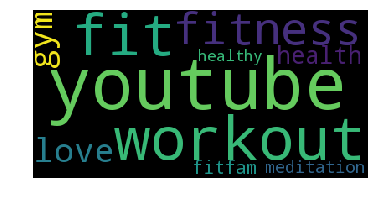

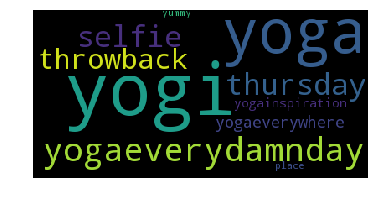

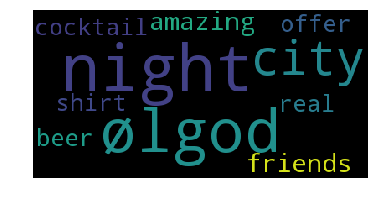

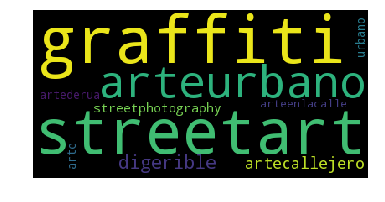

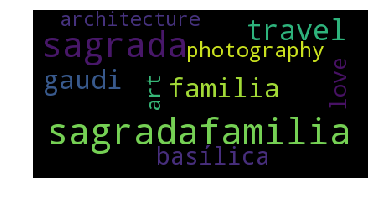

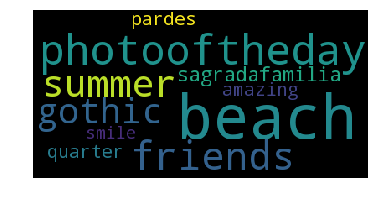

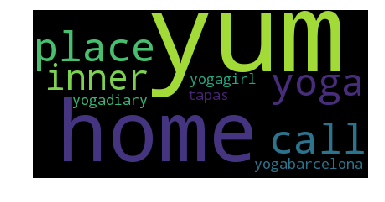

In [80]:
# display wordclouds for the topics
def terms_to_wordcounts(terms, multiplier=1000):
    return  " ".join([" ".join(int(multiplier*i[1]) * [i[0]]) for i in terms])

wordclouds = []
i = 0

for topic in topic_terms:
    wordcloud = WordCloud(background_color="black", collocations=False).generate(terms_to_wordcounts(topic))
    
    _ = plt.imshow(wordcloud)
    _ = plt.axis("off")
    _ = plt.savefig("terms_wordcloud_topic" + str(i))
    _ = plt.show()
    
    i += 1